# COMANDOS AUXILIARES

## Inserção de imagens

In [1]:
from IPython.display import Image

## Imports

In [1]:
import seaborn as sns
import pandas  as pd
import numpy   as np

# INTRODUÇÃO AO PANDAS

O [Pandas](https://pandas.pydata.org/) é um pacote *open source*, que foi escrita usando como base o pacote [Numpy](https://numpy.org/), e é muito utilizada no universo de Ciência de Dados para manipulação, limpeza e exploração de dados. Ele possui uma maneira de trabalhar muito próxima a uma planilha do MS Excel, onde os dados são "armazenados" em linhas e colunas.

O Pandas oferece várias funções e recursos que facilitam a manipulação dos dados, além de possuir boa parte do seu código escrito na linguagem C, o que nos dá performance na manipulação de grandes quantidades de dados.

Sua instalação é muito simples. Utilizando um terminal podemos digitar o comando ```pip install pandas``` ou `conda install pandas` se estivermos utilizando o Anaconda.

In [3]:
!pip install pandas

Com o pacote instalado, basta importarmos para utilizá-lo:

In [2]:
import pandas as pd

E ao contrário do que fazíamos nas aulas anteriores, agora para abrirmos um arquivo `.csv` basta utilizarmos a função `read_csv` do pandas:

In [2]:
# Leitura de um arquivo externo utilizando Pandas
df = pd.read_csv('csv/world_cups.csv')

# Comando `head()` nos permite ver as 5 primeiras linhas do DataFrame
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


Todo e qualquer arquivo aberto dessa maneira com, o pacote do Pandas, se torna um objeto do tipo `DataFrame` do Pandas:

In [3]:
type(df)

pandas.core.frame.DataFrame

## Objeto DataFrame

Um [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) nada mais é que um objeto tabular bidimensional, com linhas e colunas, que contém os dados que utilizamos, além de possuir os eixos nomeáveis.

### Criação de um DataFrame

Além de a sua criação ser possível através da leitura de arquivos, podemos também criar DataFrames manualmente. Por exemplo:

In [4]:
# Criação à partir de uma matriz
df = pd.DataFrame([
    [1, 2, 3], 
    [4, 5 , 6], 
    [7, 8, 9]
])

df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [5]:
df.iloc[0, 2]

3

In [6]:
# Criação à partir de uma lista com dicionários
data = [
    { 'id': 1, 'name': 'Chase Mclean',    'gender': 'F', 'weight': 286.12, 'height': 6.06985 },
    { 'id': 2, 'name': 'Moses Fernandez', 'gender': 'F', 'weight': 278.71, 'height': 6.2339 },
    { 'id': 3, 'name': 'Skyler Levy',     'gender': 'M', 'weight': 249.12, 'height': 6.52919 },
    { 'id': 4, 'name': 'Patrick Kemp',    'gender': 'M', 'weight': 280.89, 'height': 5.93861 },
    { 'id': 5, 'name': 'Erasmus Fuller',  'gender': 'M', 'weight': 144.91, 'height': 6.49638 },
]

df = pd.DataFrame(data)
df

,id,name,gender,weight,height
0,1,Chase Mclean,F,286.12,6.06985
1,2,Moses Fernandez,F,278.71,6.23390
2,3,Skyler Levy,M,249.12,6.52919
3,4,Patrick Kemp,M,280.89,5.93861
4,5,Erasmus Fuller,M,144.91,6.49638


In [7]:
# Criação preenchendo somente o nome dos índices (linhas)
df = pd.DataFrame(
    [[1, 2, 3], [4, 5 , 6], [7, 8, 9]], 
    index=['A', 'B', 'C']
)

df

,0,1,2
A,1,2,3
B,4,5,6
C,7,8,9


In [8]:
# Criação preenchendo somente o nome das colunas
df = pd.DataFrame([[1, 2, 3], [4, 5 , 6], [7, 8, 9]], columns=['A', 'B', 'C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [9]:
# Criação preenchendo o nome das colunas e dos índices
df = pd.DataFrame(
    [[1, 2, 3], [4, 5 , 6], [7, 8, 9]], 
    columns=['A', 'B', 'C'], 
    index=['L1', 'L2', 'L3']
)

df

,A,B,C
L1,1,2,3
L2,4,5,6
L3,7,8,9


### Dados faltantes

Como o pacote do Pandas foi escrito com base no pacote Numpy, quando o Pandas identifica que um deterimando valor está faltando ou não existe em uma célula, ele automaticamente atribuí o valor `NaN` para ele. Esse valor vem do pacote Numpy e representa um valor vazio para o Pandas. Por exemplo:

In [10]:
df = pd.read_csv('csv/world_cups_empty.csv')
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,NaN,Argentina,USA,Yugoslavia,70.0,13.0,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,NaN,16.0,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84.0,15.0,18,NaN
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88.0,13.0,22,1.045.246
4,1954,Switzerland,Germany FR,NaN,Austria,Uruguay,140.0,16.0,26,768.607


Como podemos observar no DataFrame acima, na linha com o índice 0, temos um valor faltante na coluna `Winner`. Já na linha com o índice 1, temos o valor faltante na coluna `GoalsScored`, e assim sucessivamente. Ou seja, onde houver um valor faltante, haverá um objeto `NaN` em seu lugar.

Para criarmos um DataFrame manualmente com valores nulos/faltantes, podemos fazer de 3 formas diferentes:
* Ou utilizamos o `np.NaN`
* Ou utilizamos o `None`
* Ou simplismente deixamos em branco

Por exemplo:

In [11]:
# Importe do Pacote Numpy para o uso do objeto NaN
import numpy as np

df = pd.DataFrame([[1, np.NaN, 3], [4, 5 , ], [None, 8, 9]])
df

,0,1,2
0,1.0,NaN,3.0
1,4.0,5.0,NaN
2,NaN,8.0,9.0


E por que entender a identificar dados faltantes é importante? Primeiro pela própria questão de análise do DataFrame; Dependendo da situação a análise feita fica compromita por falta de dados. Segundo pois caso precisemos criar dados que sejam o resultado da composição, derivação ou cálaculo em cima de dados de duas colunas, o resultado dessa ação será algo totalmente errado, podendo até gerar erros em seu Script no pior dos casos.

Por exemplo, observe o DataFrame abaixo:

In [12]:
df = pd.DataFrame([[1, np.NaN, 3], [4, 5 , ], [None, 8, 9]], columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,NaN,3.0
1,4.0,5.0,NaN
2,NaN,8.0,9.0


Digamos que desejamos criar uma coluna chamada `D`, onde o seu conteúdo seja o resultado da multiplicação entre os dados das colunas `A`, `B` e `C`. Uma das maneiras de realizarmos essa operação seria:

In [13]:
df['D'] = df['A'] * df['B'] * df['C']
df

,A,B,C,D
0,1.0,NaN,3.0,NaN
1,4.0,5.0,NaN,NaN
2,NaN,8.0,9.0,NaN


Observe que como temos valores faltantes em todas as colunas `A`, `B` e `C`, o a coluna `D` ficou com todos os seus valores preenchidos como `NaN`, o que com toda certeza não seria o comportamento/resultado esperado.

#### Contando Células Vazias

Outro ponto importante ao se trabalhar com dados faltantes é saber contálos. Novamente, observe o seguinte DataFrame:

In [14]:
df = pd.DataFrame(
    [
        [1, np.NaN, 3, 4], 
        [4, 5 , 6, ], 
        [None, 8, 9, 10], 
        [10, 11, 12, 13], 
        [None, 15, 16, 17]
    ], columns=['A', 'B', 'C', 'D']
)
df

,A,B,C,D
0,1.0,NaN,3,4.0
1,4.0,5.0,6,NaN
2,NaN,8.0,9,10.0
3,10.0,11.0,12,13.0
4,NaN,15.0,16,17.0


Uma maneira de verificarmos quais células estão vazias é utilizando a função [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) para selecioanrmos os nossos dados faltantes. Essa função retorna `True` caso o elemento da linhaxcoluna esteja preenchido ou `False` caso não esteja:

In [15]:
df.isna()

,A,B,C,D
0,False,True,False,False
1,False,False,False,True
2,True,False,False,False
3,False,False,False,False
4,True,False,False,False


Com as céluas vazias contendo `True`, podemos selecionar somente as linhas que estão com os dados faltantes:

In [16]:
df_lna = df[df.isna().any(axis=1)]
df_lna

,A,B,C,D
0,1.0,NaN,3,4.0
1,4.0,5.0,6,NaN
2,NaN,8.0,9,10.0
4,NaN,15.0,16,17.0


Ou as colunas com dados faltantes:

In [17]:
df_cna = df[df.columns[df.isna().any()]]
df_cna

,A,B,D
0,1.0,NaN,4.0
1,4.0,5.0,NaN
2,NaN,8.0,10.0
3,10.0,11.0,13.0
4,NaN,15.0,17.0


No geral, utilizamos mais a seleção de linhas vazias do que a de colunas, pois ela nos dá uma parâmetro melhor da quantidade de elementos vazios.

Outra técnica que utilizamos é a contagem de quantas células **NaN** temos por coluna em nosso DataFrame:

In [18]:
df.isna().sum()

A    2
B    1
C    0
D    1
dtype: int64

In [19]:
df.shape

(5, 4)

In [20]:
df[df['A'].isna()]

,A,B,C,D
2,NaN,8.0,9,10.0
4,NaN,15.0,16,17.0


In [21]:
df

,A,B,C,D
0,1.0,NaN,3,4.0
1,4.0,5.0,6,NaN
2,NaN,8.0,9,10.0
3,10.0,11.0,12,13.0
4,NaN,15.0,16,17.0


#### Preenchendo dados Faltantes

Agora que já sabemos identificar dados faltantes, vamos verificar como preenche-los. Observe o DataFrame abaixo

In [22]:
df = pd.DataFrame([[1, np.NaN, 3], [4, 5 , ], [None, 8, 9]], columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,NaN,3.0
1,4.0,5.0,NaN
2,NaN,8.0,9.0


A primeira forma de preenchermos os dados faltantes é o preenchimento em massa utilizando o método [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna). Com esse método, conseguimos passar qual o valor que deve ser preenchido para **TODOS** os dados que estão vazios em nosso DataFrame

In [23]:
df_fillna = df.copy()
df_fillna['A'] = df_fillna['A'].fillna(100)
df_fillna

,A,B,C
0,1.0,NaN,3.0
1,4.0,5.0,NaN
2,100.0,8.0,9.0


Além podermos passar o valor que desejamos, podemos também utilizar funções já prontas da funcão `fillna()`.Temos disponíveis os métodos:

* **‘bfill’ / ‘backfill’:** : use next valid observation to fill gap.
* **‘pad’ / ‘ffill’:** propagate last valid observation forward to next valid
* **None:** Não utiliza nenhuma técnica de preenchimento

Sendo que o valor padrão é o `None`. Por exemplo:

In [24]:
df_ffill = df.fillna(method='ffill')
df_ffill

,A,B,C
0,1.0,NaN,3.0
1,4.0,5.0,3.0
2,4.0,8.0,9.0


In [25]:
df_pad = df.fillna(method='pad')
df_pad

,A,B,C
0,1.0,NaN,3.0
1,4.0,5.0,3.0
2,4.0,8.0,9.0


In [26]:
df_bfill = df.fillna(method='bfill')
df_bfill

,A,B,C
0,1.0,5.0,3.0
1,4.0,5.0,9.0
2,NaN,8.0,9.0


In [27]:
df_backfill = df.fillna(method='backfill')
df_backfill

,A,B,C
0,1.0,5.0,3.0
1,4.0,5.0,9.0
2,NaN,8.0,9.0


Outra maneira de preenchermos os dados faltantes é com a média dos dados por coluna. Por exemplo:

In [28]:
df = pd.DataFrame([[1, np.NaN, 3], [4, 5 , ], [None, 8, 9]], columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,NaN,3.0
1,4.0,5.0,NaN
2,NaN,8.0,9.0


A média entre os dados da coluna **A** é **2,5**. Se utilizarmos os métodos `fillna()` e `mean()` do pandas, teremos o seguinte resultado:

In [29]:
df_mean = df.fillna(df.median())
df_mean

,A,B,C
0,1.0,6.5,3.0
1,4.0,5.0,6.0
2,2.5,8.0,9.0


Assim como a média, podemos utilizar a somatória com a função `sum()`:

In [30]:
df_sum = df.fillna(df.sum())
df_sum

,A,B,C
0,1.0,13.0,3.0
1,4.0,5.0,12.0
2,5.0,8.0,9.0


E podemos também preencher de forma manual as células desejadas:

In [31]:
df = pd.DataFrame([[1, np.NaN, 3], [4, 5 , ], [None, 8, 9]], columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,NaN,3.0
1,4.0,5.0,NaN
2,NaN,8.0,9.0


In [32]:
df.loc[0, 'B'] = 10
df

,A,B,C
0,1.0,10.0,3.0
1,4.0,5.0,NaN
2,NaN,8.0,9.0


Além do preenchimento, temos também como remover as linhas que possuem dados faltantes utilizando a função [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html). Caso desejamos que a linha seja removida do DataFrame, utilizamos o parametro `axis=0`, caso desejamos as colunas, `axis=1`. Por exemplo:

In [33]:
df = pd.DataFrame(
    [[1, np.NaN, 3, 4], [5, 6 , 7, 8], [None, 10, 11, 12], [13, 14, 15, ]], 
    columns=['A', 'B', 'C', 'D']
)
df

,A,B,C,D
0,1.0,NaN,3,4.0
1,5.0,6.0,7,8.0
2,NaN,10.0,11,12.0
3,13.0,14.0,15,NaN


In [34]:
df_drop_linha = df.dropna(axis=0)
df_drop_linha

,A,B,C,D
1,5.0,6.0,7,8.0


In [35]:
df_drop_coluna = df.dropna(axis=1)
df_drop_coluna

,C
0,3
1,7
2,11
3,15


Lembrando que o padrão assumido pelo método é remover sempre as linhas que possuem dados faltantes.

### Selecionando Dados

Existem várias formas de selecionarmos dados de um DataFrame, talvez a forma mais simples seja selecionando todos os dados de uma determinada coluna. Por exemplo, observe o DataFrame abaixo:

In [36]:
clients = [
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 1},
    {'id': 2, 'name': 'Moses Smith',  'ticket': 456,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 4},
    {'id': 3, 'name': 'Bob Lee',      'ticket': 789,  'id_produto': None, 'preco': 6.12,  'qtd_comprada': 2},
    {'id': 4, 'name': 'Patrick Kemp', 'ticket': 101,  'id_produto': 4, 'preco': 8.89,  'qtd_comprada': 3},
    {'id': 5, 'name': 'Eron Fuller',  'ticket': 111,  'id_produto': 5, 'preco': 4.91,  'qtd_comprada': None},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 6},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 7, 'preco': 2.49,  'qtd_comprada': 9},
    {'id': 4, 'name': 'Patrick Kemp', 'ticket': 101,  'id_produto': 8, 'preco': 9.89,  'qtd_comprada': 7},
]

df = pd.DataFrame(clients)
df.head()

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
1,2,Moses Smith,456,2.0,8.71,4.0
2,3,Bob Lee,789,NaN,6.12,2.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
4,5,Eron Fuller,111,5.0,4.91,NaN


Se desejarmos selecionar somente os dados da coluna `name` do DF, podemos selecionar através do seguinte comando:

In [37]:
df_nomes = df['name']
print(df_nomes)
print(type(df_nomes))

0    Chase Mclean
1     Moses Smith
2         Bob Lee
3    Patrick Kemp
4     Eron Fuller
5    Chase Mclean
6    Chase Mclean
7    Patrick Kemp
Name: name, dtype: object
<class 'pandas.core.series.Series'>


Observe que quando fazemos a seleção dos valores de uma coluna do nosso DataFrame, o que estamos recebendo na realidade é uum objeto do tipo `Series`.

Além disso, observe que a seleção de uma coluna do DataFrame é muito parecida com a seleção que fazíamos em dicionários nas aulas anteriores! Fora isso, existe a possibilidade de agora colocarmos as condições de seleção no momento da seleção. Por exemplo, digamos que desejamos selecionar todos os preços maiores que 8 dinheiros, para isso, podemos executar o seguinte comando:

```python
df[ <expressao> ]
```

Dessa forma:

In [38]:
# df_precos = df[ (df['id'] == 3) | (df['id'] == 4) | (df['id'] == 5) ]
# df_precos = df[ (df['preco'] > 8) & (df['qtd_comprada'] >= 6) ]
df_precos = df[ df['preco'] > 8  ]
df_precos

,id,name,ticket,id_produto,preco,qtd_comprada
1,2,Moses Smith,456,2.0,8.71,4.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
5,1,Chase Mclean,123,2.0,8.71,6.0
7,4,Patrick Kemp,101,8.0,9.89,7.0


Observe também que, quando fazemos uma seleção de linhas com base em uma condição, o que recebemos de volta é um DataFrame, para receber somente os valores da coluna `preco`, temos que selecioná-la após o comando da seleção.

In [39]:
df_precos = df[df['preco'] > 8]['preco']
df_precos

1    8.71
3    8.89
5    8.71
7    9.89
Name: preco, dtype: float64

Um ponto importante para se observar é que na frente da nossa `Series`, temos o índice da linha de cada elemento selecionado!

Outro ponto importante na questão de seleção de dados em DataFrames, é que podemos selecionar as linhas de somente algumas colunas. Por exemplo, digamos que desejamos selecionar as linhas somente das colunas `id` e `name`. Para isso, utilizamos o seguinte padrão:

```python
df[ [ colunas ] ] 
```

Ou seja:

In [40]:
df_id_nome = df[ ['id', 'preco'] ]
df_id_nome

,id,preco
0,1,6.12
1,2,8.71
2,3,6.12
3,4,8.89
4,5,4.91
5,1,8.71
6,1,2.49
7,4,9.89


Observe que, assim como o quando selecionamos linhas com base em uma condição, quando selecionados os dados selecionando as colunas desejadas, recebemos de volta um objeto do tipo `DataFrame`.

E se desejarmos selecionar somente algumas colunas de um determinado filtro, podemos utilizar o seguinte padrão:

```python
df[ <expressao> ][ [ colunas ] ]
```

Por exemplo:

In [41]:
df_precos = df[df['preco'] > 8][['id', 'name']]
df_precos

,id,name
1,2,Moses Smith
3,4,Patrick Kemp
5,1,Chase Mclean
7,4,Patrick Kemp


Outro ponto importante na seleção de dados é que podemos criar condicionais dentro da nossa seleção. Por exemplo, digamos que desejamos selecionar todos os registros em que foram comprados mais de 2 produtos e que o valor unitário seja maior que 8 dinheiros. 

In [42]:
df_produtos = df[ (df['preco'] > 8) & (df['qtd_comprada'] > 2) ]
df_produtos

,id,name,ticket,id_produto,preco,qtd_comprada
1,2,Moses Smith,456,2.0,8.71,4.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
5,1,Chase Mclean,123,2.0,8.71,6.0
7,4,Patrick Kemp,101,8.0,9.89,7.0


Dois pontos importantes são:
1. Agora não utilizamos mais as palavras reservadas para fazermos testes lógico. Dentro do pacote **PANDAS**, utilizamos o `&` para substituir o operador `and`, `|` para substituir o operador `or` e `~` para substituir o operador `not`.

Ou seja:

| Operador Python | Operador Pandas |
| --------------- | --------------- |
| and             | &               |
| or              | \|              |
| not             | ~               |


2. Podemos criar "máscaras" para guardarmos nossos testes. Por exemplo

In [43]:
mask_preco = df['preco'] > 8
mask_preco

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
Name: preco, dtype: bool

In [44]:
mask_qtd_compra = df['qtd_comprada'] > 3
mask_qtd_compra

0    False
1     True
2    False
3    False
4    False
5     True
6     True
7     True
Name: qtd_comprada, dtype: bool

In [45]:
mask_preco = df['preco'] > 8
mask_qtd_compra = df['qtd_comprada'] > 3

df_produtos = df[ mask_preco & mask_qtd_compra ]
df_produtos

,id,name,ticket,id_produto,preco,qtd_comprada
1,2,Moses Smith,456,2.0,8.71,4.0
5,1,Chase Mclean,123,2.0,8.71,6.0
7,4,Patrick Kemp,101,8.0,9.89,7.0


In [46]:
df_produtos.loc[5, 'qtd_comprada']

6.0

In [47]:
df_produtos.iloc[1, 1]

'Chase Mclean'

In [48]:
df

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
1,2,Moses Smith,456,2.0,8.71,4.0
2,3,Bob Lee,789,NaN,6.12,2.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
4,5,Eron Fuller,111,5.0,4.91,NaN
5,1,Chase Mclean,123,2.0,8.71,6.0
6,1,Chase Mclean,123,7.0,2.49,9.0
7,4,Patrick Kemp,101,8.0,9.89,7.0


In [49]:
df.iloc[::4, :]

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
4,5,Eron Fuller,111,5.0,4.91,NaN


In [50]:
df_grouped = df[['id', 'name']].groupby('name')
df_grouped.groups

{'Bob Lee': [2], 'Chase Mclean': [0, 5, 6], 'Eron Fuller': [4], 'Moses Smith': [1], 'Patrick Kemp': [3, 7]}

In [51]:
df_grouped = df[['id', 'name']].groupby('name').count().sort_values('id', ascending=False)
df_grouped

,id
name,
Chase Mclean,3
Patrick Kemp,2
Bob Lee,1
Eron Fuller,1
Moses Smith,1


In [52]:
df_grouped.loc['Eron Fuller', 'id']

1

In [53]:
df_grouped.iloc[1, 0]

2

#### Selecionando Dados com o comando `loc`

Outra maneira que temos de selecionar os dados do nosso DataFrame é utilizando a função [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html). Nela selecionamos os dados a partir dos nomes de seus indices (linhas) e colunas.

Para exemplificar, observe o DataFrame abaixo

In [54]:
df

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
1,2,Moses Smith,456,2.0,8.71,4.0
2,3,Bob Lee,789,NaN,6.12,2.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
4,5,Eron Fuller,111,5.0,4.91,NaN
5,1,Chase Mclean,123,2.0,8.71,6.0
6,1,Chase Mclean,123,7.0,2.49,9.0
7,4,Patrick Kemp,101,8.0,9.89,7.0


Observe que os índices das linha são valores númericos e que as colunas possuem nomes. Dessa forma, se desejamos selecionar o dado que está na linha com índice 2 e na coluna com o nome de preco utilizando a função `loc`, fazemos da seguinte forma:

In [55]:
preco = df.loc[2, 'preco']
print(preco)
print(type(preco))

6.12
<class 'numpy.float64'>


Observe que recebemos exatamento o valor da célula e que o seu tipo é um `float`.

Podemos também selecionar várias linhas e várias colunas:

In [56]:
df_dados = df.loc[ [2, 4, 6], ['id', 'ticket', 'preco'] ]
df_dados

,id,ticket,preco
2,3,789,6.12
4,5,111,4.91
6,1,123,2.49


Além de podermos passar uma lista com os índices das linhas, como nossos índices são numéricos, podemos utilizar a técnica de `slice` vista anteriormente para selcionar nossas linhas:

In [57]:
df_dados = df.loc[ 2::2, ['id', 'ticket', 'preco'] ]
df_dados

,id,ticket,preco
2,3,789,6.12
4,5,111,4.91
6,1,123,2.49


Além disso, podemos recuperar uma linha inteira caso não passemos o parâmetro da coluna:

In [58]:
df_linha_2 = df.loc[2]
df_linha_2

id                    3
name            Bob Lee
ticket              789
id_produto          NaN
preco              6.12
qtd_comprada        2.0
Name: 2, dtype: object

#### Selecionando dados com o comando `iloc`

Enquanto a função `loc` selecionava nossos dados através dos nomes das nossas linhas (índices) e colunas, o comando [`iloc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) seleciona através do número das linhas e das colunas. Para exemplificar, observe novamente o DataFrame anterior:

In [59]:
df

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
1,2,Moses Smith,456,2.0,8.71,4.0
2,3,Bob Lee,789,NaN,6.12,2.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
4,5,Eron Fuller,111,5.0,4.91,NaN
5,1,Chase Mclean,123,2.0,8.71,6.0
6,1,Chase Mclean,123,7.0,2.49,9.0
7,4,Patrick Kemp,101,8.0,9.89,7.0


Novamente, se desejamos selecionar o preço que está na linha com índice 2 utilizando o `iloc`, não iremos mais selecionar através do nome, e sim do valor numérico, ou posição da coluna. 

In [60]:
preco = df.iloc[2, 4]
preco

6.12

A coluna `preco` é a coluna com índice 4 dentre todas as colunas. Lembrando que os índices das colunas, assim como o das linhas, sempre inicia em 0.

Assim como a função `loc`, a função `iloc` também aceita uma lista de valores em seus índices:

In [61]:
df_2 = df.iloc[ [2, 4, 6], [1, 3, 5] ]
df_2

,name,id_produto,qtd_comprada
2,Bob Lee,NaN,2.0
4,Eron Fuller,5.0,NaN
6,Chase Mclean,7.0,9.0


Ou passando slices dos indices das linhas e colunas que desejamos selecionar:

In [62]:
df_2 = df.iloc[ 2::2, 1:6:2 ]
df_2

,name,id_produto,qtd_comprada
2,Bob Lee,NaN,2.0
4,Eron Fuller,5.0,NaN
6,Chase Mclean,7.0,9.0


### Criando novas Colunas

Outra técnica muito utilizada é a criação de colunas. Para exemplificar, oberve o DataFrame abaixo:

In [63]:
clients = [
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 1},
    {'id': 2, 'name': 'Moses Smith',  'ticket': 456,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 4},
    {'id': 3, 'name': 'Bob Lee',      'ticket': 789,  'id_produto': None, 'preco': 6.12,  'qtd_comprada': 2},
    {'id': 4, 'name': 'Patrick Kemp', 'ticket': 101,  'id_produto': 4, 'preco': 8.89,  'qtd_comprada': 3},
    {'id': 5, 'name': 'Eron Fuller',  'ticket': 111,  'id_produto': 5, 'preco': 4.91,  'qtd_comprada': None},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 6},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 7, 'preco': 2.49,  'qtd_comprada': 9},
    {'id': 4, 'name': 'Patrick Kemp', 'ticket': 101,  'id_produto': 8, 'preco': 9.89,  'qtd_comprada': 7},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 225,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 5},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 225,  'id_produto': None, 'preco': 8.71,  'qtd_comprada': 2},
]

df = pd.DataFrame(clients)
df

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
1,2,Moses Smith,456,2.0,8.71,4.0
2,3,Bob Lee,789,NaN,6.12,2.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
4,5,Eron Fuller,111,5.0,4.91,NaN
5,1,Chase Mclean,123,2.0,8.71,6.0
6,1,Chase Mclean,123,7.0,2.49,9.0
7,4,Patrick Kemp,101,8.0,9.89,7.0
8,1,Chase Mclean,225,1.0,6.12,5.0
9,1,Chase Mclean,225,NaN,8.71,2.0


Observe que não há uma coluna para mantermos o valor total da compra, que seria o resultado da multiplicação entre a coluna **preco** e a coluna **qtd_comprada**.

Se fossemos trabalhar com o DataFrame da maneira que está, incorreríamos em um erro:

In [64]:
df['preco_total'] = df['preco'] * df['qtd_comprada']
df

,id,name,ticket,id_produto,preco,qtd_comprada,preco_total
0,1,Chase Mclean,123,1.0,6.12,1.0,6.12
1,2,Moses Smith,456,2.0,8.71,4.0,34.84
2,3,Bob Lee,789,NaN,6.12,2.0,12.24
3,4,Patrick Kemp,101,4.0,8.89,3.0,26.67
4,5,Eron Fuller,111,5.0,4.91,NaN,NaN
5,1,Chase Mclean,123,2.0,8.71,6.0,52.26
6,1,Chase Mclean,123,7.0,2.49,9.0,22.41
7,4,Patrick Kemp,101,8.0,9.89,7.0,69.23
8,1,Chase Mclean,225,1.0,6.12,5.0,30.60
9,1,Chase Mclean,225,NaN,8.71,2.0,17.42


Observe que quando é feito o cálculo, por conta da linha com índice 4 possuir um dado faltante na coluna **qtd_comprada**, o valor da coluna **preco_total** foi calculado errado. Dessa forma, sempre antes de iniarmos a criação de novas colunas, temos sempre que tratar os nossos dados faltantes, do contrário, eles irão gerar mais dados faltantes.

In [65]:
# Voltando o DataFrame ao estado Original
clients = [
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 1},
    {'id': 2, 'name': 'Moses Smith',  'ticket': 456,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 4},
    {'id': 3, 'name': 'Bob Lee',      'ticket': 789,  'id_produto': None, 'preco': 6.12,  'qtd_comprada': 2},
    {'id': 4, 'name': 'Patrick Kemp', 'ticket': 101,  'id_produto': 4, 'preco': 8.89,  'qtd_comprada': 3},
    {'id': 5, 'name': 'Eron Fuller',  'ticket': 111,  'id_produto': 5, 'preco': 4.91,  'qtd_comprada': None},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 6},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 7, 'preco': 2.49,  'qtd_comprada': 9},
    {'id': 4, 'name': 'Patrick Kemp', 'ticket': 101,  'id_produto': 8, 'preco': 9.89,  'qtd_comprada': 7},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 225,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 5},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 225,  'id_produto': None, 'preco': 8.71,  'qtd_comprada': 2},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 543,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 3},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 543,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 1},
    {'id': 5, 'name': 'Eron Fuller',  'ticket': 444,  'id_produto': None, 'preco': 4.91,  'qtd_comprada': 5},
]

df = pd.DataFrame(clients)
df

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
1,2,Moses Smith,456,2.0,8.71,4.0
2,3,Bob Lee,789,NaN,6.12,2.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
4,5,Eron Fuller,111,5.0,4.91,NaN
5,1,Chase Mclean,123,2.0,8.71,6.0
6,1,Chase Mclean,123,7.0,2.49,9.0
7,4,Patrick Kemp,101,8.0,9.89,7.0
8,1,Chase Mclean,225,1.0,6.12,5.0
9,1,Chase Mclean,225,NaN,8.71,2.0


Vamos definir como preencheremos os dados vazios para essa nossa primeira análise. Vamos partir do principio que, caso a coluna **id_produto** esteja vazia, colocaremos um **id** de valor igual ao **id** de um produto qualquer que tenha o mesmo valor. Já a coluna **qtd_comprada** será preenchida com o valor 1, que é a quantidade mínima comprada por produto.

Começando pelo preenchimento da coluna **qtd_comprada**:

In [66]:
df[['qtd_comprada']] = df[['qtd_comprada']].fillna(1, axis=1)
df[4:5]

,id,name,ticket,id_produto,preco,qtd_comprada
4,5,Eron Fuller,111,5.0,4.91,1.0


Agora vamos preencher os dados faltantes da coluna **id_produto**. A ideia aqui é preencher com o ID do primeiro produto que encontrarmos que possuí o mesmo valor que o produto sem ID. Para isso, vamos criar uma função que receba o DataFrame, faça as iterações e verificações necessárias, preenchendo os dados faltantes e devolva o DataFrame preenchido.

A ideia aqui não é performance nem criar o melhor algoritmo possível, é somente exercitar o pensamento analítico/lógico para criar uma solução.

In [67]:
def preenche_id_produto(df):
    # Recuperando os indices numéricos das linhas
    # e colunas que possuem dados faltantes
    # (array([2, 4, 9]), array([3, 5, 3]))
    elements = np.where(pd.isnull(df))
    
    # Criação do DF de resposta
    df_t = df.copy()
    
    # Percorre a primeira lista (Ex: array([2, 4, 9]))
    # com os indices das linhas com dados faltantes.
    # Aqui vamos percorrer pela quantidade de elementos
    # dessa lista para podermos controlar qual elemento
    # desejamos preencher primeiro
    for i in range(len(elements[0])):
        
        # Recuperando o preco da linha com o dado
        # faltante para compararmos com os preços
        # das outras linhas
        preco = df_t.loc[elements[0][i], 'preco']
        
        # Percorre o DataFrame para buscarmos uma linha
        # que possua o preco igual ao preco da linha com 
        # preco faltante e que tenha a coluna id_produto
        # preenchida
        for index, row in df_t.iterrows():
            
            # Verifica se o preco é igual ao preco da linha
            # com dado faltante e se a coluna id_produto está
            # preenchida
            if preco == row['preco'] and row['id_produto'] != np.nan:
                # Insere o valor do id_produto no campo com o 
                # dado faltante
                df_t.loc[elements[0][i], 'id_produto'] = row['id_produto']
                
                # para o for interno
                break
    
    # Retorna o DataFrame preenchido
    return df_t

In [68]:
# DF antes do preenchimento
df

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
1,2,Moses Smith,456,2.0,8.71,4.0
2,3,Bob Lee,789,NaN,6.12,2.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
4,5,Eron Fuller,111,5.0,4.91,1.0
5,1,Chase Mclean,123,2.0,8.71,6.0
6,1,Chase Mclean,123,7.0,2.49,9.0
7,4,Patrick Kemp,101,8.0,9.89,7.0
8,1,Chase Mclean,225,1.0,6.12,5.0
9,1,Chase Mclean,225,NaN,8.71,2.0


In [69]:
# DF após o preenchimento
df = preenche_id_produto(df)
df

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1.0,6.12,1.0
1,2,Moses Smith,456,2.0,8.71,4.0
2,3,Bob Lee,789,1.0,6.12,2.0
3,4,Patrick Kemp,101,4.0,8.89,3.0
4,5,Eron Fuller,111,5.0,4.91,1.0
5,1,Chase Mclean,123,2.0,8.71,6.0
6,1,Chase Mclean,123,7.0,2.49,9.0
7,4,Patrick Kemp,101,8.0,9.89,7.0
8,1,Chase Mclean,225,1.0,6.12,5.0
9,1,Chase Mclean,225,2.0,8.71,2.0


Agora que tratamos dos nossos dados faltantes, vamos criar uma nova coluna:

In [70]:
df['preco_total'] = df['preco'] * df['qtd_comprada']
df

,id,name,ticket,id_produto,preco,qtd_comprada,preco_total
0,1,Chase Mclean,123,1.0,6.12,1.0,6.12
1,2,Moses Smith,456,2.0,8.71,4.0,34.84
2,3,Bob Lee,789,1.0,6.12,2.0,12.24
3,4,Patrick Kemp,101,4.0,8.89,3.0,26.67
4,5,Eron Fuller,111,5.0,4.91,1.0,4.91
5,1,Chase Mclean,123,2.0,8.71,6.0,52.26
6,1,Chase Mclean,123,7.0,2.49,9.0,22.41
7,4,Patrick Kemp,101,8.0,9.89,7.0,69.23
8,1,Chase Mclean,225,1.0,6.12,5.0,30.60
9,1,Chase Mclean,225,2.0,8.71,2.0,17.42


Observe que a coluna **preco_total** da linha com índice igual a 4 agora está devidamente preenchida! Dessa forma, a principal maneira de criarmos uma nova coluna é simplismente utilizando o seguinte padrão:

```python
df['nova_coluna'] = < expressao >
```

Onde podemos colcar um valor qualquer ou criar uma expressão como o resultado de duas colunas (como fizemos neste exemplo de agora).

### Agrupandos Dados

Normalmente enquanto estamos fazendo análise, temos a necessidade de agruparmos dados para visualizar de forma mais fácil as insformações. Por exemplo, levando em conta a base de dados anterior, como faríamos para verificar qual consumidor comprou mais intens distintos em uma compra única? 

Para respnder à essa pergunta podemos utilizar a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) e agrupar os dados para facilicar a nossa visualização e análise. Podemos agrupar nossos dados pela coluna `id` para iniciarmos nossos estudos:

In [71]:
# Convertendo o DF anterior em uma lista de dicionários
clients = df.to_dict(orient='records')
clients[0:2]

[{'id': 1,
  'name': 'Chase Mclean',
  'ticket': 123,
  'id_produto': 1.0,
  'preco': 6.12,
  'qtd_comprada': 1.0,
  'preco_total': 6.12},
 {'id': 2,
  'name': 'Moses Smith',
  'ticket': 456,
  'id_produto': 2.0,
  'preco': 8.71,
  'qtd_comprada': 4.0,
  'preco_total': 34.84}]

In [72]:
# Criando novamente o DF
df = pd.DataFrame(clients)
df

,id,name,ticket,id_produto,preco,qtd_comprada,preco_total
0,1,Chase Mclean,123,1.0,6.12,1.0,6.12
1,2,Moses Smith,456,2.0,8.71,4.0,34.84
2,3,Bob Lee,789,1.0,6.12,2.0,12.24
3,4,Patrick Kemp,101,4.0,8.89,3.0,26.67
4,5,Eron Fuller,111,5.0,4.91,1.0,4.91
5,1,Chase Mclean,123,2.0,8.71,6.0,52.26
6,1,Chase Mclean,123,7.0,2.49,9.0,22.41
7,4,Patrick Kemp,101,8.0,9.89,7.0,69.23
8,1,Chase Mclean,225,1.0,6.12,5.0,30.60
9,1,Chase Mclean,225,2.0,8.71,2.0,17.42


In [73]:
df_grouped = df.groupby('name')
df_grouped

Observe que, quando fazemos o agrupamento dos dados, o Pandas nos retorna um objeto do tipo **DataFrameGroupBy**. E por conta disso não temos uma visualização direta, como um DataFrame comum. Uma maneira de verificar como ficaram os agrupamentos, embora pouco visual, é visualizando a propriedade `groups` dao objeto **DataFrameGroupBy**:

In [74]:
df_grouped.groups

{'Bob Lee': [2], 'Chase Mclean': [0, 5, 6, 8, 9, 10, 11], 'Eron Fuller': [4, 12], 'Moses Smith': [1], 'Patrick Kemp': [3, 7]}

Através desse atributo, podemos verificar que o **id** de valor **1** possuí **sete** entradas no DataFrame, sendo elas as linhas com índices **0**, **5**, **6**, **8**, **9**, **10** e **11**. O mesmo vale para o o id de valor 2, que possuí somente uma entrada no DataFrame, a linha com índice **1**, e assim sucessivamente para todos os grupos.

Ou seja, sabemos agora que em cada grupo temos a quantidade de entradas de um determinado id em nosso dataset. Dessa forma, podemos realizar uma contagem nos grupos para sabermos a quantidade de entradas de um único id de forma mais simples e visual:

In [75]:
df_grouped.count()

,id,ticket,id_produto,preco,qtd_comprada,preco_total
name,,,,,,
Bob Lee,1,1,1,1,1,1
Chase Mclean,7,7,7,7,7,7
Eron Fuller,2,2,2,2,2,2
Moses Smith,1,1,1,1,1,1
Patrick Kemp,2,2,2,2,2,2


Com isso já temos uma primeira ideia da quantidade de compras por consumidor, visto que a coluna **ticket** faz refência a uma compra específica, e o cliente de **id** **1** possuí **7** entradas no DataFrame. Porém, somente essa informação não é suficiente para responder a pergunta feita anteriormente.

Vamos selecionar somente o cliente com **id** igual a **1** em nosso DataFrame para visualizarmos melhor:

In [76]:
df_c1 = df[df['id'] == 1]
# df_c1 = df.copy()
df_c1

,id,name,ticket,id_produto,preco,qtd_comprada,preco_total
0,1,Chase Mclean,123,1.0,6.12,1.0,6.12
5,1,Chase Mclean,123,2.0,8.71,6.0,52.26
6,1,Chase Mclean,123,7.0,2.49,9.0,22.41
8,1,Chase Mclean,225,1.0,6.12,5.0,30.60
9,1,Chase Mclean,225,2.0,8.71,2.0,17.42
10,1,Chase Mclean,543,1.0,6.12,3.0,18.36
11,1,Chase Mclean,543,2.0,8.71,1.0,8.71


Observe que na coluna **ticket**, que representa uma compra, temos **três** entradas distintas, o **ticket** **123**, **543** e o **225**. Dessa forma, podemos agrupar os nossos dados tanto pelo campo **id** quanto pelo campo **ticket**, assim teremos os dados agrupados por cliente e por compra:

In [77]:
df_grouped = df.groupby(['id', 'ticket']).count()
df_grouped

name  id_produto  preco  qtd_comprada  preco_total
id ticket                                                    
1  123        3           3      3             3            3
   225        2           2      2             2            2
   543        2           2      2             2            2
2  456        1           1      1             1            1
3  789        1           1      1             1            1
4  101        2           2      2             2            2
5  111        1           1      1             1            1
   444        1           1      1             1            1

Observe que agora temos que o cliente com **id** igual a **1** possuí três entradas para o **ticket** **123**, duas para o **ticket** **225** e outras duas para o **ticket** **543**. Com essa informação já conseguimos responder à pergunta sobre qual o cliente, em uma única compra, comprou a maior variedade de produtos, que foi o cliente com **id** igual **1**, na compra do ticket **123**, onde ele comprou três produtos distintos!

No geral, sempre quando vamos agrupar informações, além de utilizarmos a função `groupby`, agrupamos por duas colunas: uma coluna identificadora, que irá representar o identificador ou parâmetro de identificação para cada linha do DataFrame, que no nosso caso era a coluna **id**; e a coluna de informação, que irá agrupar as informações desejadas, que no nosso caso seria a coluna **ticket**.

Além disso, utilizamos também uma função de agregação, que no nosso caso foi a função [`count()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html), pois desejávamos contar a quantidade de entradas para cada um dos nossos agrupamentos.

O que fazemos também é selecionarmos somente as colunas que nos agreguem informação. Por exemplo, as colunas **preco**, **qtd_comprada** e **name** não nos trazem muito mais informações, então poderíamos ajustar para selecionar utilizar somente a coluna **id_produto**, que representa o identificador único de um produto. Dessa forma, o comando de agrupamento ficaria da seguinte maneira:

In [78]:
df_grouped = df[['id', 'ticket', 'id_produto']].groupby(['id', 'ticket']).count()
df_grouped

id_produto
id ticket            
1  123              3
   225              2
   543              2
2  456              1
3  789              1
4  101              2
5  111              1
   444              1

Outra coisa que fazemos para analisar os dados após a realização do agrupamento, é quebrar o agrupamentos em linhas, criando assim um "novo" DataFrame. Nós podemos utilizar a função [reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) para isso:

In [79]:
df_grouped = df[['id', 'ticket', 'id_produto']].groupby(['id', 'ticket']).count().reset_index()
df_grouped.columns = ['id', 'ticket', 'contagem']
# df_grouped = df_grouped.rename(columns={"id_produto": 'contagem'})
# df_grouped.columns = df_grouped.columns.str.replace('id_produto', 'contagem')
df_grouped

,id,ticket,contagem
0,1,123,3
1,1,225,2
2,1,543,2
3,2,456,1
4,3,789,1
5,4,101,2
6,5,111,1
7,5,444,1


Observe que agora temos uma entrada para cada informação gerada anteriormente.

Além da função de agregação `count()`, temos também as funções `sum()` para somar os nossos dados e a função `mean()`, que irá calcular a média dos nossos dados. Para exemplificar ambas as funções, vamos calcular primeiro a soma total gata por **id**:

In [80]:
df_grouped = df[['id', 'ticket','preco_total']].groupby(['id', 'ticket']).sum()
df_grouped

preco_total
id ticket             
1  123           80.79
   225           48.02
   543           27.07
2  456           34.84
3  789           12.24
4  101           95.90
5  111            4.91
   444           24.55

Observe que temos agora o agrupamento dos clientes por **id**, depois agrupamos por **ticket** e por fim somamos o valor total de cada **ticket**. Se desejássemos somente a soma por **id**, poderíamos fazer da seguinte maneira:

In [81]:
df_grouped = df[['id','preco_total']].groupby('id').sum()
df_grouped

,preco_total
id,
1,155.88
2,34.84
3,12.24
4,95.90
5,29.46


E com a função `mean()`, que calcula a média, é a mesma coisa. Digamos que desejamos calcular a média de compras de cada cliente. Podemos agrupar por **id** e depois por **preco_total** e calcular a média das compras:

In [82]:
df_grouped = df[['id','preco_total']].groupby('id').mean()
# df_grouped = df[['id','preco_total']].groupby('id').median()
# df_grouped = df[['id','preco_total']].groupby('id').std()
df_grouped

,preco_total
id,
1,22.268571
2,34.840000
3,12.240000
4,47.950000
5,14.730000


Além disso, podemos utilizar as funções de `sum()` e `mean()` e nossos dados agrupados de forma bruta:

In [83]:
df_grouped = df.groupby('id').sum()
df_grouped

,ticket,id_produto,preco,qtd_comprada,preco_total
id,,,,,
1,1905,16.0,46.98,27.0,155.88
2,456,2.0,8.71,4.0,34.84
3,789,1.0,6.12,2.0,12.24
4,202,12.0,18.78,10.0,95.90
5,555,10.0,9.82,6.0,29.46


In [84]:
df_grouped = df.groupby('id').mean()
df_grouped

,ticket,id_produto,preco,qtd_comprada,preco_total
id,,,,,
1,272.142857,2.285714,6.711429,3.857143,22.268571
2,456.000000,2.000000,8.710000,4.000000,34.840000
3,789.000000,1.000000,6.120000,2.000000,12.240000
4,101.000000,6.000000,9.390000,5.000000,47.950000
5,277.500000,5.000000,4.910000,3.000000,14.730000


In [85]:
df_grouped = df.groupby('id').mean()
df_grouped

,ticket,id_produto,preco,qtd_comprada,preco_total
id,,,,,
1,272.142857,2.285714,6.711429,3.857143,22.268571
2,456.000000,2.000000,8.710000,4.000000,34.840000
3,789.000000,1.000000,6.120000,2.000000,12.240000
4,101.000000,6.000000,9.390000,5.000000,47.950000
5,277.500000,5.000000,4.910000,3.000000,14.730000


Observe que, utilizando as funções nos nossos agrupamentos, podemos retirar informações estatísticas importantes para as nossas análises. E pensando nosso, os mantenedores do pacote Pandas criaram um método chamado [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Esse método "descreve" as principais informações estatísticas do nosso DataFrame:

In [86]:
df.describe()

,id,ticket,id_produto,preco,qtd_comprada,preco_total
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2.307692,300.538462,3.153846,6.954615,3.769231,25.255385
std,1.652504,227.751186,2.409915,2.155762,2.521701,18.543256
min,1.000000,101.000000,1.000000,2.490000,1.000000,4.910000
25%,1.000000,123.000000,1.000000,6.120000,2.000000,12.240000
50%,1.000000,225.000000,2.000000,6.120000,3.000000,22.410000
75%,4.000000,456.000000,5.000000,8.710000,5.000000,30.600000
max,5.000000,789.000000,8.000000,9.890000,9.000000,69.230000


Porém, dentro da Comunidade de DS nós criamos a nossa própria descrição, incluindo outras informações e alterando a maneira de exibição dessa tabela.

### União de DataFrames - Criando Tabela de Estatística Descritiva - Valores Numéricos

Primeiro vamos analisar novamente as colunas do nosso DataFrame:

In [87]:
df.head()

,id,name,ticket,id_produto,preco,qtd_comprada,preco_total
0,1,Chase Mclean,123,1.0,6.12,1.0,6.12
1,2,Moses Smith,456,2.0,8.71,4.0,34.84
2,3,Bob Lee,789,1.0,6.12,2.0,12.24
3,4,Patrick Kemp,101,4.0,8.89,3.0,26.67
4,5,Eron Fuller,111,5.0,4.91,1.0,4.91


Quando criamos nossa tabela de estatística descritiva dos nossos dados numéricos, desejamos ver as principais informações a respeitos deles, como média, soma dos valores, *range*, valores máximos e mínimos, etc. Para isso vamos selecionar somente os dados numéricos que fazem sentido para nós.

Veja que temos uma coluna para armazenar o **nome**, **ticket** e o **id** dos nossos clientes. O nome, por ser uma variável **categória**, não será utilizada para criarmos nossa tabela de estatística descritiva. Já os dados da coluna **id** e **ticket**, embora numéricos, são dados que seguem uma ordem crescente. Ou seja, iniciam do 1 e vão até o infinito, podendo ou não se repetir dentro do DataFrame. Além disso, são dados que representam a identificação de um determinado cliente ou compra. Não faz sentido para esse nosso estudo verificarmos qual a soma de todos os **tickets** ou de todos os **ids**. Por conta disso, eles serão removidos também, pois representam somente o identificador dos nossos clientes.

Para selecionar as colunas relevantes, vamos observar os tipos de dados do nosso DataFrame:

In [88]:
df.dtypes

id                int64
name             object
ticket            int64
id_produto      float64
preco           float64
qtd_comprada    float64
preco_total     float64
dtype: object

In [93]:
df[['id_produto', 'preco', 'qtd_comprada']]

,id_produto,preco,qtd_comprada
0,1.0,6.12,1.0
1,2.0,8.71,4.0
2,1.0,6.12,2.0
3,4.0,8.89,3.0
4,5.0,4.91,1.0
5,2.0,8.71,6.0
6,7.0,2.49,9.0
7,8.0,9.89,7.0
8,1.0,6.12,5.0
9,2.0,8.71,2.0


Observe que, no caso do DataFrame em questão, temos os tipos **int64**, **float64** e **object**. Desejamos utiulizar somente as colunas que possuem o tipo **float64**. Nesse caso, podemos utilizar a função [`select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) para selecionarmos somente o tipo que desejamos:

In [99]:
df_numerical = df.select_dtypes(include=['float64'])
df_numerical.head()

,id_produto,preco,qtd_comprada,preco_total
0,1.0,6.12,1.0,6.12
1,2.0,8.71,4.0,34.84
2,1.0,6.12,2.0,12.24
3,4.0,8.89,3.0,26.67
4,5.0,4.91,1.0,4.91


Com as nossas colunas selecionadas, vamos agora começar a montar a nossa tabela de descrição. O que desejamos de informação das nossas colunas é: Desvio Padrão, Valor Mínimo, Valor Máximo, Range de Valores, Skew e Kurtosis.

Começando pela medida de desvio padrão, vamos criar um novo DataFrame onde será armazenado o valor calculado para o desvio padrão de todas as nossas colunas:

In [100]:
df_std = df_numerical.apply(np.std)
print(df_std)
print(type(df_std))

id_produto       2.315372
preco            2.071189
qtd_comprada     2.422772
preco_total     17.815784
dtype: float64
<class 'pandas.core.series.Series'>


Observe que quando calculamos utilizando o pacote Numpy (`np.std`), o que criamos é uma **Series**, e não um objeto DataFrame. Por isso, vamos converter esse objeto **Series** em um **DataFrame**:

In [124]:
df_std = pd.DataFrame(df_numerical.apply(np.std), columns=['std'])
df_std

,std
id_produto,2.315372
preco,2.071189
qtd_comprada,2.422772
preco_total,17.815784


Agora que temos o Padrão calculado, vamos fazer o mesmo para os valores Máximo e Mínimo:

In [125]:
df_max = pd.DataFrame(df_numerical.apply(np.max))
df_max

,0
id_produto,8.00
preco,9.89
qtd_comprada,9.00
preco_total,69.23


In [126]:
df_min = pd.DataFrame(df_numerical.apply(np.min))
df_min

,0
id_produto,1.00
preco,2.49
qtd_comprada,1.00
preco_total,4.91


Vamos agora calcular o Range. O range é a diferença entre os valores máximo e mínimo. Para fazermos esse cálculo temos que subtrair do valor máximo o valor mínimo:

In [127]:
df_range = pd.DataFrame(df_numerical.apply(lambda column: column.max() - column.min()))
df_range

,0
id_produto,7.00
preco,7.40
qtd_comprada,8.00
preco_total,64.32


Vamos calcular a média e a mediana de cada um dos valores também:

In [128]:
df_mean = pd.DataFrame(df_numerical.apply(np.mean))
df_mean

,0
id_produto,3.153846
preco,6.954615
qtd_comprada,3.769231
preco_total,25.255385


In [129]:
df_median = pd.DataFrame(df_numerical.apply(np.median))
df_median

,0
id_produto,2.00
preco,6.12
qtd_comprada,3.00
preco_total,22.41


O mesmo deve ser feito para a **Skew** e **Kurtosis**:

In [130]:
df_skew = pd.DataFrame(df_numerical.apply(lambda column: column.skew()))
df_skew

,0
id_produto,0.969554
preco,-0.533142
qtd_comprada,0.712365
preco_total,1.278468


In [131]:
df_kurtosis = pd.DataFrame(df_numerical.apply(lambda column: column.kurtosis()))
df_kurtosis

,0
id_produto,-0.300148
preco,-0.349266
qtd_comprada,-0.232302
preco_total,1.548567


Lembrando que a medida de **Skew** serve para nos dizer o quão assimetrica está a distribuição dos nossos dados em relação à uma distribuição normal. Ou seja, quando temos uma distribuição normal, temos um valor de **skew** igual a zero, pois os dados estão distribuidos igualmente. Caso haja alguma assimetria na distribuição, haverá um valor diferente de zero.

Já a medida de **kurtosis** nos demonstra como está a concentração dos dados ao redor da média. Ou seja, utilizamos essa medida para verificarmos as caudas das nossas distribuições.

Não se preocupe em entender profundamente essas medidas agora, elas serão explicadas novamente em outro curso e com mais profundidade!

Agora que temos todos os nossos DataFrames criados, vamos uni-los. Para isso, iremos utilizar a função [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) do Pandas:

In [132]:
df_desc = pd.concat([df_std, df_min, df_max, df_range, df_mean, df_median, df_skew, df_kurtosis])
df_desc[:10]

,std,0
id_produto,2.315372,NaN
preco,2.071189,NaN
qtd_comprada,2.422772,NaN
preco_total,17.815784,NaN
id_produto,NaN,1.00
preco,NaN,2.49
qtd_comprada,NaN,1.00
preco_total,NaN,4.91
id_produto,NaN,8.00
preco,NaN,9.89


Observe que ao unirmos os nossos DataFrames, como não especificamos em qual seria o sentido, o Pandas foi pela maneira padrão, que é unir por indices. Dessa forma, ele pegou os indices do primeiro DataFrame, e, logo abaixo deles, colocou os indices do segundo DataFrame, e assim sucessivamente até que todos os DataFrames fossem concatenados. 

Para concaternarmos por colunas ao invés de indices, temos que utilizar a propriedade `axis` e alterar para as colunas utilizando o valor **1**:

In [122]:
df_desc = pd.concat([df_std, df_min, df_max, df_range, df_mean, df_median, df_skew, df_kurtosis], axis=1)
df_desc.columns = ['Std', 'Min', 'Max', 'Range', 'mean', 'median', 'Skew', 'Kurtosis']
df_desc

,Std,Min,Max,Range,mean,median,Skew,Kurtosis
id_produto,2.315372,1.00,8.00,7.00,3.153846,2.00,0.969554,-0.300148
preco,2.071189,2.49,9.89,7.40,6.954615,6.12,-0.533142,-0.349266
qtd_comprada,2.422772,1.00,9.00,8.00,3.769231,3.00,0.712365,-0.232302
preco_total,17.815784,4.91,69.23,64.32,25.255385,22.41,1.278468,1.548567


Observe que fizemos a concatenação e que o os índices, o identificador das linhas, são os nomes de cada variável/atributo. Isso facilita no momento de buscarmos os valores da nossa tabela utilizando a função `loc()`, caso necessário.

Fora o método `concat()`, que une os DataFrames juntando ou as linhas (indices) ou as colunas, temos também o método `merge`

#### Método Merge

Enquanto a função `concat` une os DataFrames que desejamos inserindo um após o outro, no eixo definido , a função [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) une os DataFrames com base em valores existentes em ambos os DataFrames que desejamos unir. Por exemplo, vamos observar novamente os DataFrames de Menor e Maior valores:

In [90]:
df_max

,0
id_produto,8.00
preco,9.89
qtd_comprada,9.00
preco_total,69.23


In [91]:
df_min

,0
id_produto,1.00
preco,2.49
qtd_comprada,1.00
preco_total,4.91


Observe em ambos os casos os indices são os mesmos. Dessa forma, para utilizarmos a função `merge()` temos que passar os parâmetros `right_index` e `left_index` para iremos utilizarmos esses índices como referencia para a união dos nossos DataFrames.

Outro ponto importante é que o `merge()` só funciona para unir dois DataFrames por vez.

In [92]:
dd = pd.merge(df_min, df_max, right_index=True, left_index=True, how='inner')
dd.columns = ['min', 'max']
dd

,min,max
id_produto,1.00,8.00
preco,2.49,9.89
qtd_comprada,1.00,9.00
preco_total,4.91,69.23


Novamente, como utilizamos os índices para fazer a união dos DataFrames, tivemos que utilizar os parâmetros `right_index` e `left_index`, que servem para informarmos que desejamos unir os DataFrames pelos seus respectivos indices e não por suas colunas. 

Além disso, utilizamos o parâmetro `how`, que serve para informarmos como desejamos fazer essa união. Como escolhemos o método **inner**, só serão mantidos os índices que existirem em ambos os DataFrames. Ou seja, o indice que existir no DataFrame **df_min** e também existir no DataFrame **df_max** será mantido na união, caso contrário, será descartado.

Caso o dataframe possuisse índices numéricos e sequenciais, teríamos que deixar de utilizar os parâmetros `right_index` e `left_index`, e utilizar o parâmetro `on`, para definir por qual coluna faríamos a união:

In [93]:
df_max_t = df_max.copy()
df_max_t = df_max_t.reset_index()
df_max_t.columns = ['atributos', 'max']
df_max_t

,atributos,max
0,id_produto,8.00
1,preco,9.89
2,qtd_comprada,9.00
3,preco_total,69.23


In [94]:
df_min_t = df_min.copy()
df_min_t = df_min_t.reset_index()
df_min_t.columns = ['atributos', 'min']
df_min_t

,atributos,min
0,id_produto,1.00
1,preco,2.49
2,qtd_comprada,1.00
3,preco_total,4.91


In [95]:
df_merged = pd.merge(df_min_t, df_max_t, on='atributos', how='inner')
df_merged

,atributos,min,max
0,id_produto,1.00,8.00
1,preco,2.49,9.89
2,qtd_comprada,1.00,9.00
3,preco_total,4.91,69.23


Observe que a união foi feita com base na coluna **atributos**, e como escolhemos o método **inner**, somente os valores existentes em ambas as colunas atributos dos dois DataFrames seria utilizada na união. Caso exisisse um outro elemento que não exista em ambos os DataFrames, esse elemento não seria utilizado na união. Por exemplo, observe os DataFrames abaixo:

In [4]:
df_r = pd.DataFrame(
    [
        { 'atributos': 'id_produto',   'min': 1.00 }, 
        { 'atributos': 'preco',        'min': 2.49 },
        { 'atributos': 'outro',        'min': 9.99 },
        { 'atributos': 'qtd_comprada', 'min': 1.00 }, 
        { 'atributos': 'preco_total',  'min': 4.91 },
    ],
    columns=['atributos', 'min']
)


df_l = pd.DataFrame(
    data = [
        { 'atributos': 'id_produto',   'max':  8.00 }, 
        { 'atributos': 'preco',        'max':  9.89 }, 
        { 'atributos': 'qtd_comprada', 'max':  9.00 }, 
        { 'atributos': 'preco_total',  'max': 69.23 },
        { 'atributos': 'outro_2',      'max': 9.99 },
        { 'atributos': 'outro_3',      'max': 9.99 },
        { 'atributos': 'outro_4',      'max': 9.99 },
    ],
)

Observe que no DataFrame **df_r** existe uma novo elemento que está no **índice 2** e possuí o valor de **outro** na coluna **atributos**. Se optarmos por fazer a união utilizando o método **inner**, essa registro será ignorado, pois ele não existe no DataFrame **df_l**:

In [149]:
df_l

,atributos,max
0,id_produto,8.00
1,preco,9.89
2,qtd_comprada,9.00
3,preco_total,69.23
4,outro_2,9.99
5,outro_2,9.99
6,outro_2,9.99


In [150]:
df_r

,atributos,min
0,id_produto,1.00
1,preco,2.49
2,outro,9.99
3,qtd_comprada,1.00
4,preco_total,4.91


In [99]:
dd = pd.merge(df_l, df_r, on='atributos', how='inner')
dd

,atributos,max,min
0,id_produto,8.00,1.00
1,preco,9.89,2.49
2,qtd_comprada,9.00,1.00
3,preco_total,69.23,4.91


Ou seja, quando estamos unindo DataFrames, eles possuindo ou não indices numéricos, se utilizamos o método **inner**, somente iremos juntar as linhas nas quais as chaves que definimos no atributo **on** existirem em ambos os DataFrames.

Existem ainda outros métodos de união, como o **left**, que prioriza as chaves do DataFrame à esquerda, **outer**, que pega todos os elementos e o **right**, que é o inverso do **left**, priorizando os elementos do DataFrame à direita

In [100]:
dd = pd.merge(df_l, df_r, on='atributos', how='outer')
dd

,atributos,max,min
0,id_produto,8.00,1.00
1,preco,9.89,2.49
2,qtd_comprada,9.00,1.00
3,preco_total,69.23,4.91
4,outro,NaN,9.99


In [5]:
df_l

,atributos,max
0,id_produto,8.00
1,preco,9.89
2,qtd_comprada,9.00
3,preco_total,69.23
4,outro_2,9.99
5,outro_3,9.99
6,outro_4,9.99


In [6]:
df_r

,atributos,min
0,id_produto,1.00
1,preco,2.49
2,outro,9.99
3,qtd_comprada,1.00
4,preco_total,4.91


In [10]:
dd = pd.merge(df_l, df_r, on='atributos', how='left')
dd

,atributos,max,min
0,id_produto,8.00,1.00
1,preco,9.89,2.49
2,qtd_comprada,9.00,1.00
3,preco_total,69.23,4.91
4,outro_2,9.99,NaN
5,outro_3,9.99,NaN
6,outro_4,9.99,NaN


In [101]:
dd = pd.merge(df_l, df_r, on='atributos', how='left')
dd

,atributos,max,min
0,id_produto,8.00,1.00
1,preco,9.89,2.49
2,qtd_comprada,9.00,1.00
3,preco_total,69.23,4.91


In [102]:
dd = pd.merge(df_l, df_r, on='atributos', how='right')
dd

,atributos,max,min
0,id_produto,8.00,1.00
1,preco,9.89,2.49
2,outro,NaN,9.99
3,qtd_comprada,9.00,1.00
4,preco_total,69.23,4.91


Esse comportamento de união através de valores de uma determinada coluna difere muito da função `concat()` padrão, visto que ela somente une os DataFrames no eixo (axis) que defirmos. Para exemplificar melhor, observe os seguintes DataFrames:

In [103]:
df_l

,atributos,max
0,id_produto,8.00
1,preco,9.89
2,qtd_comprada,9.00
3,preco_total,69.23


In [104]:
df_r

,atributos,min
0,id_produto,1.00
1,preco,2.49
2,outro,9.99
3,qtd_comprada,1.00
4,preco_total,4.91


In [105]:
dd = pd.concat([df_l, df_r], axis=0)
dd

,atributos,max,min
0,id_produto,8.00,NaN
1,preco,9.89,NaN
2,qtd_comprada,9.00,NaN
3,preco_total,69.23,NaN
0,id_produto,NaN,1.00
1,preco,NaN,2.49
2,outro,NaN,9.99
3,qtd_comprada,NaN,1.00
4,preco_total,NaN,4.91


In [106]:
dd = pd.concat([df_l, df_r], axis=1)
dd

,atributos,max,atributos,min
0,id_produto,8.00,id_produto,1.00
1,preco,9.89,preco,2.49
2,qtd_comprada,9.00,outro,9.99
3,preco_total,69.23,qtd_comprada,1.00
4,NaN,NaN,preco_total,4.91


Observe que quando utilizamos o `concat()` é feito a união dos DataFrames no eixo especificado: Ou horizontal, um ao lado do outro, ou vertical, um abaixo do outro. Observe também que, como os atributos deixaram de ser os índices das linhas e se tornaram elemento normais do DataFrame, eles são repetidos, por mais que existam em ambos os DataFrames.

Dessa forma, temos que entender como o nosso DataFrame é construído, quais são os seus índices para então definir uma maneira melhor de fazermos a união de DataFrames.

### I/O de Arquivos Utilizando Pandas

#### Leitura de Arquivos

Como já vimos anteriormente, ler arquivos com o pacote Pandas é muito simples. Uma vez que importamos a biblioteca:

```python
import pandas as pd
```

Basta utilizarmos o comando de leitura para lermos um arquivo **csv**:

In [107]:
df = pd.read_csv('csv/world_cups.csv')
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


Quando temos um DataSet que possuí caractreres/formas diferentes de separação que a habitual, como por exemplo o DataSet **anv.csv** estudado na aula 4, se abrirmos ele diretamente, sem setar o delimitador (caractere que separa uma informação da outra) e o encoding (Dicionário de caracteres existentes), teremos um problema de leitura, e nosso DataFrame ficará vazio:

In [108]:
df = pd.read_csv('csv/anv.csv')
df.head()

,"codigo_ocorrencia~""aeronave_matricula""~""aeronave_operador_categoria""~""aeronave_tipo_veiculo""~""aeronave_fabricante""~""aeronave_modelo""~""aeronave_tipo_icao""~""aeronave_motor_tipo""~""aeronave_motor_quantidade""~""aeronave_pmd""~""aeronave_pmd_categoria""~""aeronave_assentos""~""aeronave_ano_fabricacao""~""aeronave_pais_fabricante""~""aeronave_pais_registro""~""aeronave_registro_categoria""~""aeronave_registro_segmento""~""aeronave_voo_origem""~""aeronave_voo_destino""~""aeronave_fase_operacao""~""aeronave_fase_operacao_icao""~""aeronave_tipo_operacao""~""aeronave_nivel_dano""~""total_fatalidades""~""aeronave_dia_extracao"""
0,"201106142171203~""PPGXE""~""AEROCLUBE""~""AVIÃO""~""N..."
1,"200804256669287~""PPGXE""~""AEROCLUBE""~""AVIÃO""~""N..."
2,"201205209591320~""PTRBN""~""OPERADOR DE AERONAVE""..."
3,"201012015549851~""PTKUK""~""OPERADOR DE AERONAVE""..."
4,"201708190325167~""PTKUK""~""OPERADOR PARTICULAR""~..."


Para ajustarmos esse problema, podemos, diretamente dentro do método de leitura, ajustar os parâmetros de **delimiter** e **encoding**:

In [109]:
df = pd.read_csv('csv/anv.csv', delimiter='~', encoding='UTF-8')
df.head()

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fase_operacao_icao,aeronave_tipo_operacao,aeronave_nivel_dano,total_fatalidades,aeronave_dia_extracao
0,201106142171203,PPGXE,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,UNKNOWN,VOO DE INSTRUÇÃO,SUBSTANCIAL,0,2018-07-09
1,200804256669287,PPGXE,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,PRI,INSTRUÇÃO,****,****,MANOBRA,MANEUVERING,VOO DE INSTRUÇÃO,NENHUM,0,2018-07-09
2,201205209591320,PTRBN,OPERADOR DE AERONAVE,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,...,TPX,TÁXI AÉREO,****,****,APROXIMAÇÃO FINAL,APPROACH,TÁXI AÉREO,NENHUM,0,2018-07-09
3,201012015549851,PTKUK,OPERADOR DE AERONAVE,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,...,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,LANDING,TÁXI AÉREO,LEVE,0,2018-07-09
4,201708190325167,PTKUK,OPERADOR PARTICULAR,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,...,SAE,ESPECIALIZADA,SBCP,SBCP,CRUZEIRO,EN ROUTE,OPERAÇÃO ESPECIALIZADA,LEVE,0,2018-07-09


Fora o método tradicional de leitura de arquivos **csv**, temos ainda métodos para leitura de arquivos de planilhas (`read_excel()`), leitura de arquivos html (`read_html()`), JSON (`read_json()`) e várias outras extensões e tipos de arquivos.

#### Escrita de Arquivos

Da mesma forma que temos como ler arquivos, podemos exportar/escrever nossos DataFrames em arquivos de variados formatos e tipos. Por exemplo, 

In [110]:
clients = [
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 1},
    {'id': 2, 'name': 'Moses Smith',  'ticket': 456,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 4},
    {'id': 3, 'name': 'Bob Lee',      'ticket': 789,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 2},
    {'id': 4, 'name': 'Patrick Kemp', 'ticket': 101,  'id_produto': 4, 'preco': 8.89,  'qtd_comprada': 3},
    {'id': 5, 'name': 'Eron Fuller',  'ticket': 111,  'id_produto': 5, 'preco': 4.91,  'qtd_comprada': 1},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 6},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 123,  'id_produto': 7, 'preco': 2.49,  'qtd_comprada': 9},
    {'id': 4, 'name': 'Patrick Kemp', 'ticket': 101,  'id_produto': 8, 'preco': 9.89,  'qtd_comprada': 7},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 225,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 5},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 225,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 2},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 543,  'id_produto': 1, 'preco': 6.12,  'qtd_comprada': 3},
    {'id': 1, 'name': 'Chase Mclean', 'ticket': 543,  'id_produto': 2, 'preco': 8.71,  'qtd_comprada': 1},
    {'id': 5, 'name': 'Eron Fuller',  'ticket': 444,  'id_produto': 5, 'preco': 4.91,  'qtd_comprada': 5},
]

df = pd.DataFrame(clients)
df.head()

,id,name,ticket,id_produto,preco,qtd_comprada
0,1,Chase Mclean,123,1,6.12,1
1,2,Moses Smith,456,2,8.71,4
2,3,Bob Lee,789,1,6.12,2
3,4,Patrick Kemp,101,4,8.89,3
4,5,Eron Fuller,111,5,4.91,1


Para exporta um DataFrame para um arquivo **csv**, por exemplo, basta utilizarmos o método [`to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html), conforme exemplo abaixo:

In [111]:
df.to_csv('csv/exportados/clientes.csv')

Embora o comando em si não apresente nenhum tipo de mensagem de saída, dizendo se o arquivo foi ou não criado, podemos assumir que, como não houve mensagem de erro, o arquivo foi criado. E podemos comprovar observando o diretório definido na função:

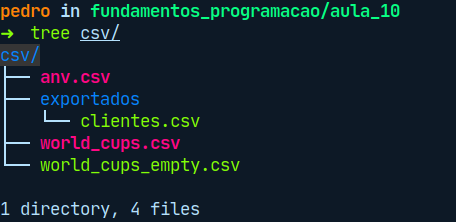

In [112]:
Image('img/export_csv.png')

Observe que dentro do diretório **exportados** existe o arquivo **clientes.csv** que acabamos de criar.

E assim como na leitura, também temos como exportar DataFrames para arquivos de planilhas ([`to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel)), para arquivos **html** ([`to_html()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_html.html)), JSON ([`to_json()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html)) e várias outras extensões.

## Exercícios

### 1. Refazer o Exercício de Análise Demográficas dos Super Heróis

#### Problema

Considere um arquivo CSV (*comma separated values*) informações demográficas sobre super heróis. As informações do arquivo são:

* id - Número da linha
* name - Nome
* Gender - Gênero
* Eye color - Cor dos olhos
* Race - Raça
* Hair color - Cor do cabelo
* Height - Altura em centímetros
* Publisher - Estúdio
* Skin color - Cor da pele
* Alignment - Vilão ou herói
* Weight - Peso em libras

Efetue a leitura desse arquivo, utilizando o pacote **Pandas**, e crie os seguintes arquivos dentro do diretório **csv/exemplos/exportados**:

* Um arquivo **.csv** chamado **males.csv** com todos os heróis do gênero masculino (somente as colunas id, name)
* Um arquivo **.csv** chamado **females.csv** com todos os heróis do gênero feminino (somente as colunas id, name)
* Um arquivo **.csv** chamado **males.csv** com todos os heróis sem genêro definido (somente as colunas id, name)
* Um arquivo **.txt** chamado **marvel_dc.txt** com todos os heróis que pertecem ao estudo **Marvel Comics** ou ao estúdio **DC Comics**(somente a nome e sem cabeçalho)
* Um arquivo **.txt** chamado **bad_blues.txt** com todos os vilões que possuam a cor de pele azul (somente a coluna nome, sem cabeçalho)

#### Resolução

In [1]:
import pandas as pd

df = pd.read_csv('csv/heroes.csv')
df.head()

,id,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [5]:
# Um arquivo .csv chamado males.csv com todos os heróis do gênero masculino (somente as colunas id, name)
males = df[ df['Gender'] == 'Male' ][['id', 'name']]

males.to_csv('csv/exercicios/exportados/resolucao/males.csv', index=False)

,id,name
0,0,A-Bomb
1,1,Abe Sapien
2,2,Abin Sur
3,3,Abomination
4,4,Abraxas


In [8]:
# Um arquivo .csv chamado females.csv com todos os heróis do gênero feminino (somente as colunas id, name)
females = df[ df['Gender'] == 'Female' ][['id', 'name']]

females.to_csv('csv/exercicios/exportados/resolucao/females.csv', index=False)

In [11]:
# Um arquivo .csv chamado males.csv com todos os heróis sem genêro definido (somente as colunas id, name)
genderless = df[ (df['Gender'] != 'Female') & (df['Gender'] != 'Male') ][['id', 'name']]

genderless.to_csv('csv/exercicios/exportados/resolucao/no_gender.csv', index=False)

In [13]:
# Um arquivo .txt chamado marvel_dc.txt com todos os heróis que pertecem ao estudo Marvel Comics ou ao estúdio DC Comics(somente a nome e sem cabeçalho)
marvel_dc = df[ (df['Publisher'] == 'Marvel Comics') | (df['Publisher'] == 'DC Comics') ][['id', 'name']]

marvel_dc.to_csv('csv/exercicios/exportados/resolucao/marvel_dc.txt', header=None, sep=',', index=False)

In [ ]:
# and -> &
# or -> |
# not -> ~

In [20]:
# Um arquivo .txt chamado bad_blues.txt com todos os vilões que possuam a cor de pele azul (somente a coluna nome, sem cabeçalho)
bad_blues = df[ (df['Alignment'] == 'bad') & (df['Skin color'] == 'blue')]['name']

bad_blues.to_csv('csv/exercicios/exportados/resolucao/bad_blues.txt', header=None, index=False)

In [17]:
bad_blues.head()

387    Killer Frost
480        Mystique
487          Nebula
Name: name, dtype: object

#### Resposta

In [113]:
# Definição no caminho do arquivo
filename = 'csv/heroes.csv'

In [114]:
# Leitura do arquivo
df = pd.read_csv(filename)
df.sample(10)

,id,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
13,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0
262,262,Flash,Male,blue,Human,Brown / White,180.0,DC Comics,-,good,81.0
419,419,Luna,Female,-,Human,-,-99.0,Marvel Comics,-,good,-99.0
360,360,Jessica Jones,Female,brown,Human,Brown,170.0,Marvel Comics,-,good,56.0
286,286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
525,525,Power Girl,Female,blue,Kryptonian,blond,180.0,DC Comics,-,good,81.0
626,626,Spider-Woman II,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0
601,601,Silverclaw,Female,brown,-,Black,157.0,Marvel Comics,-,good,50.0
291,291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0
408,408,Lightning Lord,Male,blue,-,Red,191.0,DC Comics,-,bad,95.0


In [115]:
# seleçao dos heróis do gênero masculino (id, name)
df_males = df[df['Gender'].str.lower() == 'male'][['id', 'name']]
df_males.head()

# Escrita do arquivo .csv
df_males.to_csv('csv/exercicios/exportados/respostas/males.csv', index=False)

In [116]:
# seleçao dos heróis do gênero feminino (id, name)
df_females = df[df['Gender'].str.lower() == 'female'][['id', 'name']]
df_females.head()

# Escrita do arquivo .csv
df_females.to_csv('csv/exercicios/exportados/respostas/females.csv', index=False)

In [117]:
# seleçao dos heróis sem gênero definido (id, name)
df_undifined = df[df['Gender'].str.lower() == '-'][['id', 'name']]
df_undifined.head()

# Escrita do arquivo .csv
df_undifined.to_csv('csv/exercicios/exportados/respostas/undifined.csv', index=False)

In [118]:
# Crição das máscaras seleção
mask_marvel = df['Publisher'].str.lower() == 'marvel comics'
mask_dc = df['Publisher'].str.lower() == 'dc comics'

# seleçao dos heróis dos estúdios Marvel Comics ou DC Comics
df_marvel_dc = df[ mask_marvel | mask_dc ][['name']]
df_marvel_dc.head()

# Escrita do arquivo .txt
df_marvel_dc.to_csv('csv/exercicios/exportados/respostas/marvel_dc.txt', index=False, header=False)

In [119]:
# Crição das máscaras seleção
mask_skin = df['Skin color'].str.lower() == 'blue'
mask_alignment = df['Alignment'].str.lower() == 'bad'

# seleçao dos vilões com pele azul
df_bad_blues = df[ mask_skin & mask_alignment ][['name']]
df_bad_blues.head()

# Escrita do arquivo .txt
df_bad_blues.to_csv('csv/exercicios/exportados/respostas/bad_blues.txt', index=False, header=False)

### 2. Refazer o Exercício da Análise dos Jogos da Copa do Mundo

#### Problema

Considere um arquivo CSV com os seguintes dados de todas as copas do mundo até o ano de 2014. As informações do arquivo são:

* Year - Ano da copa
* Country - País sede
* Winner - Campeão
* Runners-Up - Vice-Campeão
* Third - Terceiro lugar
* Fourth - Quarto Lugar
* GoalsScored - Total de Gols
* QualifiedTeams - Quantidade de Times
* MatchesPlayed - Quantidade de Jogos
* Attendance - Público Total

Efetue a leitura desse arquivo, utilizando o pacote pandas, e crie um arquivo **.txt**, chamado ***world_cups_output.txt***, no diretório **csv/exemplos/exportados**, com as seguintes informações (uma informação por linha):

* Soma de público das copas com anos final 0 (1930, 1950, etc)
* Quantidade total de gols entre as copas de 1954 e 1990, inclusive
* Média de público
* Média de gols por partida
* Quantidade de vezes em que o país sede foi campeão
* Quantidade de vezes em que o time do Brasil ficou entre uma das 4 primeiras posições
* Ano das edições em que o time da França finalizou em terceiro lugar
* Quantidade de vitórias por país, ordenada de forma crescente por número de títulos

##### Observações
* Não é necessário criar funções para resolver/responder as questões pedidas. Mas se desejar, pode criar.


#### Resolução

In [19]:
df = pd.read_csv('csv/world_cups.csv')
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [20]:
df.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

In [5]:
# df['Attendance'] = df['Attendance'].astype(float)
# df['Attendance']

In [6]:
# [
#     {'year': 1930, ..., 'Attendance': '590.549'}
#     {'year': 1930, ..., 'Attendance': '590.549'}
#     {'year': 1930, ..., 'Attendance': '590.549'}
#     {'year': 1930, ..., 'Attendance': '590.549'}
#     {'year': 1930, ..., 'Attendance': '590.549'}
# ]
# df['Attendance'] 

In [21]:
df['Attendance'] = df['Attendance'].str.replace('.', '')
df['Attendance'] = df['Attendance'].astype(int)

/tmp/ipykernel_1202/505803845.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Attendance'] = df['Attendance'].str.replace('.', '')


In [8]:
# t = 4.999999
# t

In [9]:
# tt = int(t)
# tt

In [24]:
texto = '1991'
texto.endswith('0')

False

In [22]:
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


In [36]:
# Soma de público das copas com anos final 0 (1930, 1950, etc)
# years = df[df['Year'] % 10 == 0]['Attendance'].sum()
# years = df.loc[df['Year'] % 10 == 0, 'Year']

years = df[ df['Year'] % 10 == 0 ]['Attendance'].sum()



years



# years

8934841

In [11]:
# Quantidade total de gols entre as copas de 1954 e 1990, inclusive
goals = df[ (df['Year'] >= 1954) & (df['Year'] <= 1990) ]['GoalsScored'].sum()
goals

1131

In [12]:
# Média de público
media_publico = df['Attendance'].mean()
media_publico

1872882.35

In [13]:
# Média de gols por partida
media_gols = df['GoalsScored'].sum() / df['MatchesPlayed'].sum()
# media_gols = df['GoalsScored'].sum()
media_gols

2.8456937799043063

In [14]:
# Quantidade de vezes em que o país sede foi campeão
sede_campeao = df[ df['Country'] == df['Winner'] ]['Year'].count()

sede_campeao

5

In [15]:
# Quantidade de vezes em que o time do Brasil ficou entre uma das 4 primeiras posições
brasil = df[ 
    (df['Winner'] == 'Brazil') |
    (df['Runners-Up'] == 'Brazil') |
    (df['Third'] == 'Brazil') |
    (df['Fourth'] == 'Brazil')
]['Year'].count()

brasil

11

In [16]:
# Ano das edições em que o time da França finalizou em terceiro lugar
france = df[ (df['Third'] == 'France') ]['Year'].to_list()

france

[1958, 1986]

In [17]:
# Quantidade de vitórias por país, ordenada de forma crescente por número de títulos
winners = df[['Winner', 'Year']].groupby('Winner').count().sort_values('Year').reset_index()

winners

,Winner,Year
0,England,1
1,France,1
2,Germany,1
3,Spain,1
4,Argentina,2
5,Uruguay,2
6,Germany FR,3
7,Italy,4
8,Brazil,5


In [18]:
winners.columns = ['Winner', 'Quantity']

# Conversão do DataFrame em uma Lista de Dicionários
winners = winners.to_dict(orient='records')

winners

[{'Winner': 'England', 'Quantity': 1},
 {'Winner': 'France', 'Quantity': 1},
 {'Winner': 'Germany', 'Quantity': 1},
 {'Winner': 'Spain', 'Quantity': 1},
 {'Winner': 'Argentina', 'Quantity': 2},
 {'Winner': 'Uruguay', 'Quantity': 2},
 {'Winner': 'Germany FR', 'Quantity': 3},
 {'Winner': 'Italy', 'Quantity': 4},
 {'Winner': 'Brazil', 'Quantity': 5}]

In [82]:
# Cria as Respostas Desejadas que serão escritas no arquivo
with open('csv/exercicios/exportados/resolucao/world_cups_output.txt', 'w') as output:
    output.write(f'Soma de público das copas com final 0: {years} \n')
    output.write(f'Quantidade total de gols entre as copas de 1954 e 1990: {goals}\n')
    output.write(f'Média de público: {round(media_publico, 2)}\n')
    output.write(f'Média de gols por partida: {media_gols:.2f}\n')
    output.write(f'Quantidade de vezes em que o país sede foi campeão: {sede_campeao}\n')
    output.write(f'Quantidade de vezes em que o time do Brasil ficou entre uma das 4 primeiras posições: {brasil}\n')
    output.write(f'Ano das edições em que o time da França finalizou em terceiro lugar: {", ".join(map(str, france))}\n')
    output.write(f'Quantidade de vitórias por país, classificada em ordem crescente do número de títulos:\n')
    for winner in winners:
        output.write(f'\t {winner["Winner"]}: {winner["Quantity"]}\n')

#### Resposta

In [120]:
# imports
import pandas as pd
import numpy  as np

In [121]:
# Caminho completo para o arquivo
file_path = 'csv/world_cups.csv'

In [122]:
# Leitura do arquivo
df = pd.read_csv(file_path)
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [123]:
# Soma de público das copas com anos final 0 (1930, 1950, etc)
# Ajuste de tipo de dado da coluna Attendance
df['Attendance'] = df['Attendance'].str.replace('.', '').astype(int)

# Seleção do público em que a copa ocorreu nos anos com final 0
df_attendance = df[df['Year'] % 10 == 0 ]['Attendance']

# Somatória do publico selecionado
total_attendance = np.sum(df_attendance)

total_attendance

/tmp/ipykernel_13614/111380951.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Attendance'] = df['Attendance'].str.replace('.', '').astype(int)


8934841

In [124]:
# Quantidade total de gols entre as copas de 1954 e 1990, inclusive
# df_goals = df[1954 <= df['Year'] <= 1990]['GoalsScored']  # Erro
df_goals = df[ (1954 <= df['Year']) & (df['Year'] <= 1990) ]['GoalsScored']

# Somatória do Total de Gols
total_goals = np.sum(df_goals)

total_goals

1131

In [125]:
# Média de público
mean_attendance = np.mean(df['Attendance'])

mean_attendance

1872882.35

In [126]:
# Média de gols por partida
mean_goals_matches = np.sum(df['GoalsScored']) / np.sum(df['MatchesPlayed'])

mean_goals_matches

2.8456937799043063

In [127]:
# Quantidade de vezes em que o país sede foi campeão
host_champion = df[df['Country'] == df['Winner']].count()['Winner']

host_champion

5

In [128]:
# Quantidade de vezes em que o time do Brasil ficou entre uma das 4 primeiras posições
# Criação das Mascaras dos testes lógicos
winner_mask = df['Winner'].str.lower() == 'brazil'
second_mask = df['Runners-Up'].str.lower() == 'brazil'
third_mask = df['Third'].str.lower() == 'brazil'
fourth_mask = df['Fourth'].str.lower() == 'brazil'

# Contagem da quantidade de dados selecionados com base nas máscaras criadas
brazil = df[ winner_mask | second_mask | third_mask | fourth_mask ].count()['Winner']

brazil

11

In [129]:
# Ano das edições em que o time da França finalizou em terceiro lugar
# Criação da máscara do teste lógico
france_mask = df['Third'].str.lower() == 'france'

# Converção dos valores selecionados para uma list
france = list(df[france_mask]['Year'])

france

[1958, 1986]

In [130]:
# Quantidade de vitórias por país, ordenada de forma crescente por número de títulos
# Agrupamento dos Paises Vencendores para contagem
df_winners = df[['Winner', 'Year']].groupby('Winner')

# Contagem dos paises vencedores e geração de um novo DataFrame com o resultado
df_winners = df_winners.count().sort_values(by='Year').reset_index()

# Alteração dos nomes das colunas do DataFrame
df_winners.columns = ['Winner', 'Quantity']

# Conversão do DataFrame em uma Lista de Dicionários
winners = df_winners.to_dict(orient='records')

winners

[{'Winner': 'England', 'Quantity': 1},
 {'Winner': 'France', 'Quantity': 1},
 {'Winner': 'Germany', 'Quantity': 1},
 {'Winner': 'Spain', 'Quantity': 1},
 {'Winner': 'Argentina', 'Quantity': 2},
 {'Winner': 'Uruguay', 'Quantity': 2},
 {'Winner': 'Germany FR', 'Quantity': 3},
 {'Winner': 'Italy', 'Quantity': 4},
 {'Winner': 'Brazil', 'Quantity': 5}]

In [131]:
# Cria as Respostas Desejadas que serão escritas no arquivo
with open('csv/exercicios/exportados/respostas/world_cups_output.txt', 'w') as output:
    output.write(f'Soma de público das copas com final 0: {total_attendance} \n')
    output.write(f'Quantidade total de gols entre as copas de 1954 e 1990: {total_goals}\n')
    output.write(f'Média de público: {round(mean_attendance, 2)}\n')
    output.write(f'Média de gols por partida: {mean_goals_matches:.2f}\n')
    output.write(f'Quantidade de vezes em que o país sede foi campeão: {host_champion}\n')
    output.write(f'Quantidade de vezes em que o time do Brasil ficou entre uma das 4 primeiras posições: {brazil}\n')
    output.write(f'Ano das edições em que o time da França finalizou em terceiro lugar: {", ".join(map(str, france))}\n')
    output.write(f'Quantidade de vitórias por país, classificada em ordem crescente do número de títulos:\n')
    for winner in winners:
        output.write(f'\t {winner["Winner"]}: {winner["Quantity"]}\n')

### 3. Refazer o Exercício da Análise das Informações da Aviação Civil Brasileira

#### Problema

Considere um arquivo de entrada no formato CSV (comma separated values) com informações relativas a acidentes na aviação civil brasileira nos últimos 10 anos (arquivo anv.csv)

As informações estão separadas pelo caracter separador ~ e entre “” (aspas) conforme o exemplo abaixo:

```javascript
"201106142171203"~"PPGXE"~"AEROCLUBE"~"AVIÃO"~"NEIVA INDUSTRIA AERONAUTICA"~"56- C"~"PAUL"~"PISTÃO"~"MONOMOTOR"~"660"~"LEVE"~"2"~"1962"~"BRASIL"~"BRASIL"~"PRI"~" INSTRUÇÃO"~"SDPW"~"SDPW"~"INDETERMINADA"~"UNKNOWN"~"VOO DE INSTRUÇÃO"~"SUBSTANCIAL"~"0"~"2018-07-09“

"201707111402595"~"PPNCG"~"OPERADOR PARTICULAR"~"AVIÃO"~"PIPER AIRCRAFT"~"PA-46- 350P"~"PA46"~"TURBOÉLICE"~"MONOMOTOR"~"1950"~"LEVE"~"6"~"1990"~"NULL"~"BRASIL"~" TPP"~"PARTICULAR"~"SBBR"~"SBGR"~"POUSO"~"LANDING"~"VOO PRIVADO"~"NENHUM"~"0"~"2018-07-09"'''
```

O arquivo é composto das seguintes colunas:
1. codigo_ocorrencia
2. aeronave_matricula
3. aeronave_operador_categoria 
4. aeronave_tipo_veiculo
5. aeronave_fabricante
6. aeronave_modelo
7. aeronave_tipo_icao
8. aeronave_motor_tipo
9. aeronave_motor_quantidade 
10. aeronave_pmd 
11. aeronave_pmd_categoria 
12. aeronave_assentos 
13. aeronave_ano_fabricacao
14. aeronave_pais_fabricante 
15. aeronave_pais_registro 
16. aeronave_registro_categoria 
17. aeronave_registro_segmento 
18. aeronave_voo_origem 
19. aeronave_voo_destino 
20. aeronave_fase_operacao 
21. aeronave_fase_operacao_icao 
22. aeronave_tipo_operacao 
23. aeronave_nivel_dano 
24. total_fatalidades
25. aeronave_dia_extracao

Crie um função faça a leitura do arquivo, utilizando o pacote Pandas, e processe o arquivo para obter as informações que são pedidas:

* Crie uma tabela de ***Estatística Descritiva*** para as variáveis numéricas. Remova as linhas com dados faltantes caso necessário. Salve essa tabela (formato **csv**) com o nome de ***anv_desc.csv*** no diretório **csv/exemplos/exportados**.
* Crie um arquivo de saída (formato **json**) com com o nome ***statistics.json*** no diretório **csv/exemplos/exportados**, e deve possuir as as estatísticas: 
    * fase de operação
    * número de total de ocorrências
    * percentual de quanto essa fase representa dentro de todos os dados
* Crie um arquivo de saída (formato **csv**) com nome ***levels.csv***. Considere somente os acidentes que o dano da aeronave tenha sido LEVE ou NENHUM (coluna `aeronave_nivel_dano`) e que o número de fatalidades (`total_fatalidades`) tenha sido superior à 0 (zero). O arquivo de saída deve conter as seguintes informações:
    * operation -> aeronave_operador_categoria
    * type -> aeronave_tipo_veiculo
    * manufacturer -> aeronave_fabricante
    * engine_type aeronave_motor_tipo
    * engines -> aeronave_motor_quantidade
    * year_manufacturing -> aeronave_ano_fabricacao
    * seating -> aeronave_assentos
    * fatalities -> total_fatalidades


***
##### Exemplo do Arquivo de Saída JSON:

```json
[
  {
    "fase_operacao": "APROXIMAÇÃO FINAL", 
    "ocorrencias": 234,
    "percentual": "4,51%"
  },
  {
    "fase_operacao": "INDETERMINADA", 
    "ocorrencias": 180,
    "percentual": "2,43%"
  },
  {
    "fase_operacao": "MANOBRA", 
    "ocorrencias": 80,
    "percentual": "0,95%"
  }
]
```

#### Resolução

In [69]:
# Imports
import numpy as np
import pandas as pd

In [70]:
# leitura do arquivo
def leitura(caminho, delimiter=',', encoding='UTF-8'):
    return pd.read_csv(caminho, delimiter=delimiter, encoding=encoding)

In [71]:
# Criação do arquivo da Tabela de Estatistica Descritiva
def create_statistics_dataframe(dataframe):
    # limpeza e preparação
    numeric = dataframe.select_dtypes(include=['int64', 'float64'])

    numeric = numeric.drop(['codigo_ocorrencia'], axis=1)

    numeric = numeric.dropna()

    numeric['aeronave_assentos'] = numeric['aeronave_assentos'].astype(int)

    numeric['aeronave_ano_fabricacao'] = numeric['aeronave_ano_fabricacao'].astype(int)

    numeric = numeric[numeric['aeronave_assentos'] > 0 ]

    numeric = numeric[numeric['aeronave_ano_fabricacao'] > 0]

    numeric['aeronave_ano_fabricacao'] = pd.to_datetime(numeric['aeronave_ano_fabricacao'], format='%Y')

    numeric['aeronave_ano_fabricacao'] = numeric['aeronave_ano_fabricacao'].dt.year


    # Criação da tabela de estistica descritiva
    df_min = pd.DataFrame( numeric.apply(np.min) )
    df_max = pd.DataFrame( numeric.apply(np.max) )
    df_mean = pd.DataFrame( numeric.apply(np.mean) )
    df_median = pd.DataFrame( numeric.apply(np.median) )
    df_std = pd.DataFrame( numeric.apply(np.std) )
    df_skew = pd.DataFrame( numeric.apply(lambda column: column.skew() ) )
    df_range = pd.DataFrame( numeric.apply(lambda column: column.max() - column.min()) )
    df_kurtosis = pd.DataFrame( numeric.apply(lambda column: column.kurtosis()) )


    # União dos dataframe
    df_desc = pd.concat([df_min, df_max, df_range, df_median, df_mean, df_std, df_skew, df_kurtosis], axis=1)
    df_desc = df_desc.reset_index()
    df_desc.columns = ['atributos', 'min', 'max', 'range', 'mediana', 'media', 'std', 'skew', 'curtose']

    # Exportar para arquivo csv
    df_desc.to_csv('csv/exercicios/exportados/resolucao/anv_desc.csv', index=False)
    
    print(f'Arquivo criado com sucesso')

    return df_desc

In [72]:
# Criação do Arquivo JSON com os dados de Fase de Operação
def statics_json(dataframe):
    
    df_grouped = dataframe[['codigo_ocorrencia', 'aeronave_fase_operacao']].groupby('aeronave_fase_operacao')

    df_grouped = df_grouped.count().reset_index()

    total = df.shape[0]

    df_grouped['percentual'] = df_grouped.apply(
        lambda line: round(line['codigo_ocorrencia'] * 100 / total, 3),
        axis = 1
    )

    df_grouped.columns = [ "fase_operacao", "ocorrencias", "percentual" ]

    df_grouped.to_json('csv/exercicios/exportados/resolucao/statistics.json', indent=4, orient='records')
    
    print(f'Arquivo JSON criado com sucesso')
    
    return df_grouped

In [68]:
# Criação do Arquivo CSV com as colunas e dados solictados
def levels_csv(dataframe):
    cols = [
         'aeronave_operador_categoria',
         'aeronave_tipo_veiculo',
         'aeronave_fabricante',
         'aeronave_motor_tipo',
         'aeronave_motor_quantidade',
         'aeronave_ano_fabricacao',
         'aeronave_assentos',
         'total_fatalidades',
    ]

    df1 = dataframe[
        ((df['aeronave_nivel_dano'] == 'LEVE') |
        (df['aeronave_nivel_dano'] == 'NENHUM')) &
        (df['total_fatalidades'] > 0)
    ][cols]

    df1.columns = [
        'operation',
        'type',
        'manufacturer',
        'engine_type',
        'engines',
        'year_manufacturing',
        'seating',
        'fatalities',
    ]

    df1.to_csv('csv/exercicios/exportados/resolucao/levels.csv', index=False)
    
    print(f'Arquivo csv criado com sucesso')
    
    return df1

In [73]:
# Teste das funções
df = leitura(delimiter='~', caminho='csv/anv.csv')

# exportação do arquivo csv com a tabela
# estatistica descritiva
df_desc = create_statistics_dataframe(df)

# Exportação do arquivo JSON
df_json = statics_json(df)

# Exportação do arquivo CSV
df_levels = levels_csv(df)

Arquivo criado com sucesso
Arquivo JSON criado com sucesso
Arquivo csv criado com sucesso


#### Resposta

In [132]:
# imports
import pandas as pd
import numpy  as np

In [133]:
# Tabela descritiva
def create_descriptive_table(dataframe):
    # Selecionando somente os tipos numéricos
    df_numeric = dataframe.select_dtypes(include=['int64', 'float64'])

    # removendo colunas desnecessárias
    df_numeric.drop(['codigo_ocorrencia', 'aeronave_ano_fabricacao'], axis=1, inplace=True)

    # removendo liunhas com dados faltantes
    df_numeric.dropna(inplace=True)

    # Criação dos DataFrames de Análise estatística
    df_std      = pd.DataFrame(df_numeric.apply(np.std))
    df_min      = pd.DataFrame(df_numeric.apply(np.min))
    df_max      = pd.DataFrame(df_numeric.apply(np.max))
    df_mean     = pd.DataFrame(df_numeric.apply(np.mean))
    df_median   = pd.DataFrame(df_numeric.apply(np.median))
    df_skew     = pd.DataFrame(df_numeric.apply(lambda column: column.skew()))
    df_kurtosis = pd.DataFrame(df_numeric.apply(lambda column: column.kurtosis()))
    df_range    = pd.DataFrame(df_numeric.apply(lambda column: column.max() - column.min()))

    # Concatenação dos DataFrames
    df_desc = pd.concat([df_std, df_min, df_max, df_range, df_mean, df_median, df_skew, df_kurtosis], axis=1)
    df_desc.columns = ['Std', 'Min', 'Max', 'Range', 'mean', 'median', 'Skew', 'Kurtosis']
    
    return df_desc

In [134]:
# Criação do DataFrame que será utilizado para
# criar o arquivo JSON
def create_df_statistics(dataframe):
    # Cria o DataFrame com a quantidade de registros
    # agrupados por fase de operação
    df_ocorr = dataframe[['codigo_ocorrencia', 'aeronave_fase_operacao']].\
                       groupby('aeronave_fase_operacao').count().reset_index()
    
    # Cria a coluna percentual arrendondada com 3 casas decimais
    df_ocorr['percentual'] = df_ocorr.apply(
        lambda line: round(line['codigo_ocorrencia'] * 100 / dataframe.shape[0], 3), 
        axis=1 )
    
    # Renomeia as colunas do DataFrame
    df_ocorr.columns = ['fase_operacao', 'ocorrencias', 'percentual']
    
    return df_ocorr

In [135]:
# Função que irá criar o arquivo JSON
def create_json_file(dataframe, filepath):
    dataframe.to_json(filepath, indent=4)

In [136]:
# Criação DataFrame que será utilizado para
# Criar o arquivo csv
def create_df_levels(dataframe):
    # Criação da primeira condição - Dano na Aeronave == Nenhum
    damage_none = dataframe['aeronave_nivel_dano'].str.lower() == 'nenhum'

    # Criação da segunda condição - Dano na Aeronave == Leve
    damage_light = dataframe['aeronave_nivel_dano'].str.lower() == 'leve'

    # Criação da terceira condição - Total Fatalidades > 0
    fatalities_mask = dataframe['total_fatalidades'] > 0

    # Criação da seleção dos registros com base nas
    # Condições criadas anteriormente
    df_level = dataframe[ (damage_none | damage_light) & fatalities_mask ]

    # Seleção das colunas desejadas
    df_level = df_level[[
        'aeronave_operador_categoria',
        'aeronave_tipo_veiculo',
        'aeronave_fabricante',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_ano_fabricacao',
        'aeronave_assentos',
        'total_fatalidades',
    ]]

    # Renomeando as colunas selecionadas
    df_level.columns = [
        'operation', 
        'type',
        'manufacturer',
        'engine_type',
        'engines',
        'year_manufacturing',
        'seating',
        'fatalities'
    ]

    return df_level

In [137]:
def create_csv_file(dataframe, index_label, filepath):
    dataframe.to_csv(filepath, index_label=index_label)

In [138]:
def process_file(file_path):
    # Faz a leitura do arquivo .csv
    df = pd.read_csv(file_path, encoding='UTF-8', delimiter='~')
    
    # Cria o DataFrame Que será utilizado para gerar
    # o arquivo levels.csv
    df_levels = create_df_levels(df)
    
    # Cria o DataFrame que será utilizado para gerar
    # o arquivo statistics.json
    df_statistics = create_df_statistics(df)
    
    # Cria o DataFrame que será utilizado para gerar
    # o arquivo anv_desc.csv
    ds_descriptive = create_descriptive_table(df)
    
    # Cria o arquivo levels.csv
    create_csv_file(df_levels, False, 'csv/exercicios/exportados/respostas/levels.csv')
    
    # Cria o arquivo anv_desc.csv
    create_csv_file(ds_descriptive, 'atributos', 'csv/exercicios/exportados/respostas/anv_desc.csv')
    
    # Cria o arquivo statistics.json
    create_json_file(df_statistics, 'csv/exercicios/exportados/respostas/statistics.json')

In [139]:
# Definição do caminho do arquivo de leitura
file_path = 'csv/anv.csv'

# Execuçdo processamento do arquivo
process_file(file_path)

# INTRODUÇÃO AO SEABORN

A biblioteca [seaborn](https://seaborn.pydata.org/index.html) é uma biblioteca criada com base a biblioteca [matplotlib](https://matplotlib.org/), que é utilizada para criarmos visualizações em Python. Para exemplificar isso observe o seguinte código:

In [11]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(15, 8)

In [47]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

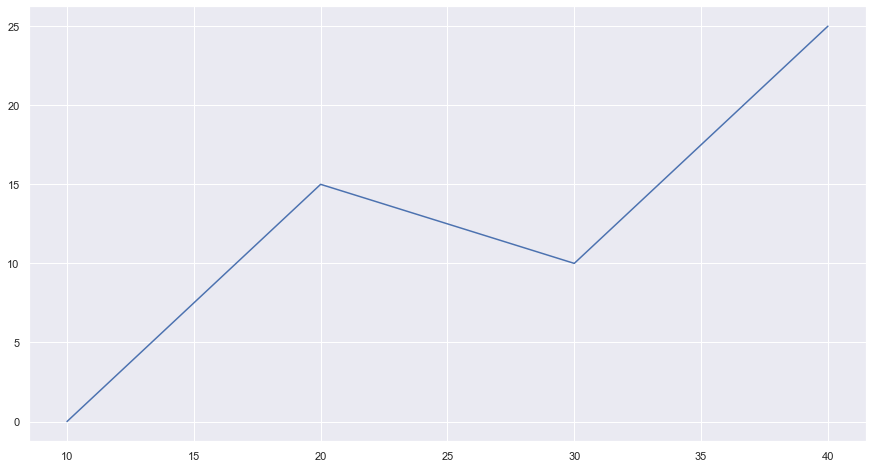

In [50]:
plt.plot(x, y)

Observe que agora iremos ajustar redefinir as configurações padrão para a utilização do **seaborn** ao invés do pyplot:

In [36]:
import seaborn as sns

In [37]:
# Atualização das definições de desenho de gráficos
# para a biblioteca seaborn
sns.set()

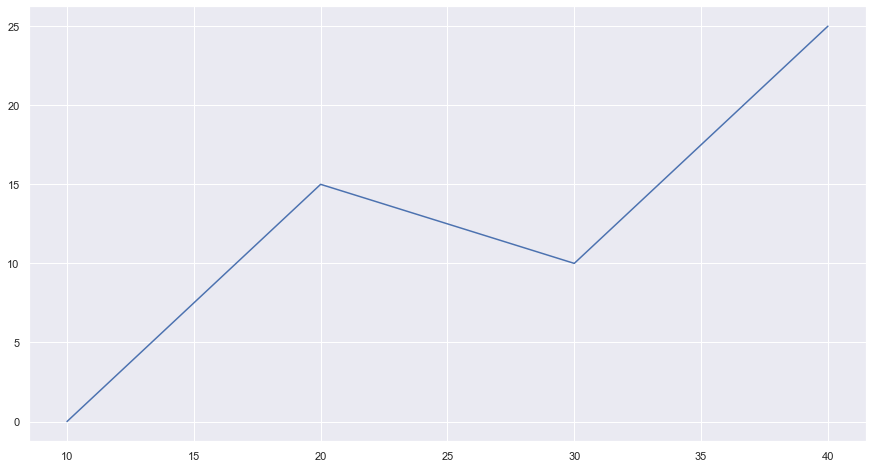

In [51]:
plt.plot(x, y)

Observe que, somente utilizando o comando `sns.set()` o layout do gráfico anterior foi modificado. Novamente, isso acontece pois o **seaborn** foi construído em cima da biblioteca **matplotlib**, e por esse motivo conseguimos utilizar funções do **seaborn** em conjunto com o **matplotlib**, como por exemplo o aumento do tamanho da figura!

Vamos ver os principais gráficos e para isso, vamos carregar Datasets do próprio **seaborn** conforme formos demonstrandos gráficos em questão.

## Gráfico de Barras

**Gráficos de Barras** normalmente são utilizados para representar contagens de uma variável categórica. Por exemplo, observe a tabela abaixo:

In [8]:
# Carrega os Dataset em um objeto DataFrame
df = sns.load_dataset('penguins').dropna().reset_index()

# Renomia as colunas
df.columns = ['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

# Exibe as 10 primeiras linhas
df.head(10)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
5,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
6,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
7,12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
8,13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
9,14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [9]:
# Agrupa os dados pela coluna "flipper_length_mm" e depois
# conta quantos dados temos dentro de cada grupo. Pega somente
# as 10 primeiras linhas
df[['id', 'flipper_length_mm']].groupby('flipper_length_mm').count().reset_index()[:10]

,flipper_length_mm,id
0,172.0,1
1,174.0,1
2,176.0,1
3,178.0,4
4,180.0,4
5,181.0,7
6,182.0,3
7,183.0,2
8,184.0,7
9,185.0,9


Nela estamos agrupando a quantidade de penguins com base no tamanho (comprimento) das suas nadadeiras. Observe que, como temos muitas dados, fazer a leitura e interpretação da tabela acima se torna complicado e difícil, mesmo que ordenemos a a tabela:

In [10]:
# Agrupa os dados pela coluna "flipper_length_mm" e depois
# conta quantos dados temos dentro de cada grupo, ordenando pela quantidade
# contada em cada grupo. Pega somente as 10 primeiras linhas
df[['id', 'flipper_length_mm']].groupby('flipper_length_mm').count().sort_values(by='id').reset_index()[:10]

,flipper_length_mm,id
0,172.0,1
1,226.0,1
2,206.0,1
3,231.0,1
4,174.0,1
5,176.0,1
6,229.0,2
7,183.0,2
8,223.0,2
9,211.0,2


Se exibirmos o mesmo resultado utilizando um gráfico de barras para demonstrar a quantidade, observe que será mais fácil de visualizarmos:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='count'>

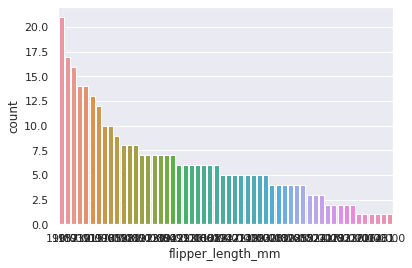

In [11]:
# Agrupamento e criação do DataFrame
count_flipper = df[['flipper_length_mm', 'id']].groupby('flipper_length_mm').count().reset_index()
count_flipper.columns = ['flipper_length_mm', 'count']

# Definição das informações do Gráfico
sns.barplot(
    x='flipper_length_mm', 
    y='count', 
    data=count_flipper, 
    # Configuração para deixar o gráfico ordenado e descrescente
    order=count_flipper.sort_values('count', ascending=False)['flipper_length_mm']
)

Observe que, mesmo o gráfico estando pequeno e com os valores do eixo X todos juntos, fica um pouco mais visual percebermos as informações. Vamos começar ajustando o tamanho do nosso gráfico. Quando utilizamos a biblioteca **seaborn**, para ajustar o tamanho do gráfico temos duas opções:
1. Ajustar o tamanho utilizando o módulo **PyPlot**
2. Ajustar utilizando a própria biblioteca seaborn.

Se decidirmos utilizar o módulo **PyPlot**, teremos de ajustar o tamanho de todos os nossos gráficos "individualmente". Ou seja, a cada gráfico que formos desenhar, teremos que utilizar o **Pyplot** para ajustar o seu tamanho. Para utilizarmos o **Pyplot**, primeiro temos que importá-lo da biblioteca **Matplotlib**:

In [12]:
from matplotlib import pyplot as plt

Com o módulo **PyPlot** importado, vamos ajustar a definição do tamanho da figura utilizando o método `figure()`:

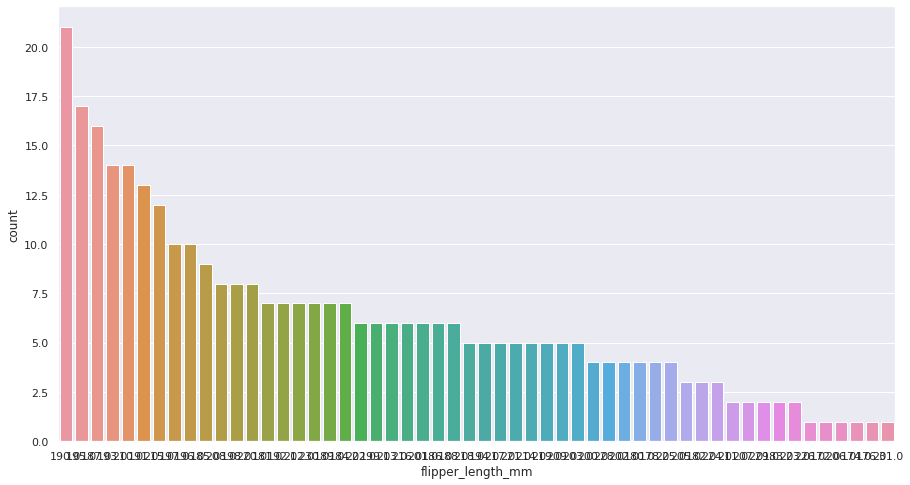

In [13]:
# Define o tamnho (em pixels) da imagem (gráfico)
plt.figure(figsize=(15, 8));

# Definição das informações do Gráfico
sns.barplot(
    x='flipper_length_mm', 
    y='count', 
    data=count_flipper, 
    # Configuração para deixar o gráfico ordenado e descrescente
    order=count_flipper.sort_values('count', ascending=False)['flipper_length_mm']
);

Observe que quando se tentarmos imprimir o mesmo gráfico, ele ficará com o tamanho anterior ao ajuste

<AxesSubplot:xlabel='flipper_length_mm', ylabel='count'>

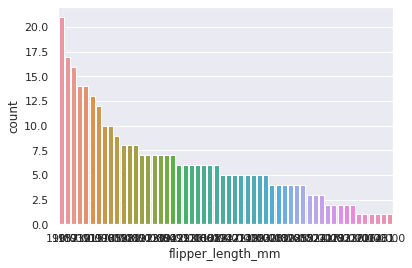

In [14]:
# Definição das informações do Gráfico
sns.barplot(
    x='flipper_length_mm', 
    y='count', 
    data=count_flipper, 
    # Configuração para deixar o gráfico ordenado e descrescente
    order=count_flipper.sort_values('count', ascending=False)['flipper_length_mm']
)

Se desejarmos utilizar a biblioteca **seaborn** para ajustarmos o tamanho de nossos gráficos, a partir do momento que fizermos a definição do tamanho, todos os gráficos desenhados terão esse tamanho definido, até que façamos uma redefinição. Para utilizarmos a biblioteca **seaborn** para realizar esse ajuste, basta utilizar a função `sns.set()`:

In [15]:
# Define o tamanho dos gráficos que serão desenhados
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:xlabel='flipper_length_mm', ylabel='count'>

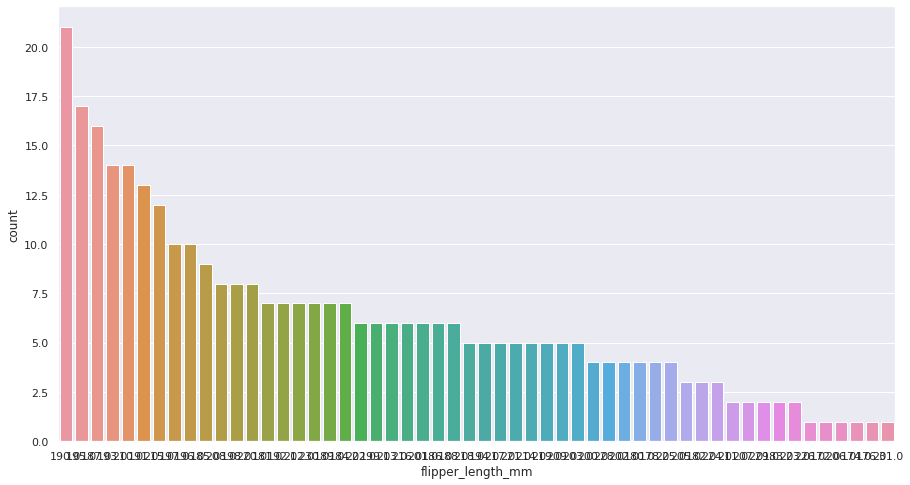

In [16]:
# Definição das informações do Gráfico
sns.barplot(
    x='flipper_length_mm', 
    y='count', 
    data=count_flipper, 
    # Configuração para deixar o gráfico ordenado e descrescente
    order=count_flipper.sort_values('count', ascending=False)['flipper_length_mm']
)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='count'>

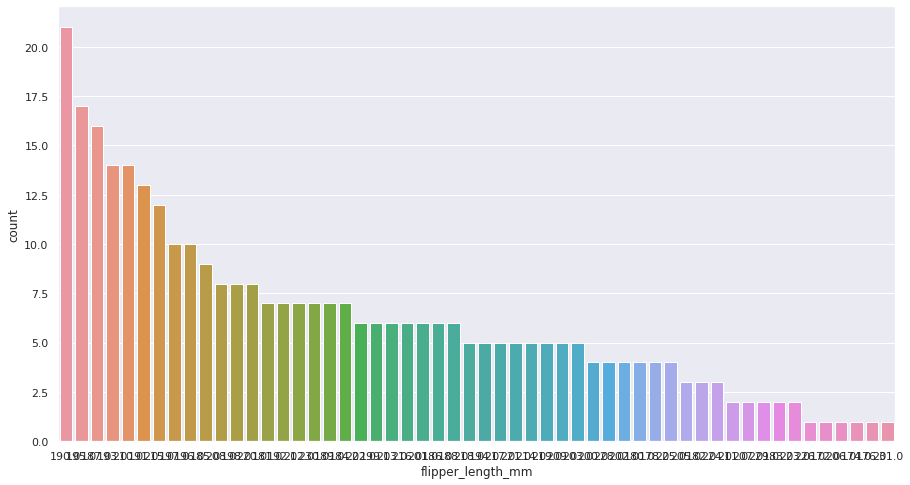

In [17]:
# Segundo gráfico
# Definição das informações do Gráfico
sns.barplot(
    x='flipper_length_mm', 
    y='count', 
    data=count_flipper, 
    # Configuração para deixar o gráfico ordenado e descrescente
    order=count_flipper.sort_values('count', ascending=False)['flipper_length_mm']
)

Observe que, mesmo sem ter ajustado o tamanho da imagem, como definimos o tamanho da imagem diretamente com a biblioteca **seaborn**, todas as próximas ghráficos desenhados terão o tamanho definido.

Outro ponto importante de se notar é que os textos do eixo do tamanho das nadadeiras estão sobrepostos, o que inviabiliza a leitura. Para realizar esse ajuste, temos que utilizar o Pacote **Plotly** da biblioteca **Matplotlib**. Dentro do pacote **Plotly** existe uma função chamada `xticks`. Nela passamos o valor do angulo que desejamos rotacionar os nossos marcadores do eixo x. Como o **seaborn** é construído em cima da biblioteca **Matplotlib**, não haverá problema em usar o pacote **Plotly** para fazer esse ajuste.

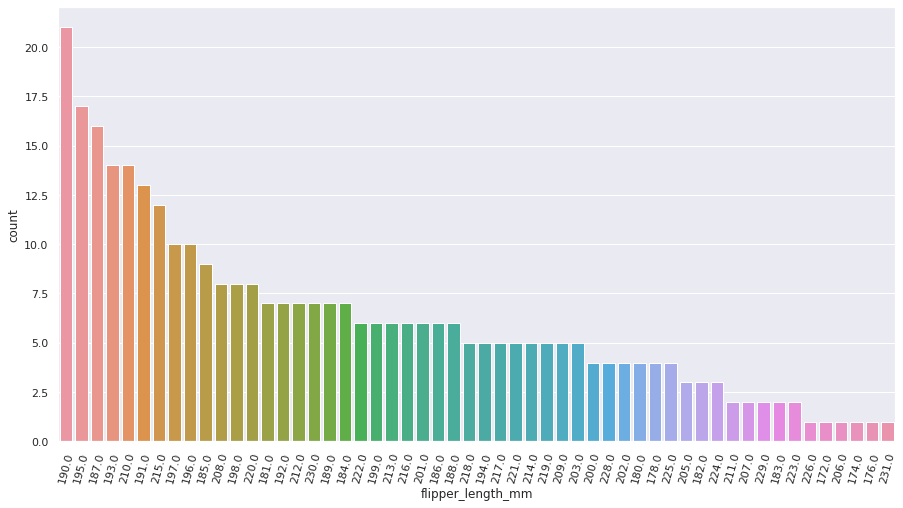

In [18]:
sns.barplot(
    x='flipper_length_mm', 
    y='count', 
    data=count_flipper, 
    # Configuração para deixar o gráfico ordenado e descrescente
    order=count_flipper.sort_values('count', ascending=False)['flipper_length_mm']
)

plt.xticks(rotation=75);

Um cuidado ao utilizarmos gráficos de barra é com a escala do eixo Y e como criamos esse eixo. No geral, é uma boa prática que os eixos sempre iniciem do zero, pois se não fizermos isso estaremos induzindo os outros ao erro. Para exemplificar, observe o seguinte gráfico de barras:

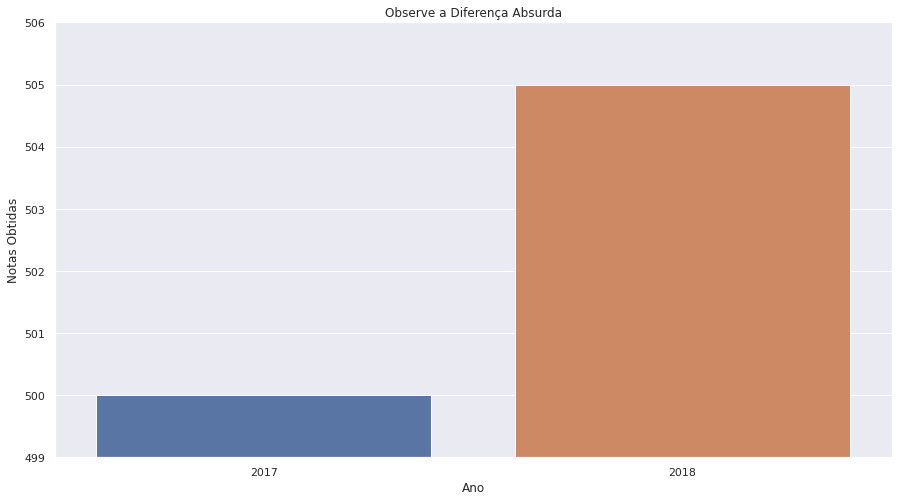

In [19]:
notas = [500, 505]
anos = [2017, 2018]

ax = sns.barplot(x=anos, y=notas)
ax.set(ylim=(499, 506), ylabel='Notas Obtidas', title='Observe a Diferença Absurda', xlabel='Ano');

Observe que, como o valor inicial do eixo Y não é zero, por mais que a diferença entre as barras seja somente de 5 unidades, ela parece um valor absurdo. 

Se mantermos o padrão e iniciarmos os eixos sempre em zero, esse seria o resultado do gráfico de barras:

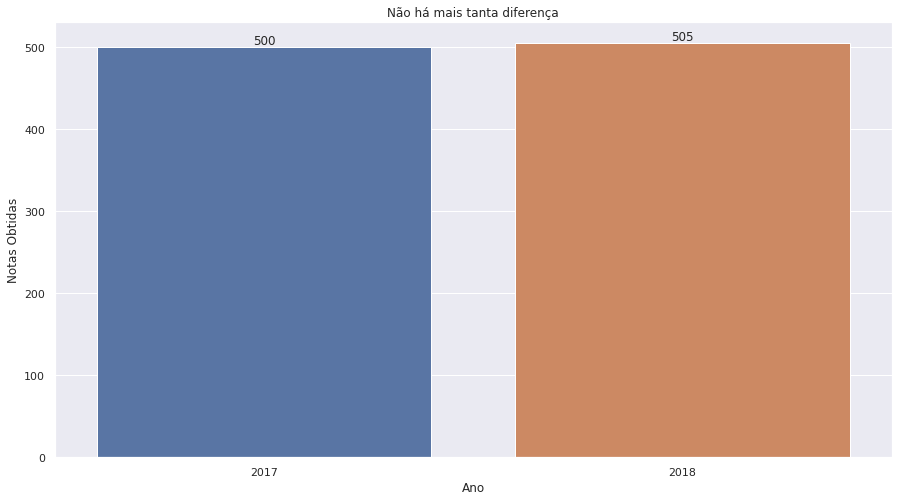

In [20]:
notas = [500, 505]
anos = [2017, 2018]

# Monta a estrutura do Gráfico de Barras
ax = sns.barplot(x=anos, y=notas)

# Adiciona os valores de cada barra
ax.bar_label(ax.containers[0])

# Adiciona os labels para os eixos X e Y, bem
# como o titulo do Gráfico
ax.set(ylabel='Notas Obtidas', title='Não há mais tanta diferença', xlabel='Ano');

Observe que agora a diferença é quase imperceptível, o que as vezes torna esse gráfico também difícil de ler, o que nos faz ter que utilizar a função `ax.bar_label(ax.containers[0])` para adicionar o valor de cada barra, tornando assim o gráfico mais "palatável".

## Gráficos de Linha

Gráficos de linhas são muito úteis para mostrar tendências. Ou seja, quando estamos estudando o comportamento de uma variável ao longo do tempo, geralmente utilizamos um gráfico de linha para verificarmos se a variável teve um comportamento positivo ou negativo ao longo do tempo.

Para criar nossos gráficos de linha, ou *Line Charts*, vamos utilizar outro DataFrame da biblioteca **seaborn**:

In [86]:
# Carrega o dataset
df = sns.load_dataset('exercise').dropna()

df

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [87]:
# Carrega o dataset
df = sns.load_dataset('exercise').dropna()

# Renomeia as colunas
df.columns = ['err', 'id', 'diet', 'pulse', 'time', 'kind']

# Dropa a coluna que funcionava como indice da linha
df = df.drop(['err'], axis=1)

# Retira o "min" da coluna time e devole somente o número
df['time'] = df.apply(lambda line: line['time'].split()[0], axis = 1)

# Troca o tipo da coluna tipo para int
df['time'] = df['time'].astype(int)

# imprime as 5 primeiras linhas do DataFrame
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1,rest
1,1,low fat,85,15,rest
2,1,low fat,88,30,rest
3,2,low fat,90,1,rest
4,2,low fat,92,15,rest


In [88]:
# Selecionando os dados do DataFrame para serem 
# impressos no gráfico de linhas
df_sns_1 = df[0:12]
# df_sns_1 = df.copy()
# df_sns_1.shape

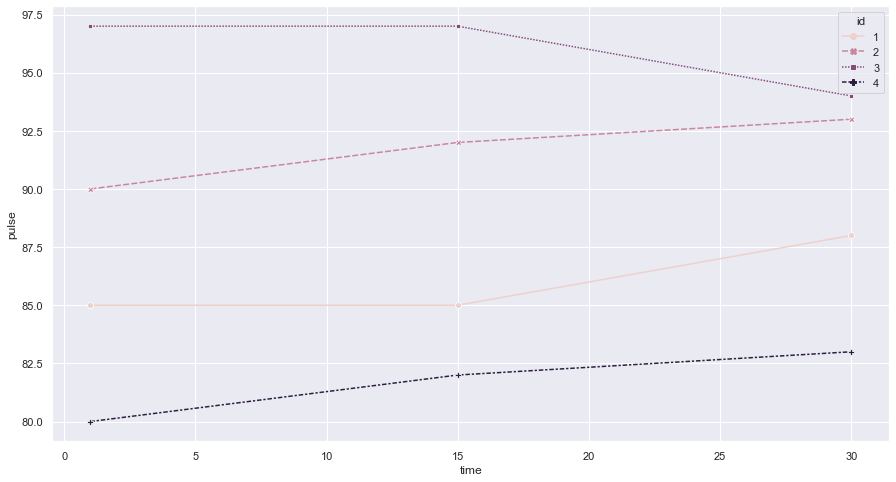

In [89]:
sns.lineplot(
    data = df_sns_1,
    x =  'time',
    y = 'pulse',
    hue='id',
#   palette = ['red', 'blue', 'black', 'green'],
    markers=True, 
    style='id'
);

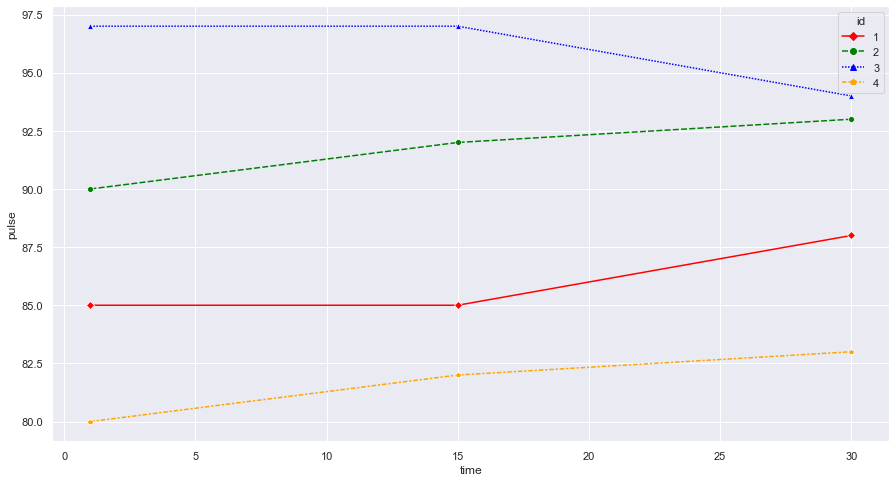

In [90]:
# Imprime o gráfico de linhas
ax = sns.lineplot(
    data=df_sns_1, 
    x='time', 
    y='pulse', 
    hue='id', 
    palette=['red', 'green', 'blue', 'orange'], 
    markers=['D', 'o', '^', 'p'], 
    style='id'
)

Como podemos observar, gráficos de linha são bons para vermos como o comportamento de uma variável evolui conforme o tempo. Ou seja, são bons para verificarmos as tendências dos nossos atributos.

Outro ponto importante ao utilizar a biblioteca seaborn para desenharmos gráficos de linha é que, diferente da biblioteca Matplotlib, ao utilizarmos o seaborn, temos que passar todas as linhas (dados) quando desejamos criar gráficos de linha com várias informações diferente ao mesmo tempo. Para exemplificar melhor, vamos observar o seguinte gráfico:

In [91]:
# Linhas que serão desenhadas no gráfico
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [ x + y for x, y in zip(variance, bias_squared) ]
cohort = [ 100 for _, _ in enumerate(variance) ]
xs = [ i for i, _ in enumerate(variance) ]

print(f'variance: {variance}')
print(f'bias_squared: {bias_squared}')
print(f'total_error: {total_error}')
print(f'cohort: {cohort}')
print(f'xs: {xs}')

variance: [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared: [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error: [257, 130, 68, 40, 32, 40, 68, 130, 257]
cohort: [100, 100, 100, 100, 100, 100, 100, 100, 100]
xs: [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [92]:
# Criação do DataFrame com as informações que 
# Deverão ser exibidas dentro do gráfico de 
# linhas
df = pd.DataFrame({
    'xs': xs,
    'variance': variance,
    'bias_squared': bias_squared,
    'total_error': total_error,
    'cohort': cohort,
})

# Quebra o DataFrame para criar a estrutura de
# forma que uma coluna se torna o indentificador
# da linha, outra coluna possua o nome da variavel
# a terceira coluna o valor da variável
# df = pd.melt(df, ['xs'])
# df.head(20)

# df

In [93]:
# Criação do DataFrame com as informações que 
# Deverão ser exibidas dentro do gráfico de 
# linhas
df = pd.DataFrame({
    'xs': xs,
    'variance': variance,
    'bias_squared': bias_squared,
    'total_error': total_error,
    'cohort': cohort,
})

# Quebra o DataFrame para criar a estrutura de
# forma que uma coluna se torna o indentificador
# da linha, outra coluna possua o nome da variavel
# a terceira coluna o valor da variável
df = pd.melt(df, ['xs'])
df.head(20)

# df

,xs,variable,value
0,0,variance,1
1,1,variance,2
2,2,variance,4
3,3,variance,8
4,4,variance,16
5,5,variance,32
6,6,variance,64
7,7,variance,128
8,8,variance,256
9,0,bias_squared,256


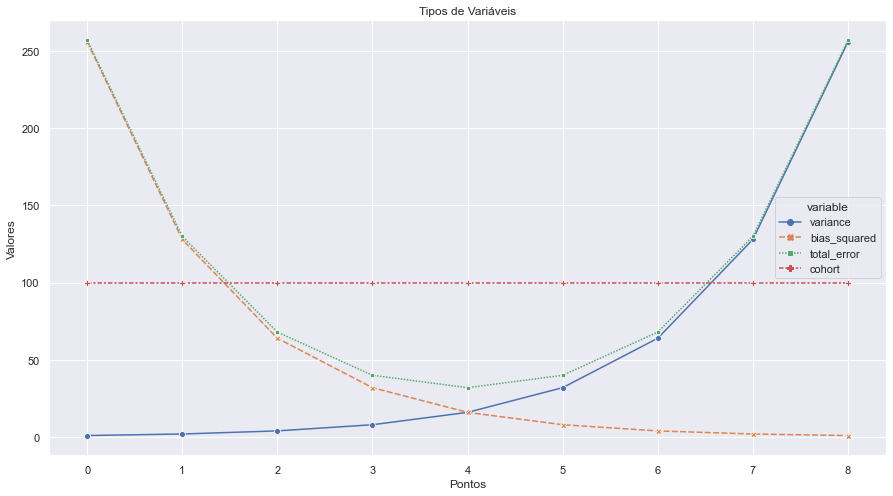

In [94]:
# df_1 = df.copy()

# df_1 = df.loc[df['variable'] == 'total_error', :]

ax = sns.lineplot(
    data=df,
    x='xs',
    y='value',
    hue='variable',
    markers=True,
    style='variable'
)
ax.set(
    xlabel = 'Pontos',
    ylabel = 'Valores',
    title = 'Tipos de Variáveis'
);

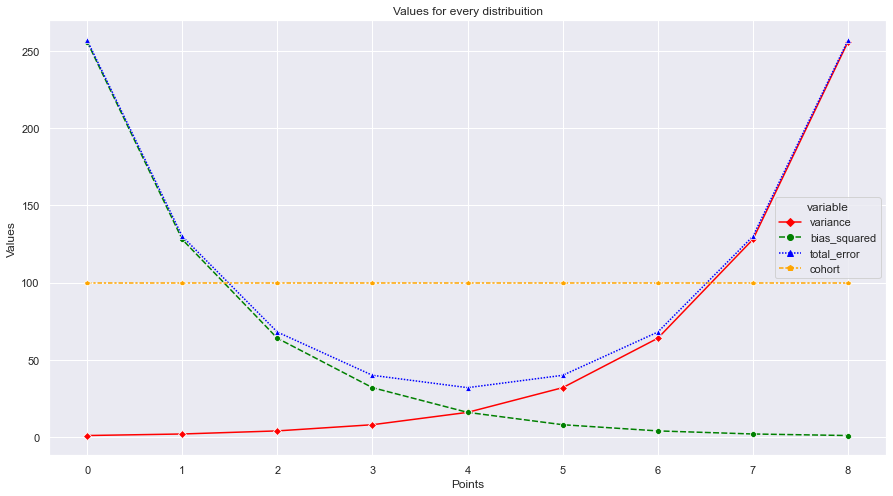

In [95]:

# Desenha o gráfico de linhas com todas as 
# variáveis do DataFrame
ax = sns.lineplot(
    data=df,
    x = 'xs',
    y = 'value',
    hue = 'variable',
    palette=['red', 'green', 'blue', 'orange'], 
    markers=['D', 'o', '^', 'p'],
    style='variable'
)

# Altera o Título do gráfico, o nome do eixo X e Y
ax = ax.set(title='Values for every distribuition', xlabel='Points', ylabel='Values')

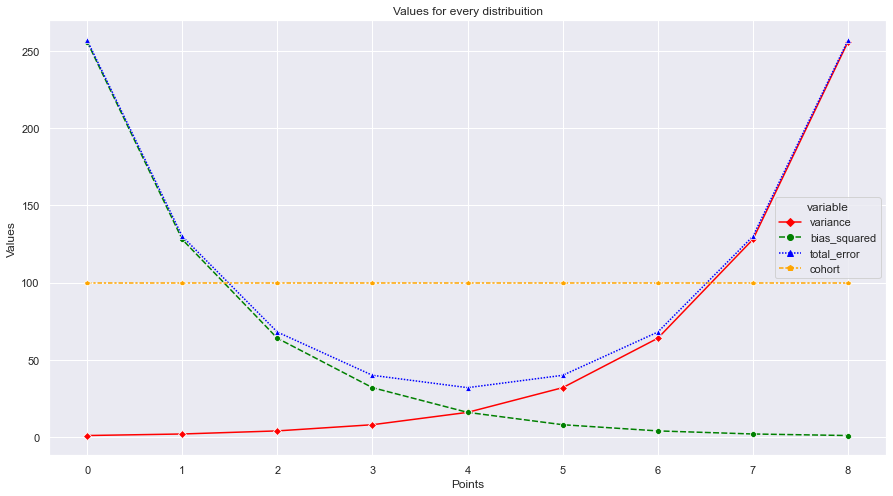

In [96]:
# Desenha o gráfico de linhas com todas as 
# variáveis do DataFrame
ax = sns.lineplot(
    data=df,
    x = 'xs',
    y = 'value',
    hue = 'variable',
    palette=['red', 'green', 'blue', 'orange'], 
    markers=['D', 'o', '^', 'p'],
    style='variable'
)

# Altera o Título do gráfico, o nome do eixo X e Y
ax = ax.set(title='Values for every distribuition', xlabel='Points', ylabel='Values')

## Gráfico de Dispersão

Gráficos de Disperção são muito uteis quando desejamos verificar a relação entre duas variáveis. Para exemplificar, vamos observar a criação do gráfico abaixo:

In [107]:
df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'count_friends': [70, 65, 72, 63, 70, 64, 60, 60, 67],
    'minutes': [175, 170, 205, 120, 220, 130, 105, 145, 190],
    'names': ['Pedro', 'Rui', 'Edu', 'Rosa', 'Ana', 'Carol', 'Luiz', 'Igor', 'Caio']
})

df

,id,count_friends,minutes,names
0,1,70,175,Pedro
1,2,65,170,Rui
2,3,72,205,Edu
3,4,63,120,Rosa
4,5,70,220,Ana
5,6,64,130,Carol
6,7,60,105,Luiz
7,8,60,145,Igor
8,9,67,190,Caio


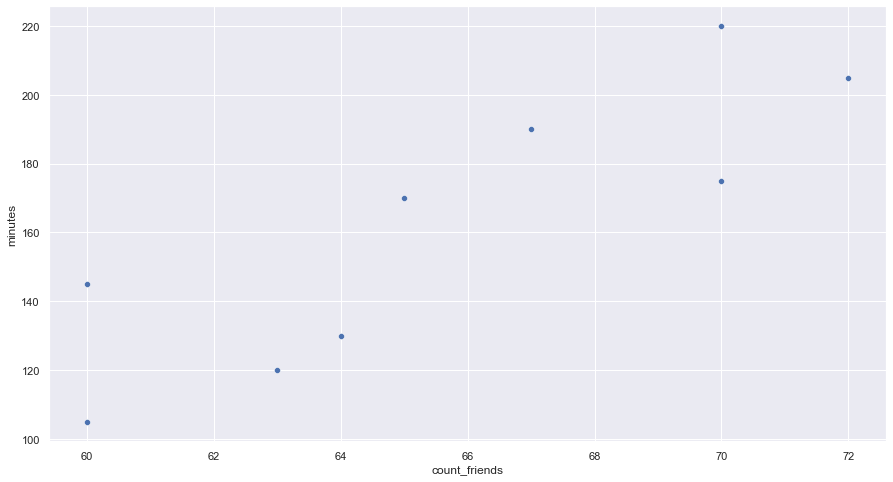

In [108]:
sns.scatterplot(
    data=df,
    x='count_friends',
    y='minutes',
);

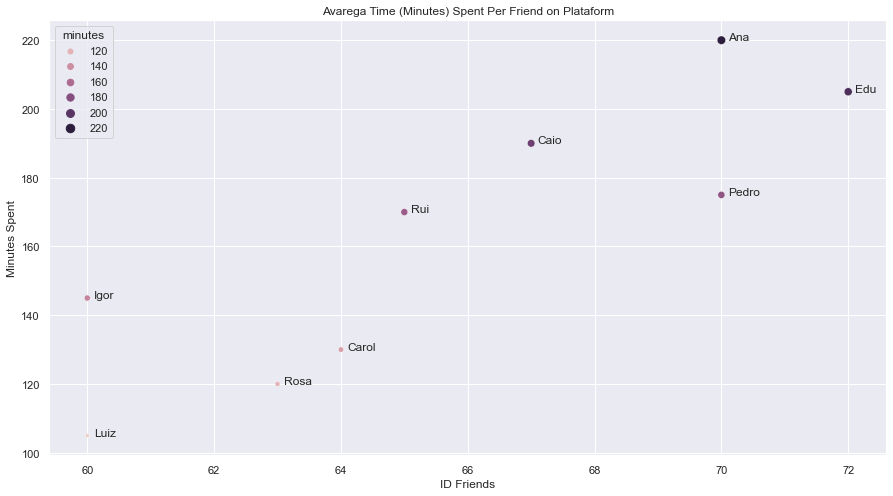

In [110]:
ax = sns.scatterplot(data = df, x = 'count_friends', y = 'minutes', hue='minutes', size='minutes')

for index, line in df.iterrows():
    ax.text(
        x = line['count_friends']+0.1, # Ajusta a posição do que será escrito no texto no eixo X
        y = line['minutes']-0.1, # Ajusta a posição do que será escrito no texto no eixo Y
        s = line['names'], # O que será escrito nos pontos XY
    )
    
ax = ax.set(
    title='Avarega Time (Minutes) Spent Per Friend on Plataform',
    xlabel='ID Friends',
    ylabel='Minutes Spent',
)

Um cuidado que temos que ter ao utilizar o Gráfico de disperção é no momento de configurar a escala dos eixos X e Y. Devemos sempre fazer com que os eixos sejam compatíveis ou possuam a mesma escala, porque se não fizermos isso, iremos distorcer o gráfico e seus pontos.

Para exemplificar, observe os gráficos abaixo:

In [104]:
df = pd.DataFrame({
    'students': ['Pedro', 'Rui', 'Edu', 'Rosa', 'Ana'],
    'course_1_grades': [99, 90, 85, 97, 80],
    'course_2_grades': [100, 85, 60, 90, 70],
})

df

,students,course_1_grades,course_2_grades
0,Pedro,99,100
1,Rui,90,85
2,Edu,85,60
3,Rosa,97,90
4,Ana,80,70


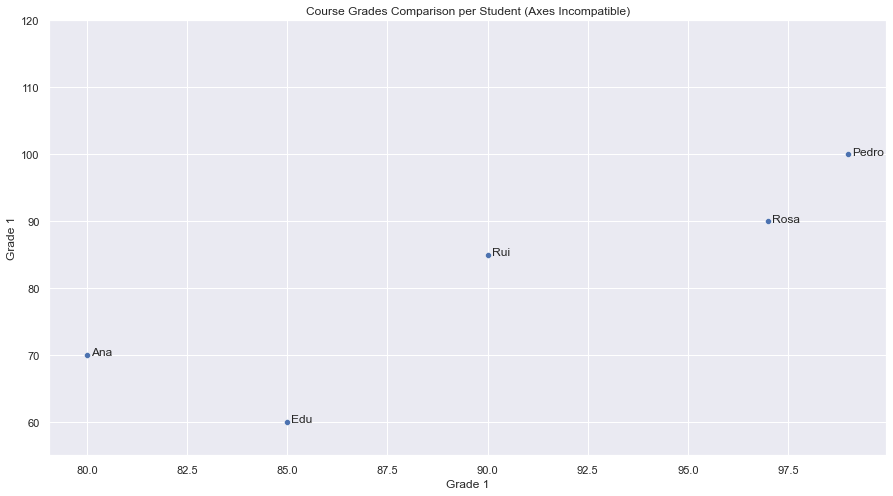

In [105]:
ax = sns.scatterplot(data = df, x = 'course_1_grades', y = 'course_2_grades')

for index, line in df.iterrows():
    ax.text(
        x = line['course_1_grades']+0.1, 
        y = line['course_2_grades']-0.1, 
        s = line['students'], 
    )
    
ax = ax.set(
    title='Course Grades Comparison per Student (Axes Incompatible)',
    xlabel='Grade 1',
    ylabel='Grade 1',
    ylim=(55, 120), # Ajustando escala do eixo y
)

Observe como os pontos estão espalhados, dando a senção de que há uma grande disperção entre os alunos. Porém, se ajustarmos a escala dos eixos, temos o seguinte gráfico:

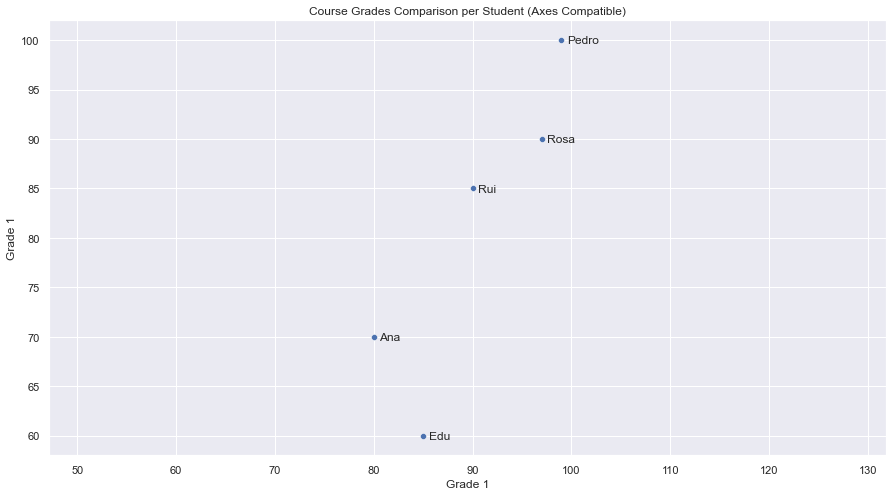

In [106]:
ax = sns.scatterplot(data = df, x = 'course_1_grades', y = 'course_2_grades')

for index, line in df.iterrows():
    ax.text(
        x = line['course_1_grades']+0.55, 
        y = line['course_2_grades']-0.35, 
        s = line['students'],
    )
    
ax = ax.set(
    title='Course Grades Comparison per Student (Axes Compatible)',
    xlabel='Grade 1',
    ylabel='Grade 1',
)

# Ajuste dos eixos do gráfico de disperção
plt.axis('equal');

Observe que agora, com os eixos na mesma escala, temos uma disperção muito menor das notas. Pois as notas varia, no eixo X, somente dos entre os valores 80 e 99, e no eixo Y, entre 60 e 100, fazendo com que a disperção entre elas fiquem mais uniformes, conforme gráfico abaixo:

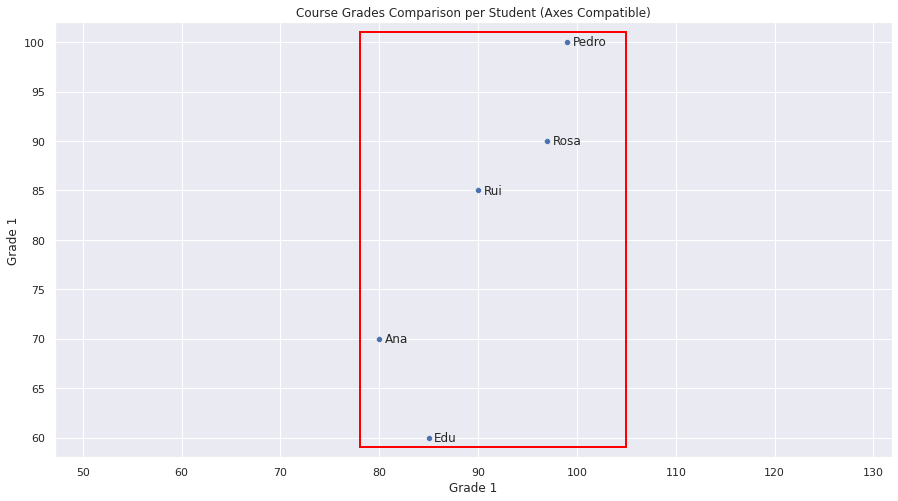

In [170]:
ax = sns.scatterplot(data = df, x = 'course_1_grades', y = 'course_2_grades')

for index, line in df.iterrows():
    ax.text(
        x = line['course_1_grades']+0.55, 
        y = line['course_2_grades']-0.35, 
        s = line['students'],
    )
    
ax = ax.set(
    title='Course Grades Comparison per Student (Axes Compatible)',
    xlabel='Grade 1',
    ylabel='Grade 1',
)

# Ajuste dos eixos do gráfico de disperção
plt.axis('equal');

# Snippet para desenhar o retângulo dentro do 
# Gráfico de Disperção
import matplotlib.patches as mpatches

# Define o ponto inicial -> left e bottom
# e a altura e comprimento das linhas -> hight width
# left = pointo inicial do Eixo X
# bottom = ponto inicial do Eixo Y
# hight = Quantidade que deve ser acrescido ao ponto inicial do Eixo Y (Ponto final - Ponto inicial) 
# width = Quantidade que deve ser acrescido ao ponto inicial do Eixo X (Ponto final - Ponto inicial) 
left, bottom, width, height = (78, 59, 27, 42)

# Define o objeto que será desenhado
rect = mpatches.Rectangle(
    (left,bottom), # Pontos XY iniciais
    width, # Comprimento
    height, # Altura
    fill=False, # Preenchimento do Retângulo
    color="red", # Cor da linha
    linewidth=2 # largura da linha
)

# Insere o objeto (Retângulo) no gráfico
plt.gca().add_patch(rect);

Portanto, sabe manter os eixos na mesma escala quando trabalhamos com o gráfico de disperção é extremamente importante para que passemos a informação de forma correta.

## Gráfico Boxplot

Boxplot ou Diagrama de Caixas são gráficos que utilizamos para verificarmos e compararmos, de maneira simplificada, as distribuições de uma variável numérica agrupada em quartis. Por exemplo, podemos utilizar o Boxplot para uma única variável:

In [171]:
# Carrega o dataset
df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


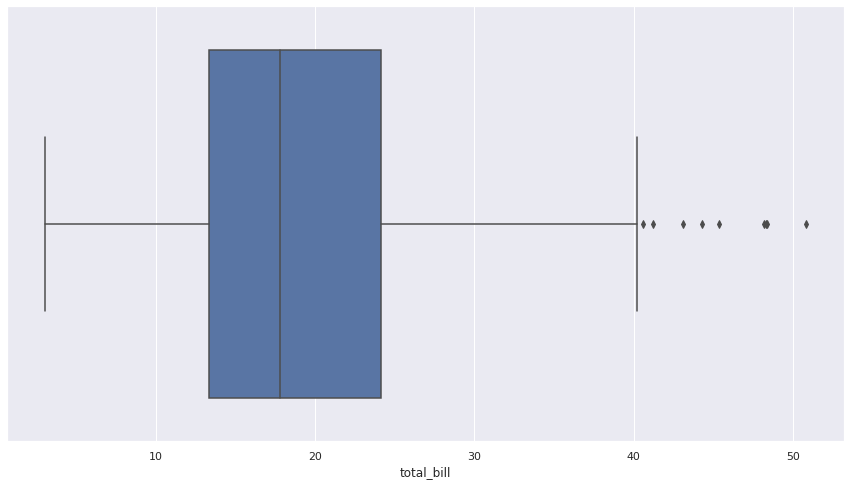

In [172]:
ax = sns.boxplot(x=df["total_bill"])

Ou podemos agrupar as distribuiçõs conforme uma determinada categoria:

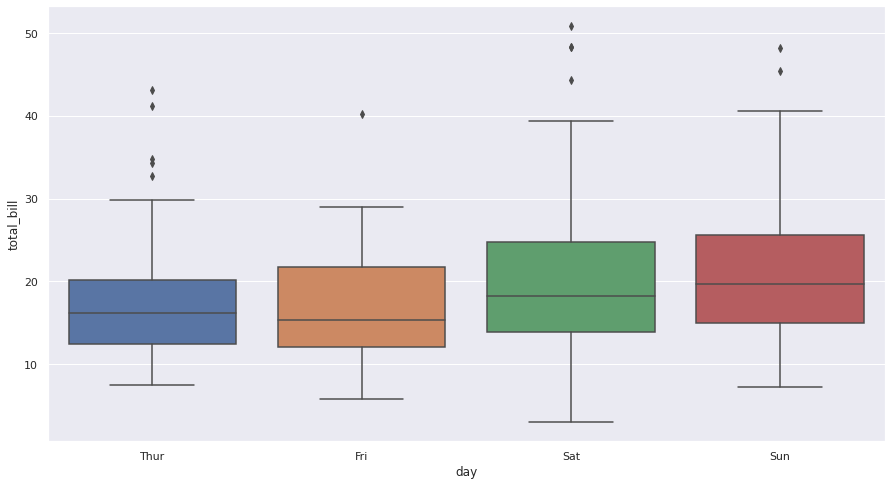

In [173]:
ax = sns.boxplot(x="day", y="total_bill", data=df)

Porém, saber plotar um Boxplot não é o suficiente. Diferente dos outros gráficos, o Boxplot não é um gráfico de interpretação simples.

Como mencionando inicialmente, o Boxplot é divido em quartis, ou seja, todos os dados são ordenados e depois é feita a distribuição desses dados. Observe a seguinte imagem:

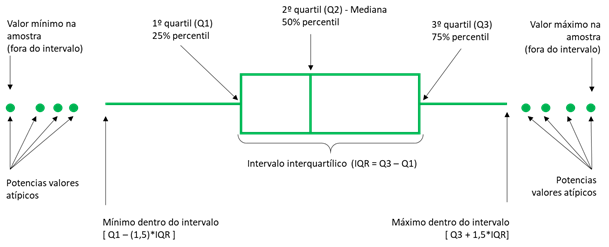

In [174]:
Image('img/boxplot.png')

Se formos observar a imagem acima e utilizá-la como guia para estudar o Boxplot abaixo:

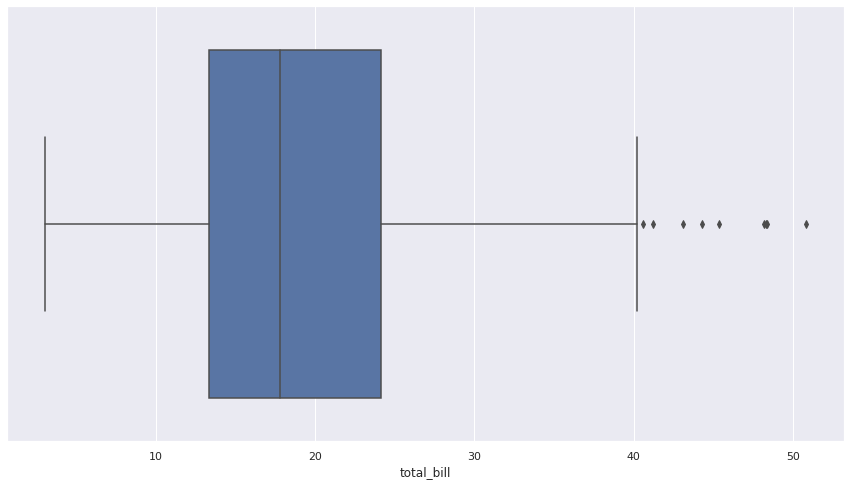

In [175]:
ax = sns.boxplot(x=df["total_bill"])

Podemos entender os seguintes pontos:
* A mediana está próxima do valor 20
* O valor máximo, dentro do intervalo, é 40
* Os valores acima do valor máximo podem ser considerados *outliers*, embora seja necessária um estudo mais minucioso para verificar se esses dados realmente são *outliers*, 
* O valor mínimo dentro do intervalo está próximo a zero. 
* A maior quantidade de dados está acima da mediana.

Essas informações tem muito valor em uma análise inicial da distribuição de variáveis.

Fora isso, conseguimos utilizar o Boxplot para verificar como variáveis categóricas se comportam, em relação à quantidade de dados de cada categoria:

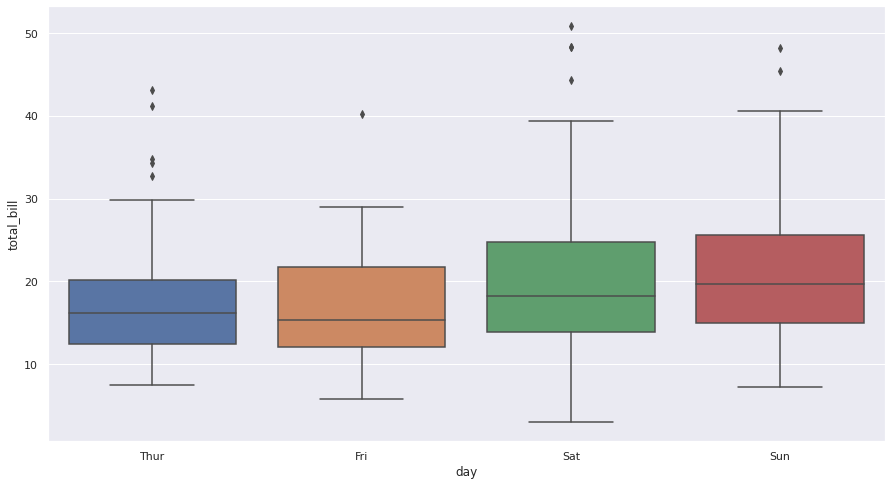

In [176]:
ax = sns.boxplot(x="day", y="total_bill", data=df)

Como podemos observar no gráfico acima:
* A categoria de dias (*days*), possui mais dados no dia de sábado (*sat*) e domingo (*Sun*).
* Os dias de quinta-feira (*Thur*) é o dia que, possivelmente, existem mais outliers
* O dia de sexta-feira (*Fri*) é possivelmente temos menos dados.
* O dia de sábado (*Sat*) é o dia em que há um maior extremos de valores gastos

Além disso, podemos utilizar o gráfico de Boxplot para analisarmos mais de uma categoria ao mesmo tempo

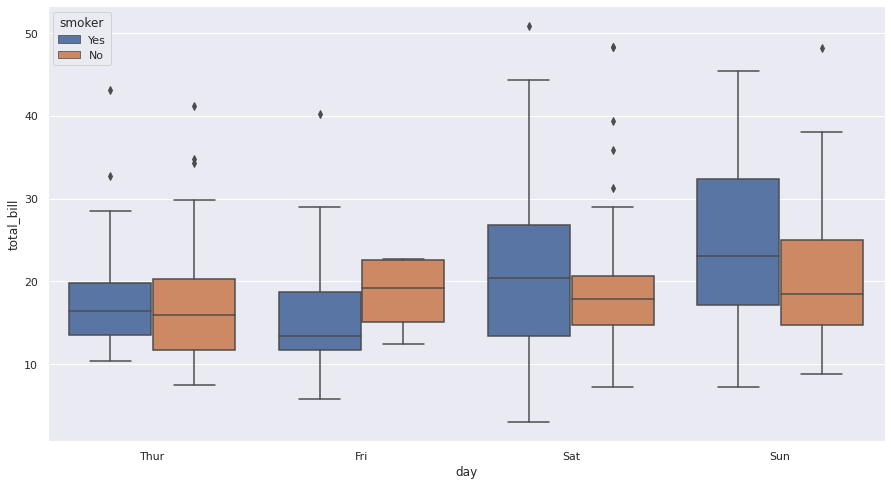

In [177]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=df)

O gráfico acima analisa a distribuição do valor total da conta, separado por dia e também por usuários fumantes e não fumantes.

Ou seja, com esse gráfico, é possível ter uma análise incial sobre:
* Qual dia da semana temos mais fumantes do que não fumantes
* Qual dia da semana os fumantes gastam mais que os não fumantes

Portanto, podemos utilizar esse tipo de gráfico para analisarmos variáveis categórias de uma maneira mais simplificada!

## Exercícios

### 1. Utilizando o Dataset com os dados dos Super Horóis, faça os seguintes gráficos:

In [41]:
# Leitura do arquivo
df = pd.read_csv('csv/heroes.csv')
df.sample(10)

,id,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
184,184,Colossus,Male,silver,Mutant,Black,226.0,Marvel Comics,-,good,225.0
557,557,Rey,Female,hazel,Human,Brown,297.0,George Lucas,-,good,-99.0
54,54,Atom IV,Male,brown,-,Black,-99.0,DC Comics,-,good,72.0
512,512,Penance I,Female,-,-,-,-99.0,Marvel Comics,-,good,-99.0
317,317,Hawkwoman II,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
289,289,Goliath,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
145,145,Callisto,Female,blue,-,Black,175.0,Marvel Comics,-,bad,74.0
358,358,Jesse Quick,Female,-,Human,-,-99.0,DC Comics,-,good,-99.0
160,160,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0
63,63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0


#### 1.1. Gráfico de barras contando a quantidade categorias da coluna `Gender`

##### Resolução

In [150]:
count_gender = df[['id', 'Gender']].groupby('Gender').count().reset_index()
count_gender.loc[ 0, 'Gender'] = 'Undefined'
count_gender = count_gender.sort_values('id', ascending=False)

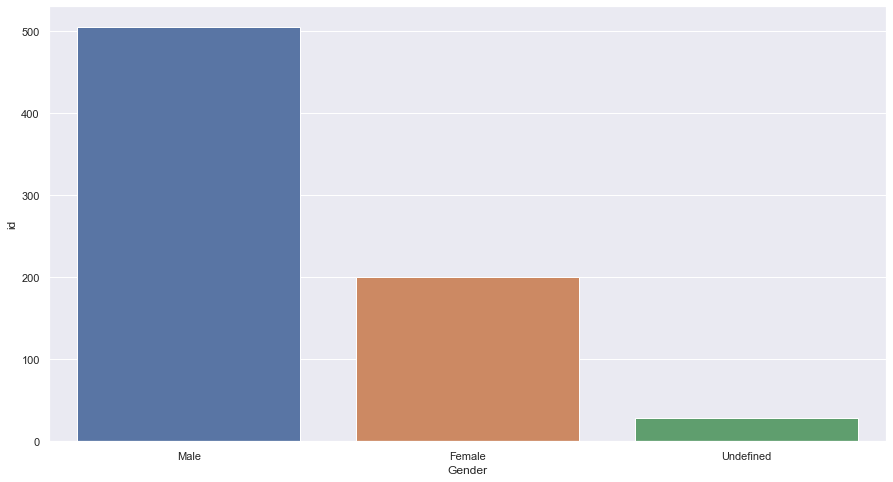

In [151]:
# Definição das informações do Gráfico
ax = sns.barplot(
    data=count_gender,
    x = 'Gender',
    y = 'id' 
    # Configuração para deixar o gráfico ordenado e descrescente
    #order=count_flipper.sort_values('count', ascending=False)['Gender']
)

##### Resposta

In [130]:
# Selecionando e agrupando os dados
df_grouped = df[['id', 'Gender']].groupby('Gender')

# Fazendo a contagem e preparando o DataFrame que será exibido no gráfico
df_grouped = df_grouped.count().sort_values('id', ascending=False).reset_index()

# Alterando o elemento '-' para 'Undefined'
df_grouped.loc[2, 'Gender'] = 'Undefined'

df_grouped.head()

,Gender,id
0,Male,505
1,Female,200
2,Undefined,29


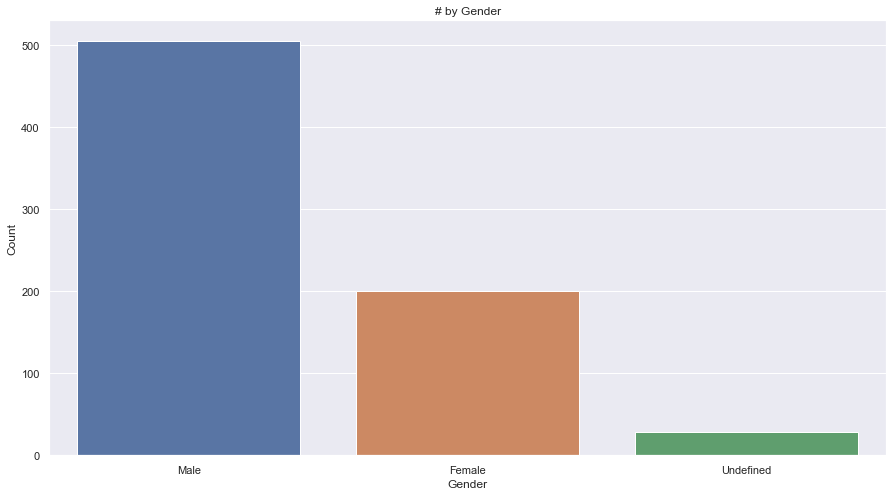

In [131]:
# Desenhando o gráfico
ax = sns.barplot(
    data=df_grouped,
    x='Gender',
    y='id'
)

# Ajustando os textos do gráfico
ax.set(
    xlabel='Gender',
    ylabel='Count',
    title='# by Gender'
);

#### 1.2. Diagrama de Caixas para verificar a distribuição da coluna `Gender`

##### Resolução

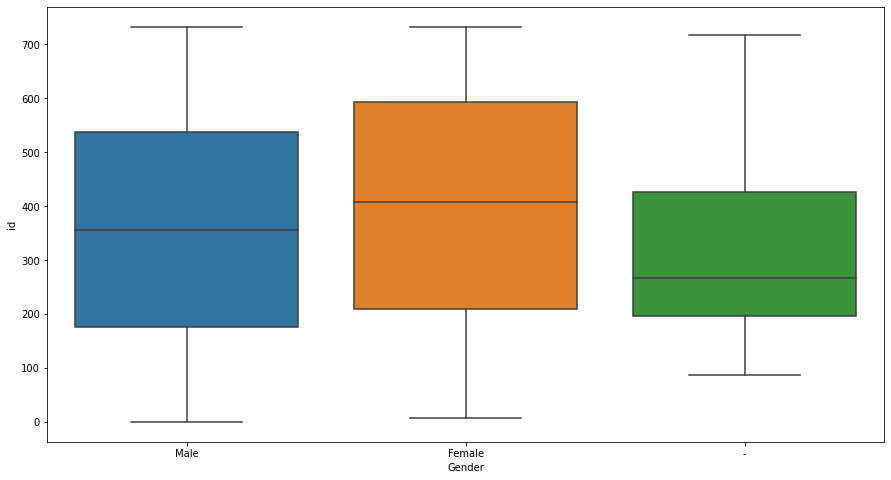

In [12]:
#df['id']

ax = sns.boxplot(data=df, x='Gender', y='id')

##### Resposta

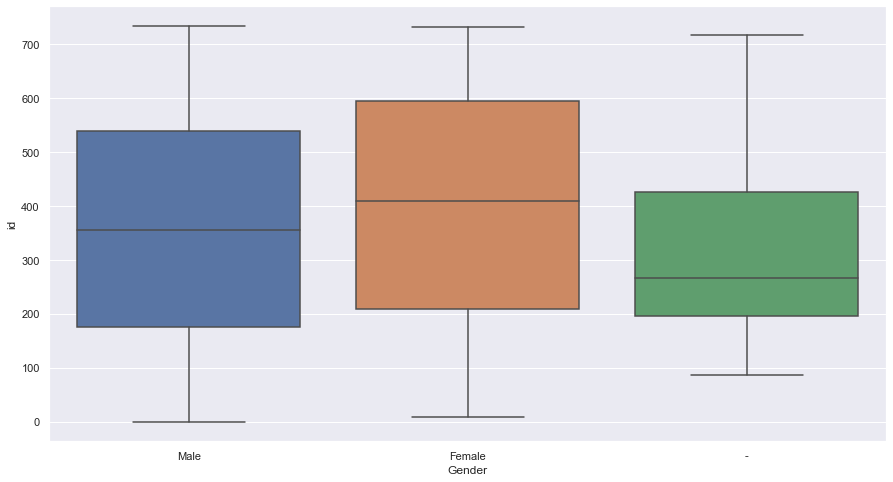

In [112]:
ax = sns.boxplot(
    data=df,
    x='Gender',
    y='id'
)

#### 1.3. Diagrama de Caixas para verificar a distribuição da coluna `Gender` e também a coluna `Alignment`, ao mesmo tempo

##### Resolução

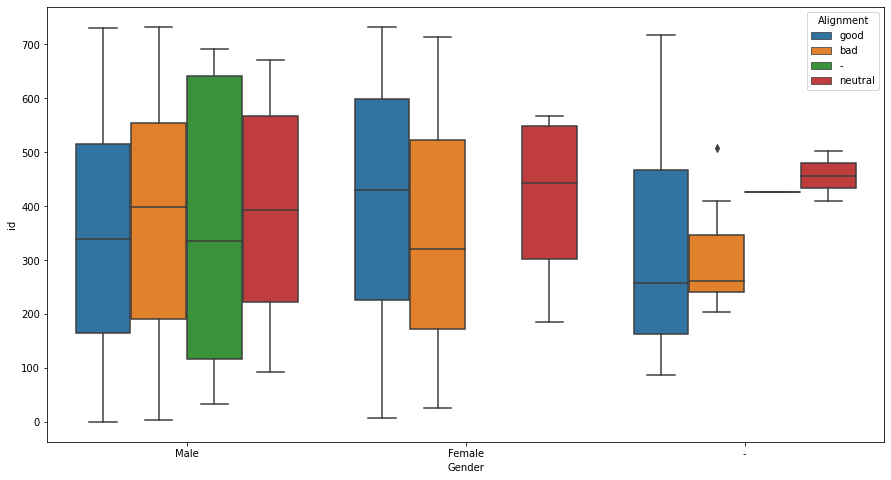

In [15]:
ax = sns.boxplot(
    data=df,
    x='Gender',
    y='id',
    hue='Alignment'
)

##### Resposta

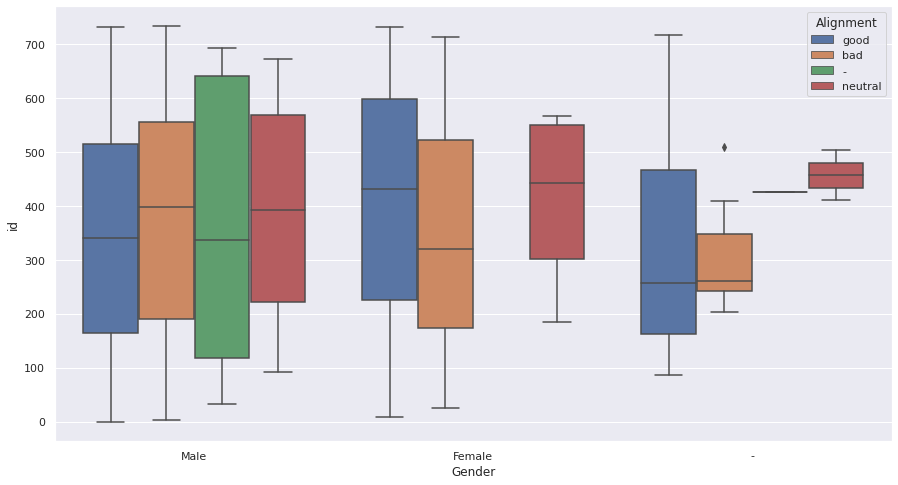

In [197]:
ax = sns.boxplot(
    data=df,
    x='Gender',
    y='id',
    hue='Alignment'
)

#### 1.4. Diagrama de Caixas para verificar a distribuição da coluna `Publisher` e também a coluna `Alignment`, ao mesmo tempo

##### Resolução

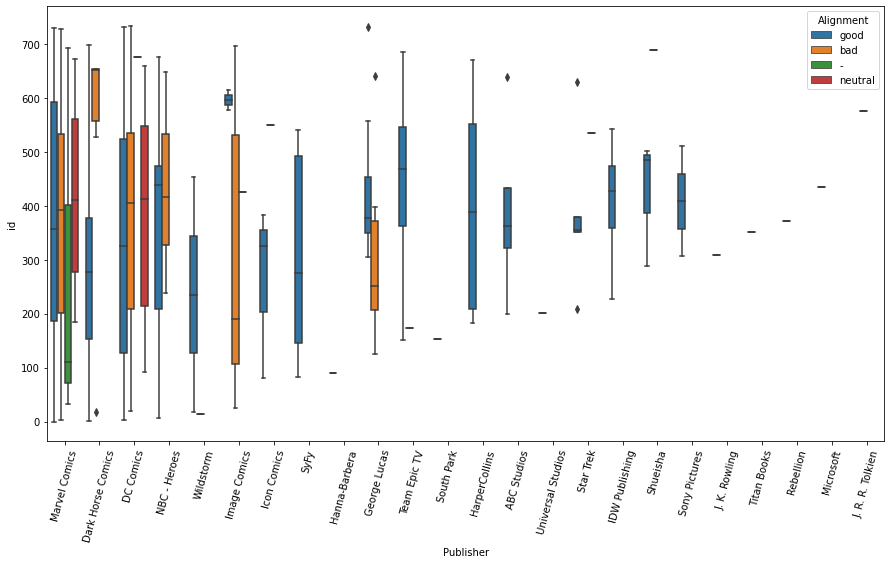

In [17]:
ax = sns.boxplot(
    data=df,
    x='Publisher',
    y='id',
    hue='Alignment'
)
plt.xticks(rotation=75);

##### Resposta

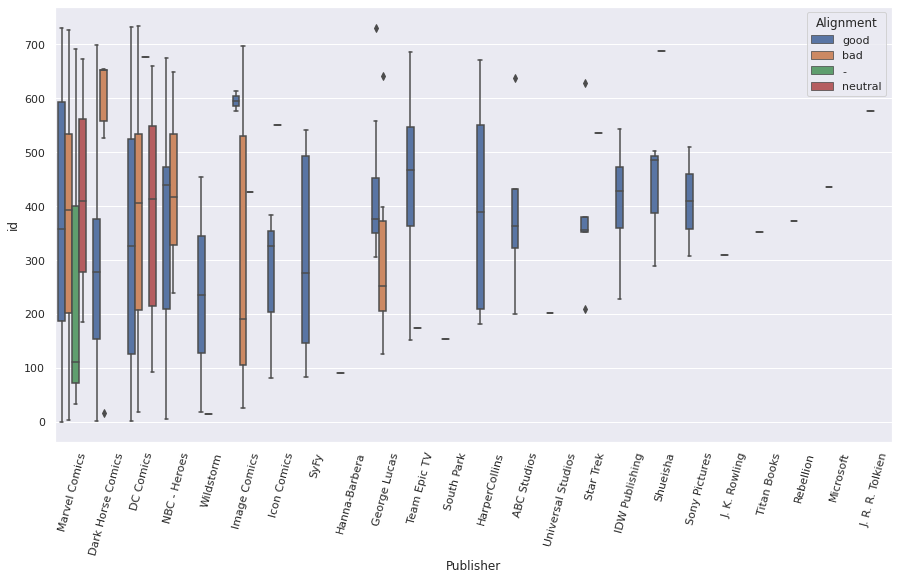

In [198]:
ax = sns.boxplot(
    data=df,
    x='Publisher',
    y='id',
    hue='Alignment'
)

plt.xticks(rotation=75);

#### 1.5. Ajuste os dados negativos das colunas `Weight` e `Height` e crie uma tabela de `Estatística Descritiva` para ambas as colunas

##### Resolução

In [24]:
# Ajustando os valores negativos das colunas

df['Weight'] = df['Weight'].apply(lambda line: line if line >= 0 else (line * -1))
df['Height'] = df['Height'].apply(lambda line: line if line >= 0 else (line * -1))

# Removendo os valores que não são numéricos para criar a tabela estatística

df_numerical = df.select_dtypes(include=['int64', 'float64']).drop('id', axis=1)



In [35]:
# Cria os dados estatísticos a serem demonstrados

df_min      = pd.DataFrame(df_numerical.apply(min)).T
df_max      = pd.DataFrame(df_numerical.apply(max)).T
df_std      = pd.DataFrame(df_numerical.apply(np.std)).T
df_mean     = pd.DataFrame(df_numerical.apply(np.mean)).T
df_median   = pd.DataFrame(df_numerical.apply(np.median)).T
df_skew     = pd.DataFrame(df_numerical.apply(lambda column: column.skew())).T
df_kurtosis = pd.DataFrame(df_numerical.apply(lambda column: column.kurtosis())).T
df_range    = pd.DataFrame(df_numerical.apply(lambda column: column.max() - column.min())).T

# Une os DataFrames com os dados de estatística descritiva
df_desc = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurtosis]).T

# Renomeia as colunas
df_desc.columns = [
    'min',
    'max',
    'range',
    'mean',
    'median',
    'std',
    'skew',
    'kurtosis',
]

# Exibe os dados calculados
df_desc

,min,max,range,mean,median,std,skew,kurtosis
Height,15.2,975.0,959.8,160.790872,175.0,63.801620,5.518588,63.029978
Weight,2.0,900.0,898.0,107.961749,NaN,85.784653,4.847917,31.169962


##### Resposta

In [239]:
# Preenche os dados faltantes para a coluna de Peso e Altura
df['Weight'] = df['Weight'].fillna(0)
df['Height'] = df['Height'].fillna(0)

# Ajustando os dados negativos da coluna 'Wiegtht'
df['Weight'] = df['Weight'].apply(lambda line: line if line >= 0 else (line * -1))

# Ajustando os dados negativos da coluna 'Height'
df['Height'] = df['Height'].apply(lambda line: line if line >= 0 else (line * -1))

# Seleciona somente os tipos num~ericos e remove a coluna 'id'
df_numerical = df.select_dtypes(include=['int64', 'float64']).drop('id', axis=1)

# Mostra as 5 primeiras linhas do DataFrame
df_numerical.head()

,Height,Weight
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,99.0,99.0


In [241]:
# Cria os DataFrames com os dados de estatística descritiva
df_min      = pd.DataFrame(df_numerical.apply(min)).T
df_max      = pd.DataFrame(df_numerical.apply(max)).T
df_std      = pd.DataFrame(df_numerical.apply(np.std)).T
df_mean     = pd.DataFrame(df_numerical.apply(np.mean)).T
df_median   = pd.DataFrame(df_numerical.apply(np.median)).T
df_skew     = pd.DataFrame(df_numerical.apply(lambda column: column.skew())).T
df_kurtosis = pd.DataFrame(df_numerical.apply(lambda column: column.kurtosis())).T
df_range    = pd.DataFrame(df_numerical.apply(lambda column: column.max() - column.min())).T

# Une os DataFrames com os dados de estatística descritiva
df_desc = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurtosis]).T

# Renomeia as colunas
df_desc.columns = [
    'min',
    'max',
    'range',
    'mean',
    'median',
    'std',
    'skew',
    'kurtosis',
]

# Exibe os dados calculados
df_desc

,min,max,range,mean,median,std,skew,kurtosis
Height,15.2,975.0,959.8,160.790872,175.0,63.80162,5.518588,63.029978
Weight,1.0,900.0,899.0,107.670300,99.0,85.84896,4.828749,31.046624


#### 1.6. Faça um gráfico de disperção para verificar a relação entre as colunas `Weight` e `Height`. Faça com que cada ponto no gráfico tenha a sua cor conforme o valor da coluna `Alignment`.

##### Resolução

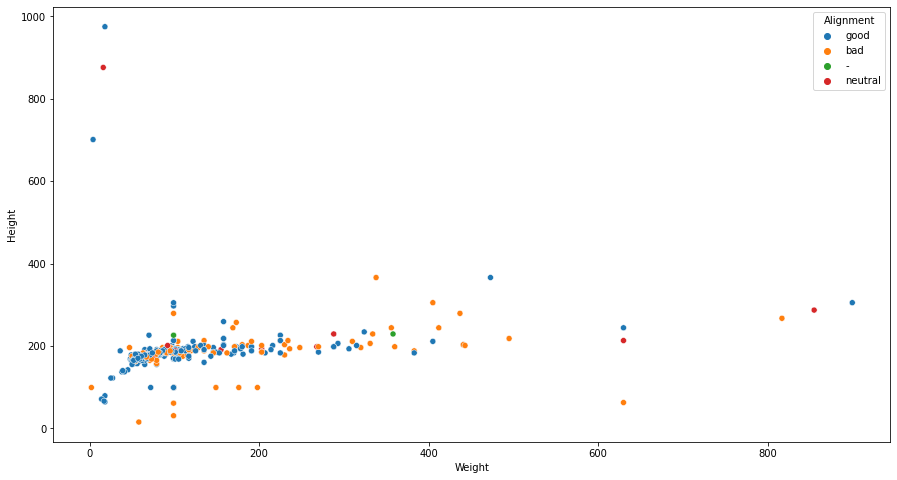

In [36]:
ax = sns.scatterplot(data = df, x = 'Weight', y = 'Height', hue='Alignment')

##### Resposta

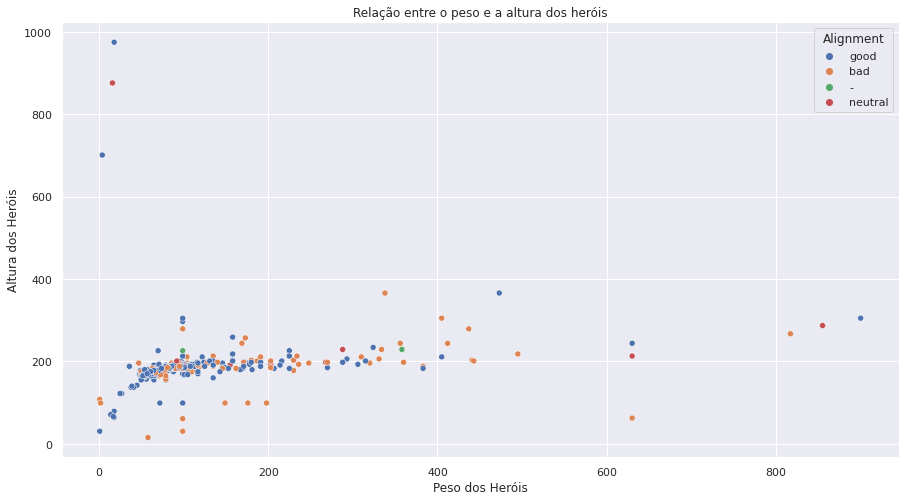

In [253]:
ax = sns.scatterplot(data = df, x = 'Weight', y = 'Height', hue='Alignment')

ax = ax.set(
    title='Relação entre o peso e a altura dos heróis',
    xlabel='Peso dos Heróis',
    ylabel='Altura dos Heróis',
)

#### 1.7. Faça um gráfico de Barras para demonstrar a contagem de cada cor de cabelo cadastrado na coluna `Hair Color`

##### Resolução

In [57]:
count_hair = df[['id', 'Hair color']].groupby('Hair color').count().reset_index()





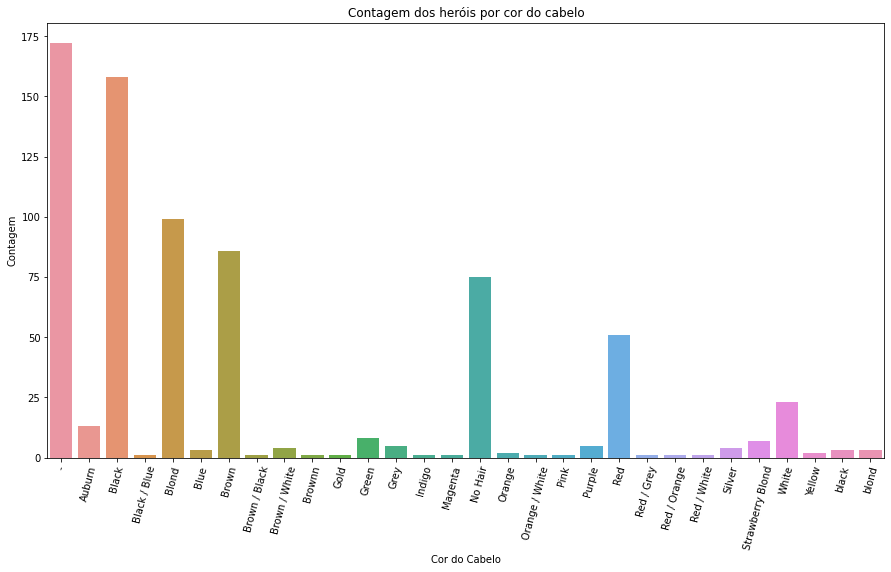

In [65]:
ax = sns.barplot(
    x='Hair color', 
    y='id', 
    data=count_hair
    )
ax.set(
    title='Contagem dos heróis por cor do cabelo',
    xlabel='Cor do Cabelo',
    ylabel='Contagem'
)

plt.xticks(rotation=75);

##### Resposta

In [256]:
df_grouped = df[['id', 'Hair color']].groupby('Hair color')

df_grouped = df_grouped.count().sort_values('id', ascending=False).reset_index()

df_grouped.head()

,Hair color,id
0,-,172
1,Black,158
2,Blond,99
3,Brown,86
4,No Hair,75


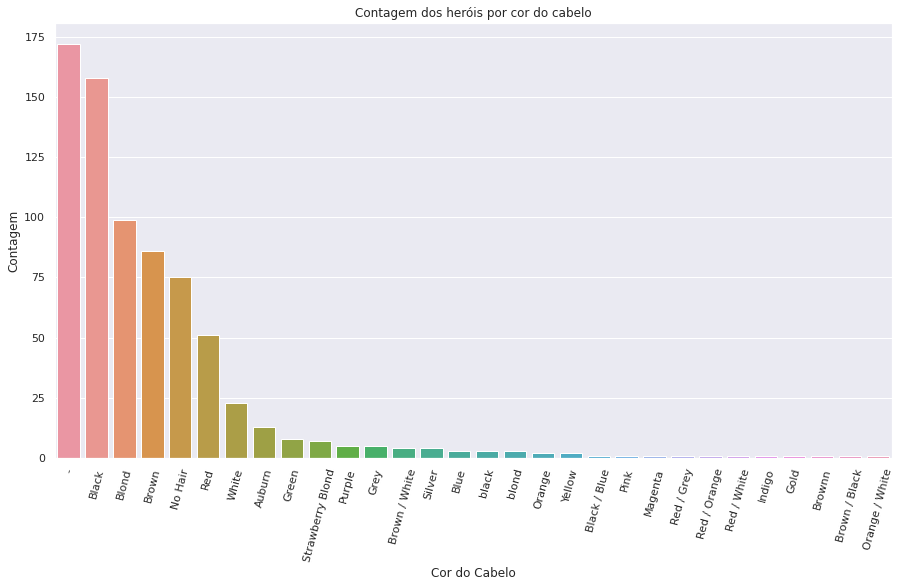

In [259]:
ax = sns.barplot(
    data=df_grouped,
    x='Hair color',
    y='id',
)

ax.set(
    title='Contagem dos heróis por cor do cabelo',
    xlabel='Cor do Cabelo',
    ylabel='Contagem'
)

plt.xticks(rotation=75);

### 2. Utilizando o Dataset com os dados dos jogos das Copas do Mundo, faça os seguintes gráficos:

In [66]:
# Leitura do arquivo
df = pd.read_csv('csv/world_cups.csv')
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


#### 2.1. Faça um gráfico de linhas para demonstrar a evolução do total de gols marcados ao longo das copas.

##### Resolução

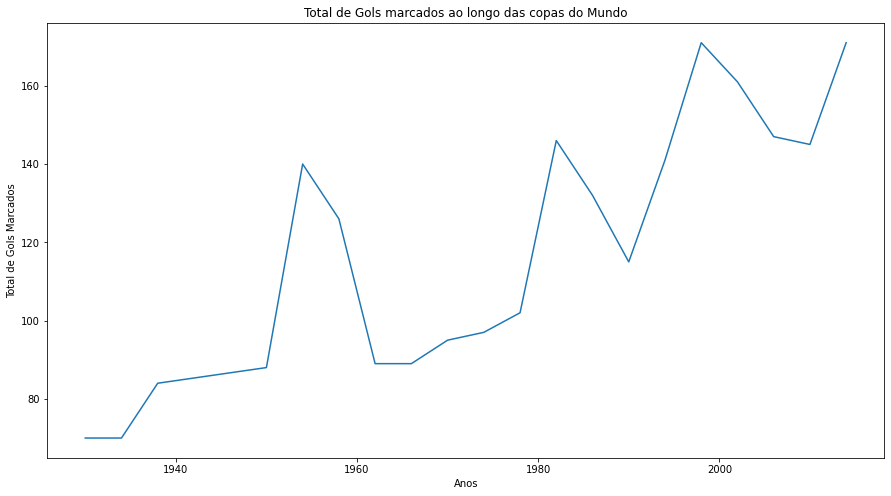

In [73]:
# anos copa X goals Y

goals_year = df[[ 'Year', 'GoalsScored']]

ax = sns.lineplot(data= goals_year, x='Year', y='GoalsScored')

ax.set(
    title='Total de Gols marcados ao longo das copas do Mundo',
    xlabel='Anos',
    ylabel='Total de Gols Marcados'
);

##### Resposta

In [261]:
df_selected = df[['Year', 'GoalsScored']]

df_selected.head()

,Year,GoalsScored
0,1930,70
1,1934,70
2,1938,84
3,1950,88
4,1954,140


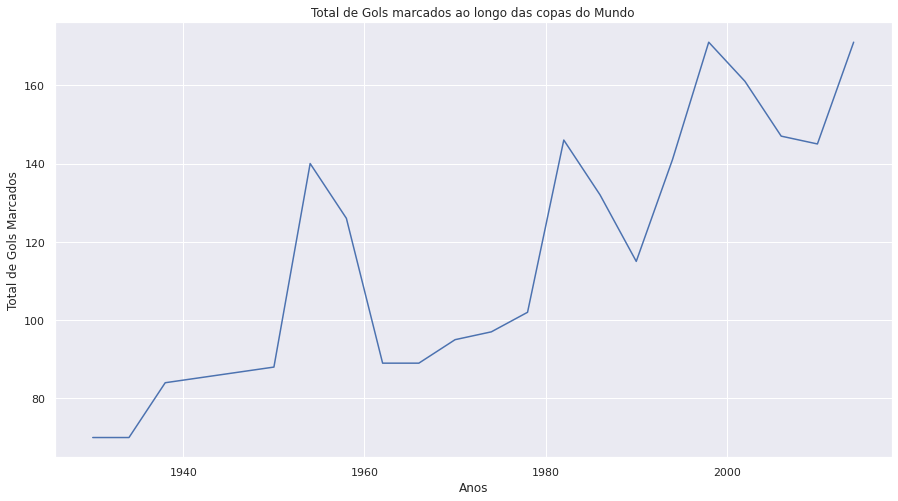

In [271]:
ax = sns.lineplot(
    data=df_selected,
    x='Year',
    y='GoalsScored'
)

ax.set(
    title='Total de Gols marcados ao longo das copas do Mundo',
    xlabel='Anos',
    ylabel='Total de Gols Marcados'
);

#### 2.2. Faça um gráfico de barras para demonstrar os paises com mais títulos, ordenados de forma descrescente

##### Resolução

In [93]:
titles = df[['Winner', 'Year']].groupby('Winner').count().reset_index().sort_values('Year', ascending=False)
titles

,Winner,Year
1,Brazil,5
6,Italy,4
5,Germany FR,3
0,Argentina,2
8,Uruguay,2
2,England,1
3,France,1
4,Germany,1
7,Spain,1


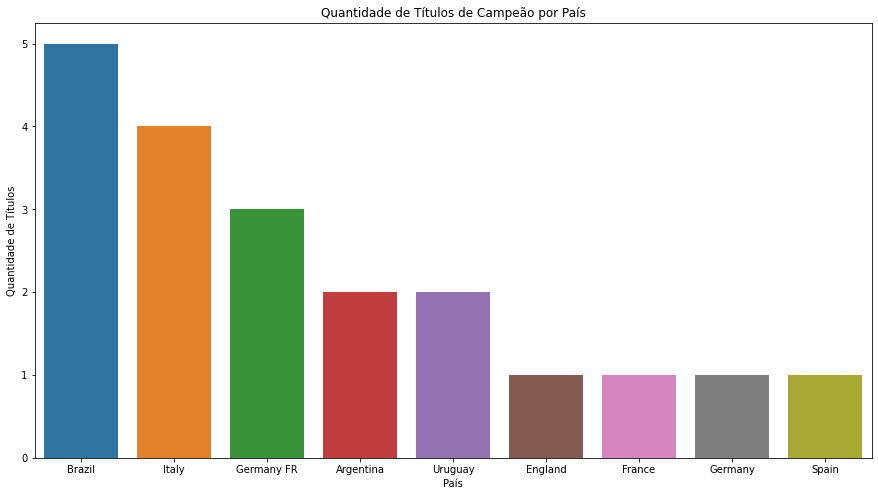

In [95]:
ax = sns.barplot(
    data=titles,
    x = 'Winner',
    y = 'Year') 
    
ax.set(
    title='Quantidade de Títulos de Campeão por País',
    xlabel='País',
    ylabel='Quantidade de Títulos'
);

##### Resposta

In [272]:
df_grouped = df[['Year', 'Winner']].groupby('Winner')

df_grouped = df_grouped.count().sort_values('Year', ascending=False).reset_index()

df_grouped.head()

,Winner,Year
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Argentina,2
4,Uruguay,2


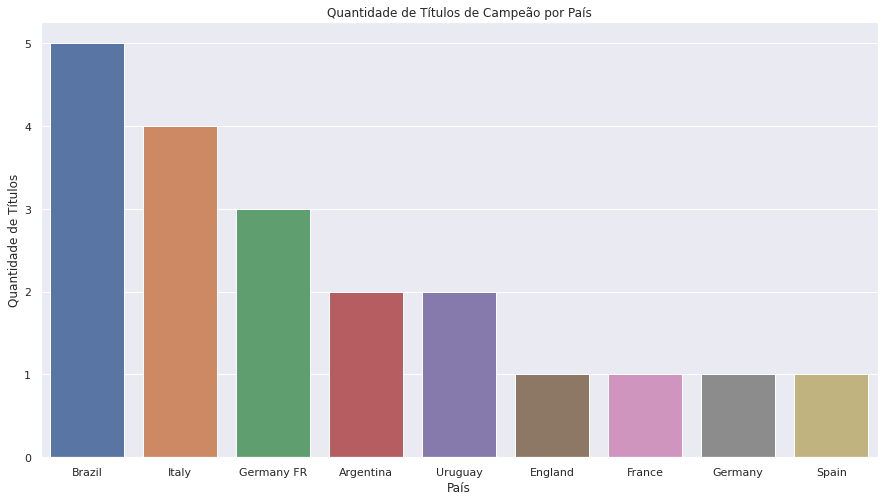

In [273]:
ax = sns.barplot(
    data=df_grouped,
    x='Winner',
    y='Year'
)

ax.set(
    title='Quantidade de Títulos de Campeão por País',
    xlabel='País',
    ylabel='Quantidade de Títulos'
);

#### 2.3. Faça um ajuste na coluna `Attendance` para fazer com que os dados sejam numéricos

##### Resolução

In [99]:
#df['Attendance'] = df['Attendance'].str.replace('.', '').astype(int)
df['Attendance'].head()

0     590549
1     363000
2     375700
3    1045246
4     768607
Name: Attendance, dtype: int64

##### Resposta

In [275]:
df['Attendance'] = df['Attendance'].str.replace('.', '').astype(int)

df.dtypes

/tmp/ipykernel_13614/4106150859.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Attendance'] = df['Attendance'].str.replace('.', '').astype(int)


Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance         int64
dtype: object

#### 2.4. Faça um gráfico de disperção para demonstrar o comportamento das colunas `GoalsScored` e `MatchesPlayed`. Faça com que cada ponto do gráfico tenha o seu tamanho alterado conforme a coluna `GoalsScored`. Coloque também a quantidade de Gols e cada um dos pontos do gráfico.

##### Resolução

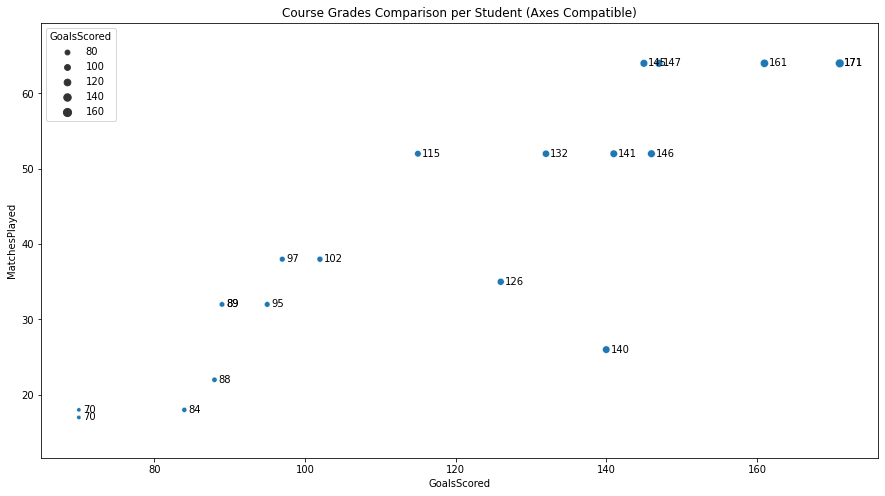

In [102]:
ax = sns.scatterplot(data = df, x = 'GoalsScored', y = 'MatchesPlayed', size='GoalsScored')

for index, line in df.iterrows():
    ax.text(
        x = line['GoalsScored']+0.55, 
        y = line['MatchesPlayed']-0.35, 
        s = line['GoalsScored'],
            )
    
ax = ax.set(
    title='Course Grades Comparison per Student (Axes Compatible)',
    xlabel='GoalsScored',
    ylabel='MatchesPlayed',
)

# Ajuste dos eixos do gráfico de disperção
plt.axis('equal');

##### Resposta

In [307]:
df_selected = df[['GoalsScored', 'MatchesPlayed']]

df_selected.head()

,GoalsScored,MatchesPlayed
0,70,18
1,70,17
2,84,18
3,88,22
4,140,26


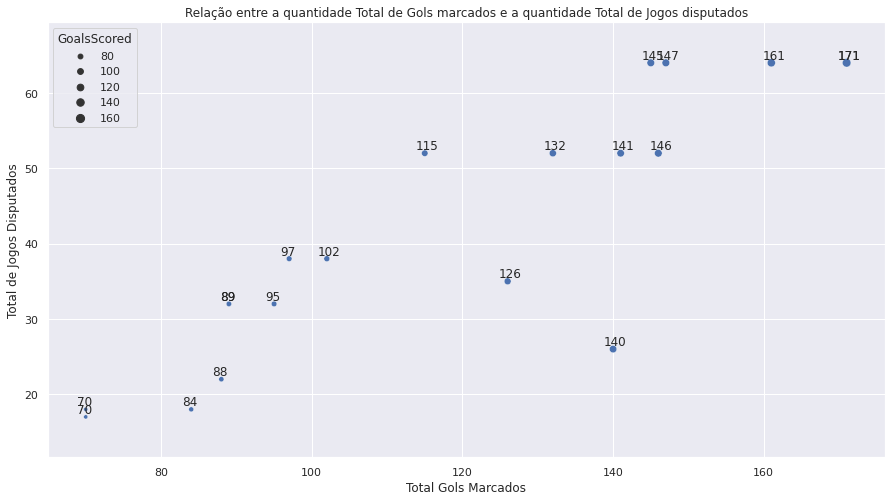

In [308]:
ax = sns.scatterplot(
    data=df_selected,
    x='GoalsScored',
    y='MatchesPlayed',
    size='GoalsScored',
)

for index, line in df.iterrows():
    ax.text(
        x = line['GoalsScored']-1.20, 
        y = line['MatchesPlayed']+0.50, 
        s = line['GoalsScored'],
    )

ax.set(
    title='Relação entre a quantidade Total de Gols marcados e a quantidade Total de Jogos disputados',
    xlabel='Total Gols Marcados',
    ylabel='Total de Jogos Disputados'
)

# Ajuste dos eixos do gráfico de disperção
plt.axis('equal');

#### 2.5. Faça um gráfico de disperção para demonstrar o comportamento das colunas `GoalsScored` e `Attendance`. Faça com que cada ponto do gráfico tenha o seu tamanho alterado conforme a coluna `GoalsScored`. Coloque também a quantidade de Gols e cada um dos pontos do gráfico.

##### Resolução

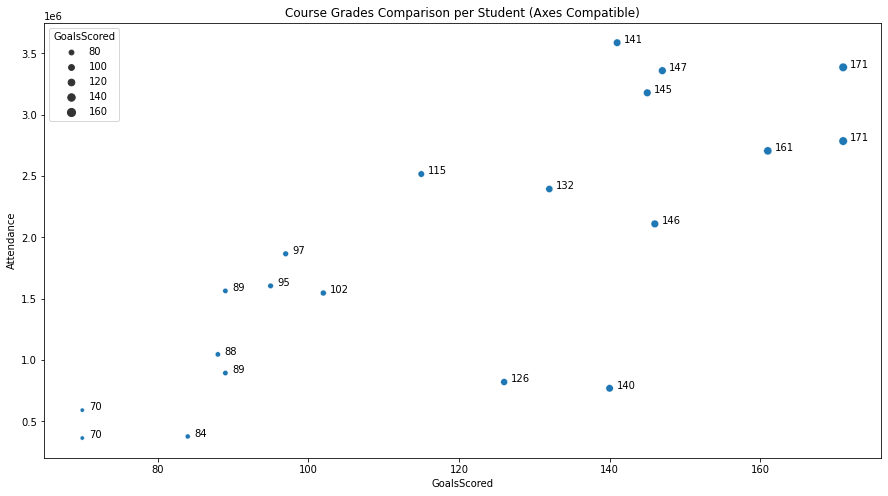

In [112]:
ax = sns.scatterplot(data = df, x = 'GoalsScored', y = 'Attendance', size='GoalsScored')

for index, line in df.iterrows():
    ax.text(
        x = line['GoalsScored']+0.90, 
        y = line['Attendance']-0.50, 
        s = line['GoalsScored'],
            )
    
ax = ax.set(
    title='Course Grades Comparison per Student (Axes Compatible)',
    xlabel='GoalsScored',
    ylabel='Attendance',
)


##### Resposta

In [309]:
df_selected = df[['GoalsScored', 'Attendance']]

df_selected.head()

,GoalsScored,Attendance
0,70,590549
1,70,363000
2,84,375700
3,88,1045246
4,140,768607


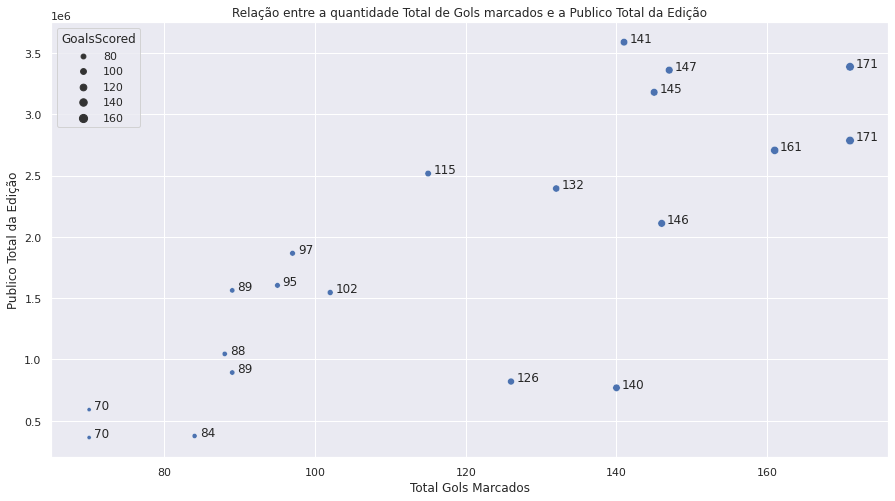

In [313]:
ax = sns.scatterplot(
    data=df_selected,
    x='GoalsScored',
    y='Attendance',
    size='GoalsScored'
)

for index, line in df.iterrows():
    ax.text(
        x = line['GoalsScored']+0.70, 
        y = line['Attendance']-0.50, 
        s = line['GoalsScored'],
    )

ax.set(
    title='Relação entre a quantidade Total de Gols marcados e a Publico Total da Edição',
    xlabel='Total Gols Marcados',
    ylabel='Publico Total da Edição'
);

#### 2.6. Faça um gráfico de linhas para demonstrar a evolução da quantidade de jogos ao longo das copas

##### Resolução

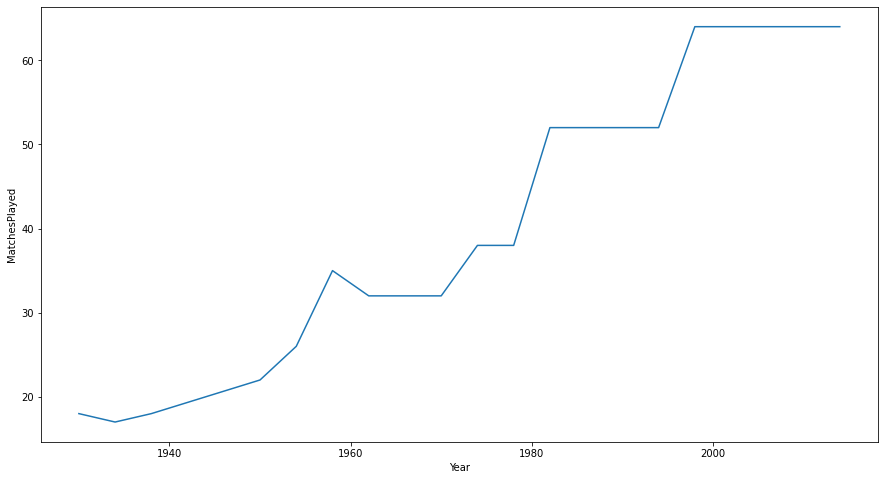

In [115]:
ax = sns.lineplot(
    data=df,
    x='Year',
    y='MatchesPlayed'
)

##### Resposta

In [314]:
df_selected = df[['Year', 'MatchesPlayed']]

df_selected.head()

,Year,MatchesPlayed
0,1930,18
1,1934,17
2,1938,18
3,1950,22
4,1954,26


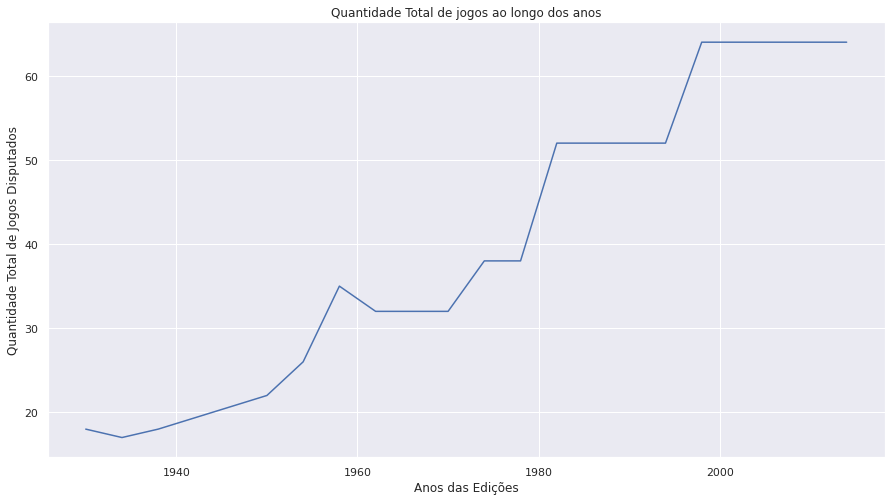

In [317]:
ax = sns.lineplot(
    data=df_selected,
    x='Year',
    y='MatchesPlayed'
)

ax.set(
    title='Quantidade Total de jogos ao longo dos anos',
    xlabel='Anos das Edições',
    ylabel='Quantidade Total de Jogos Disputados'
);

### 3. Utilizando o Dataset com os dados registrados pela Aviação Brasileira, faça os seguintes gráficos:

In [116]:
# Faz a leitura do arquivo .csv
df = pd.read_csv('csv/anv.csv', encoding='UTF-8', delimiter='~')

# Configura para que seja exibido todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

df.head()

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fase_operacao_icao,aeronave_tipo_operacao,aeronave_nivel_dano,total_fatalidades,aeronave_dia_extracao
0,201106142171203,PPGXE,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,LEVE,2.0,1962.0,BRASIL,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,UNKNOWN,VOO DE INSTRUÇÃO,SUBSTANCIAL,0,2018-07-09
1,200804256669287,PPGXE,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,LEVE,2.0,1962.0,BRASIL,BRASIL,PRI,INSTRUÇÃO,****,****,MANOBRA,MANEUVERING,VOO DE INSTRUÇÃO,NENHUM,0,2018-07-09
2,201205209591320,PTRBN,OPERADOR DE AERONAVE,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,LEVE,6.0,1980.0,BRASIL,BRASIL,TPX,TÁXI AÉREO,****,****,APROXIMAÇÃO FINAL,APPROACH,TÁXI AÉREO,NENHUM,0,2018-07-09
3,201012015549851,PTKUK,OPERADOR DE AERONAVE,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,MÉDIA,7.0,1961.0,ESTADOS UNIDOS,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,LANDING,TÁXI AÉREO,LEVE,0,2018-07-09
4,201708190325167,PTKUK,OPERADOR PARTICULAR,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,MÉDIA,7.0,1961.0,ESTADOS UNIDOS,BRASIL,SAE,ESPECIALIZADA,SBCP,SBCP,CRUZEIRO,EN ROUTE,OPERAÇÃO ESPECIALIZADA,LEVE,0,2018-07-09


#### 3.1. Faça um gráfico de barras para demonstar qual categoria de quantidade de motor possui mais registros dentro da base de dados. (Coluna `aeronave_motor_quantidade`)

##### Resolução

In [145]:
motor = df[['codigo_ocorrencia' , 'aeronave_motor_quantidade']].groupby('aeronave_motor_quantidade').count().reset_index().sort_values('codigo_ocorrencia', ascending=False)

motor.loc[0, 'aeronave_motor_quantidade'] = 'INDEFINIDO'

motor

,aeronave_motor_quantidade,codigo_ocorrencia
2,MONOMOTOR,2632
1,BIMOTOR,2389
5,TRIMOTOR,80
4,SEM TRAÇÃO,46
0,INDEFINIDO,27
3,QUADRIMOTOR,14


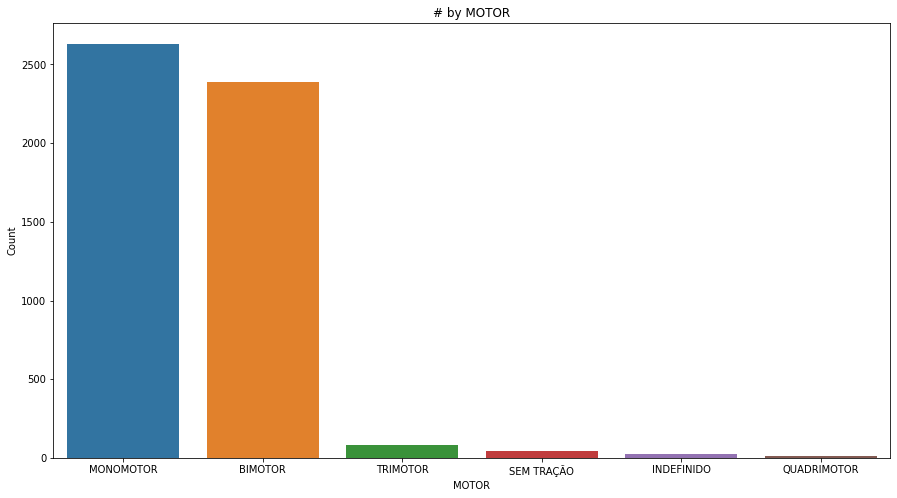

In [146]:
# Desenhando o gráfico
ax = sns.barplot(
    data=motor,
    x='aeronave_motor_quantidade',
    y='codigo_ocorrencia'
)

# Ajustando os textos do gráfico
ax.set(
    xlabel='MOTOR',
    ylabel='Count',
    title='# by MOTOR'
);



##### Resposta

In [320]:
df_grouped = df[['codigo_ocorrencia', 'aeronave_motor_quantidade']].groupby('aeronave_motor_quantidade')

df_grouped = df_grouped.count().sort_values('codigo_ocorrencia', ascending=False).reset_index()

df_grouped.head()

,aeronave_motor_quantidade,codigo_ocorrencia
0,MONOMOTOR,2632
1,BIMOTOR,2389
2,TRIMOTOR,80
3,SEM TRAÇÃO,46
4,***,27


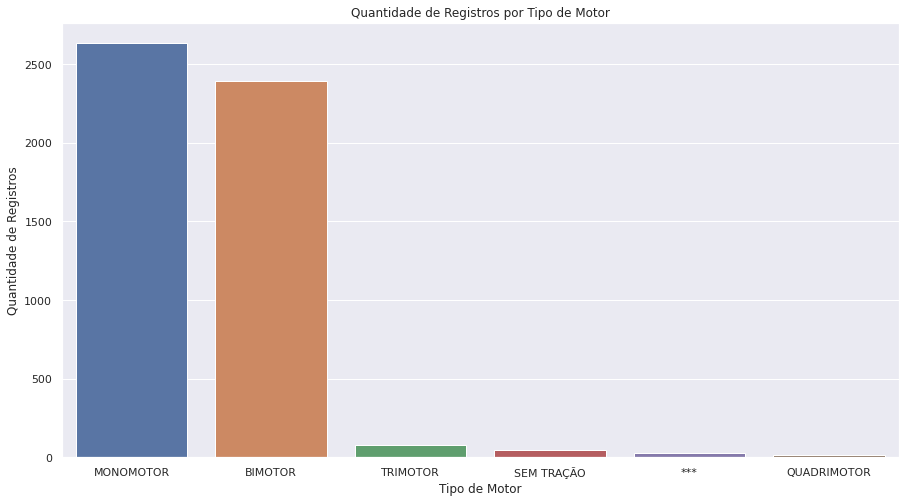

In [323]:
ax = sns.barplot(
    data=df_grouped,
    x='aeronave_motor_quantidade',
    y='codigo_ocorrencia'
)

ax.set(
    title='Quantidade de Registros por Tipo de Motor',
    xlabel='Tipo de Motor',
    ylabel='Quantidade de Registros'
);

#### 3.2. Faça um gráfico de barras para demonstrar qual categoria de tipo de aeronaves possui mais registros dentro da base de dados (coluna `aeronave_tipo_veiculo`)

##### Resolução

In [155]:
cat = df[['codigo_ocorrencia' , 'aeronave_tipo_veiculo']].groupby('aeronave_tipo_veiculo').count().reset_index().sort_values('codigo_ocorrencia', ascending=True)
cat

,aeronave_tipo_veiculo,codigo_ocorrencia
2,BALÃO,1
5,HIDROAVIÃO,1
3,DIRIGÍVEL,2
8,TRIKE,3
0,ANFÍBIO,12
6,INDETERMINADA,16
7,PLANADOR,17
9,ULTRALEVE,264
4,HELICÓPTERO,598
1,AVIÃO,4274


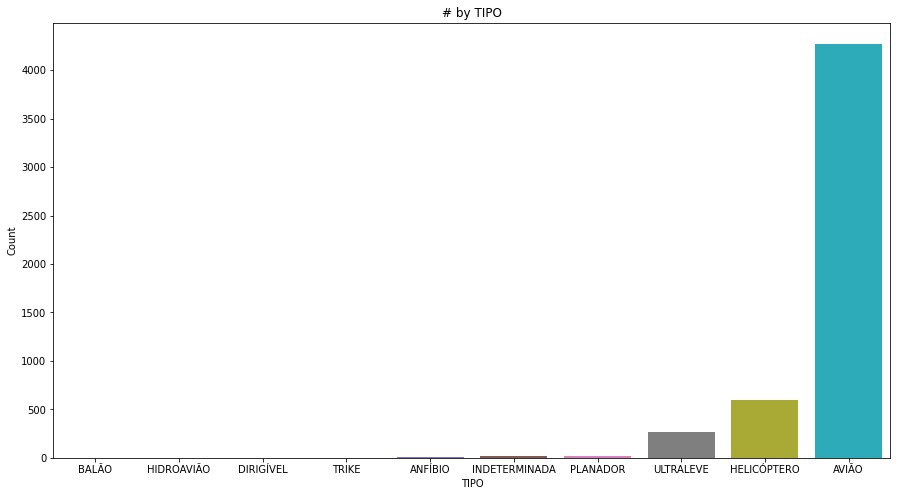

In [151]:
# Desenhando o gráfico
ax = sns.barplot(
    data=cat,
    x='aeronave_tipo_veiculo',
    y='codigo_ocorrencia'
)

# Ajustando os textos do gráfico
ax.set(
    xlabel='TIPO',
    ylabel='Count',
    title='# by TIPO'
);



##### Resposta

In [324]:
df_grouped = df[['codigo_ocorrencia', 'aeronave_tipo_veiculo']].groupby('aeronave_tipo_veiculo')

df_grouped = df_grouped.count().sort_values('codigo_ocorrencia', ascending=False).reset_index()

df_grouped.head()

,aeronave_tipo_veiculo,codigo_ocorrencia
0,AVIÃO,4274
1,HELICÓPTERO,598
2,ULTRALEVE,264
3,PLANADOR,17
4,INDETERMINADA,16


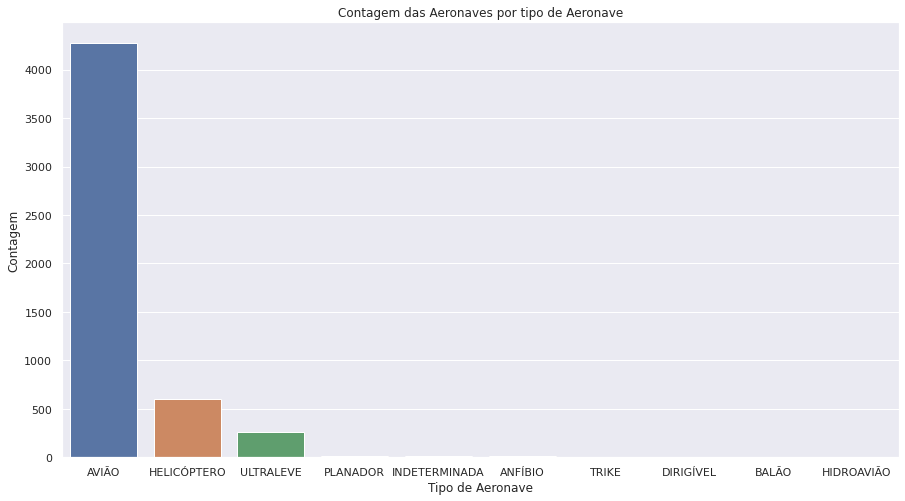

In [326]:
ax = sns.barplot(
    data=df_grouped,
    x='aeronave_tipo_veiculo',
    y='codigo_ocorrencia'
)

ax.set(
    title='Contagem das Aeronaves por tipo de Aeronave',
    xlabel='Tipo de Aeronave',
    ylabel='Contagem'
);

#### 3.3. Faça um gráfico de barras para exibir qual foi o tipo de manobra que mais causou aciedentes dentro da base de dados (Coluna `aeronave_fase_operacao_icao`)

##### Resolução

In [159]:
manobra = df[['codigo_ocorrencia', 'aeronave_fase_operacao_icao']].groupby('aeronave_fase_operacao_icao').count().reset_index()
manobra.loc[0, 'aeronave_fase_operacao_icao'] = 'INDEFINIDO'

manobra1 = manobra.sort_values('codigo_ocorrencia', ascending=False)

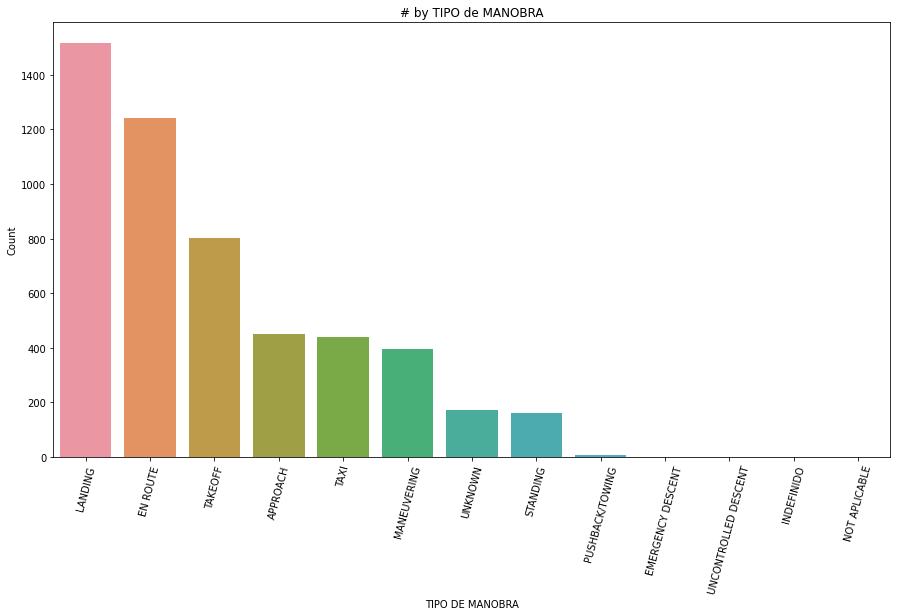

In [161]:
# Desenhando o gráfico
ax = sns.barplot(
    data=manobra1,
    x='aeronave_fase_operacao_icao',
    y='codigo_ocorrencia'
)

# Ajustando os textos do gráfico
ax.set(
    xlabel='TIPO DE MANOBRA',
    ylabel='Count',
    title='# by TIPO de MANOBRA'
)
plt.xticks(rotation=75);


##### Resposta

In [328]:
df_grouped = df[['codigo_ocorrencia', 'aeronave_fase_operacao_icao']].groupby('aeronave_fase_operacao_icao')

df_grouped = df_grouped.count().sort_values('codigo_ocorrencia', ascending=False).reset_index()

df_grouped.head()

,aeronave_fase_operacao_icao,codigo_ocorrencia
0,LANDING,1516
1,EN ROUTE,1242
2,TAKEOFF,803
3,APPROACH,449
4,TAXI,439


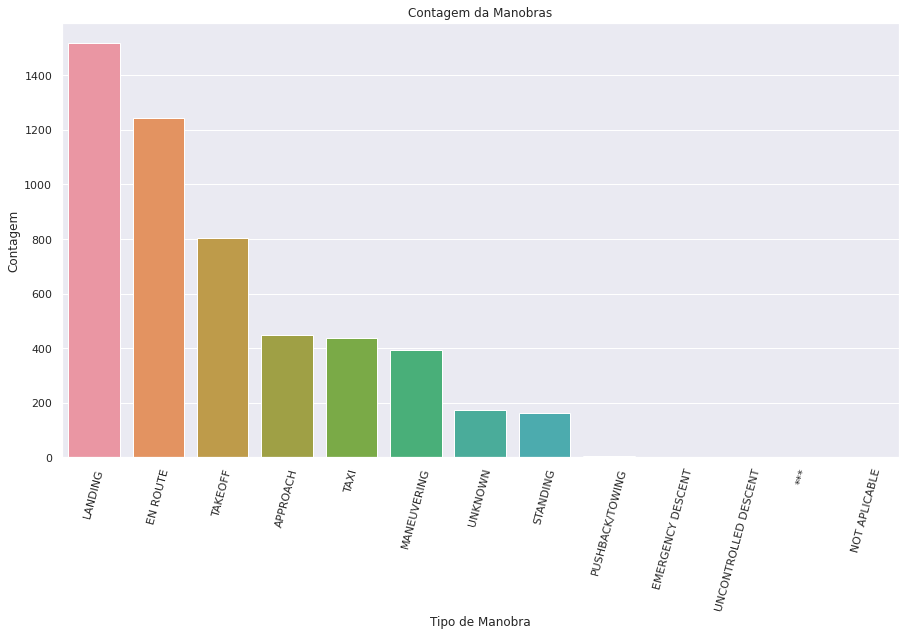

In [331]:
ax = sns.barplot(
    data=df_grouped,
    x='aeronave_fase_operacao_icao',
    y='codigo_ocorrencia'
)

ax.set(
    title='Contagem da Manobras',
    xlabel='Tipo de Manobra',
    ylabel='Contagem'
);

plt.xticks(rotation=75);

#### 3.4. Faça um gráfico de barras para demonstrar qual foi o tipo de dano que mais ocorreu na base de dados (Coluna `aeronave_nivel_dano`)

##### Resolução

In [166]:
dano = df[['codigo_ocorrencia', 'aeronave_nivel_dano']].groupby('aeronave_nivel_dano').count().reset_index().sort_values('codigo_ocorrencia', ascending=True)
dano

,aeronave_nivel_dano,codigo_ocorrencia
1,INDETERMINADO,117
0,DESTRUÍDA,346
2,LEVE,1357
4,SUBSTANCIAL,1478
3,NENHUM,1890


[Text(0.5, 0, 'Tipo de Dano'),
 Text(0, 0.5, 'Ocorrencias'),
 Text(0.5, 1.0, 'Tipo de Dano')]

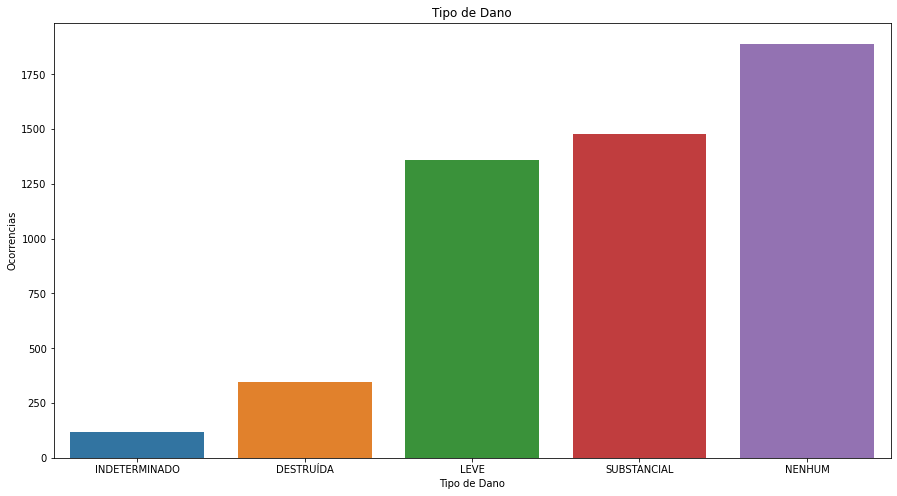

In [168]:
ax = sns.barplot(data=dano, x='aeronave_nivel_dano', y='codigo_ocorrencia')
ax.set(xlabel='Tipo de Dano', ylabel='Ocorrencias', title='Tipo de Dano')

In [ ]:
# Desenhando o gráfico
ax = sns.barplot(
    data=manobra1,
    x='aeronave_fase_operacao_icao',
    y='codigo_ocorrencia'
)

# Ajustando os textos do gráfico
ax.set(
    xlabel='TIPO DE MANOBRA',
    ylabel='Count',
    title='# by TIPO de MANOBRA'
)
plt.xticks(rotation=75);


##### Resposta

In [332]:
df_grouped = df[['codigo_ocorrencia', 'aeronave_nivel_dano']].groupby('aeronave_nivel_dano')

df_grouped = df_grouped.count().sort_values('codigo_ocorrencia', ascending=False).reset_index()

df_grouped.head()

,aeronave_nivel_dano,codigo_ocorrencia
0,NENHUM,1890
1,SUBSTANCIAL,1478
2,LEVE,1357
3,DESTRUÍDA,346
4,INDETERMINADO,117


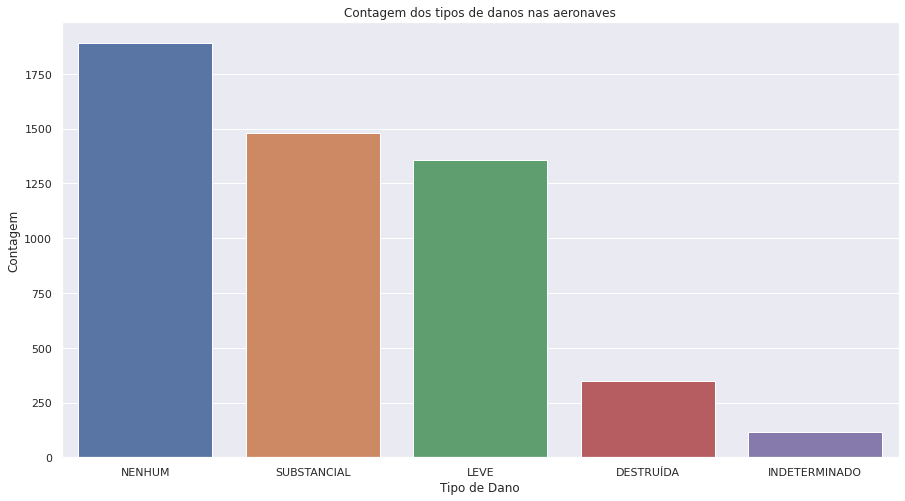

In [333]:
ax = sns.barplot(
    data=df_grouped,
    x='aeronave_nivel_dano',
    y='codigo_ocorrencia'
)

ax.set(
    title='Contagem dos tipos de danos nas aeronaves',
    xlabel='Tipo de Dano',
    ylabel='Contagem',
);

#### 3.5. Faça um gráfico para demonstrar a quantidade de fatalidades agrupando por nível de dano. Ou seja, a eixo X deve conter a quantidade de fatalidades, o eixo X a contagem de registros e o gráfico deverá exibir as categorias de tipo de dano com a contagem de cada fatalidade. Como no exemplo da imgem abaixo:

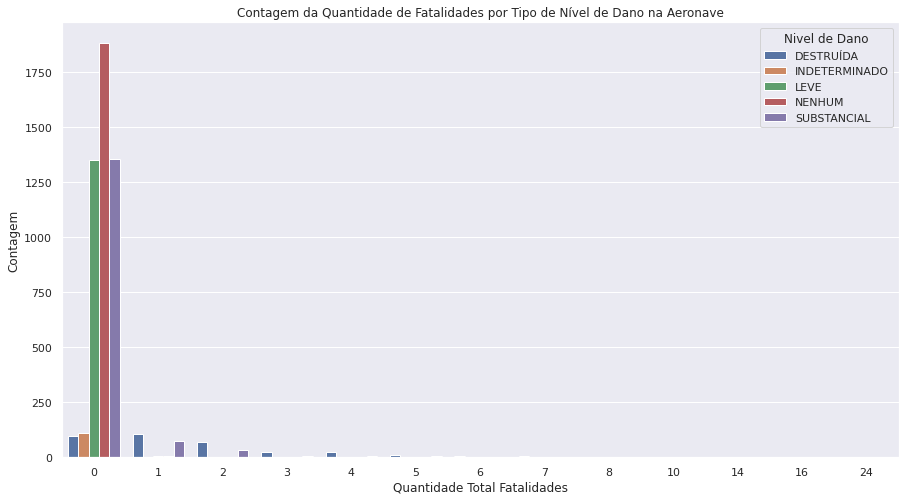

In [ ]:
Image('img/barplot_exe_3_5.png')

##### Resolução

In [185]:
fatal = df[['codigo_ocorrencia', 'total_fatalidades', 'aeronave_nivel_dano']].groupby(['total_fatalidades', 'aeronave_nivel_dano'])
fatal = fatal.count().sort_values(['total_fatalidades', 'aeronave_nivel_dano'], ascending=[True, True]).reset_index()
fatal

,total_fatalidades,aeronave_nivel_dano,codigo_ocorrencia
0,0,DESTRUÍDA,96
1,0,INDETERMINADO,112
2,0,LEVE,1352
3,0,NENHUM,1882
4,0,SUBSTANCIAL,1355
5,1,DESTRUÍDA,107
6,1,INDETERMINADO,2
7,1,LEVE,5
8,1,NENHUM,6
9,1,SUBSTANCIAL,73


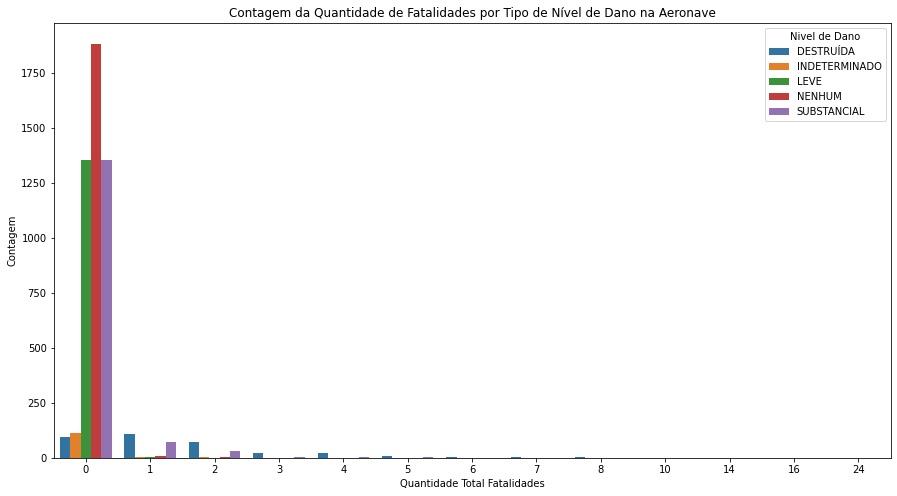

In [187]:
ax = sns.barplot(data=fatal, x='total_fatalidades', y='codigo_ocorrencia', hue='aeronave_nivel_dano')
# Configuração dos textos do gráfico
ax.set(
    xlabel='Quantidade Total Fatalidades',
    ylabel='Contagem',
    title='Contagem da Quantidade de Fatalidades por Tipo de Nível de Dano na Aeronave',
);

# Muda o texto da Legenda e sua localização
plt.legend(title='Nivel de Dano', loc='upper right');


##### Resposta

In [190]:
# Seleção e agrupamento dos Dados
df_grouped = df[['codigo_ocorrencia', 'total_fatalidades', 'aeronave_nivel_dano']].groupby(['total_fatalidades', 'aeronave_nivel_dano'])

df_grouped = df_grouped.count().sort_values(['total_fatalidades', 'aeronave_nivel_dano'], ascending=[True, True]).reset_index()

df_grouped.head()

,total_fatalidades,aeronave_nivel_dano,codigo_ocorrencia
0,0,DESTRUÍDA,96
1,0,INDETERMINADO,112
2,0,LEVE,1352
3,0,NENHUM,1882
4,0,SUBSTANCIAL,1355


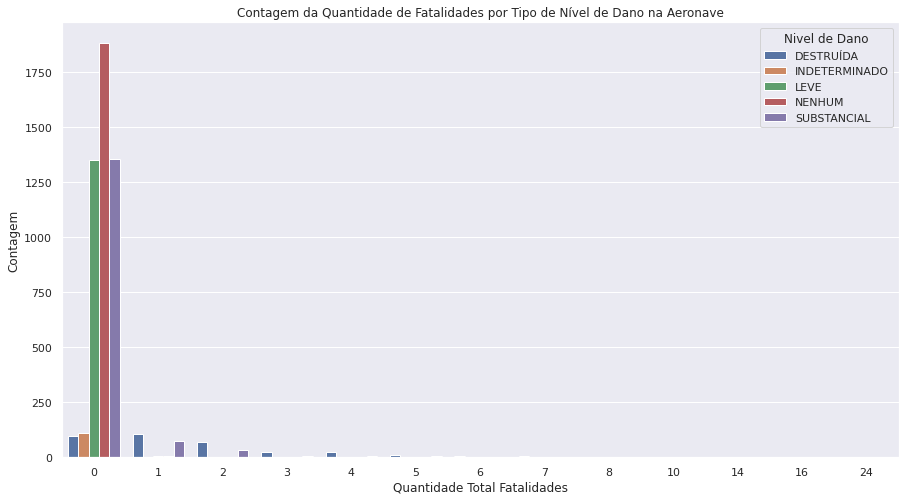

In [191]:
# Criação do Gráfico
ax = sns.barplot(
    data=df_grouped,
    x='total_fatalidades',
    y='codigo_ocorrencia',
    hue='aeronave_nivel_dano',
#     hue={'Tipo de Dano': 'aeronave_nivel_dano'},
)

# Configuração dos textos do gráfico
ax.set(
    xlabel='Quantidade Total Fatalidades',
    ylabel='Contagem',
    title='Contagem da Quantidade de Fatalidades por Tipo de Nível de Dano na Aeronave',
);

# Muda o texto da Legenda e sua localização
plt.legend(title='Nivel de Dano', loc='upper right');

#### 3.6. Decomponha a coluna `codigo_ocorrencia` da seguinte maneira:

* Os quatro primeiro digitos representam o ano
* O quinto e sexto dígito representam o mês
* O sext e o sétimo dígito representam o dia

`200804256669287` => `2008-04-25`

Crie uma nova coluna com essa data chamada `data_acidente`. Utilize essa nova coluna para demonstrar a quantidade de acidentes ao longo dos anos com um gráfico de linhas.

##### Resolução

In [ ]:
# Criando a coluna
df['data_acidente'] = 'teste'

# Percorrendo o DataFrame para decompor a data de cada linha

for index in range(len(df)):
    # Recupera todo o conteudo e converte em texto(str). E seleciona siomente os 8 primeiros digitos
    year = str(df.loc[index, 'codigo_ocorrencia'])[:8]

    # Insere o primeiro hífen entre os caracteres
    month = year[:4] + '-' + year[4:]
    date = month[:7] + '-' + month[7:]

    # Preenche a coluna data acidente com o valor

    df.loc[index, 'data_acidente'] = date

df['data_acidente'] = pd.to_datetime(df['data_acidente'])

df['year'] = df['data_acidente'].dt.year

df.head()

[Text(0.5, 0, 'Ano'),
 Text(0, 0.5, 'Ocorrencias'),
 Text(0.5, 1.0, 'Ocorrencias por Ano')]

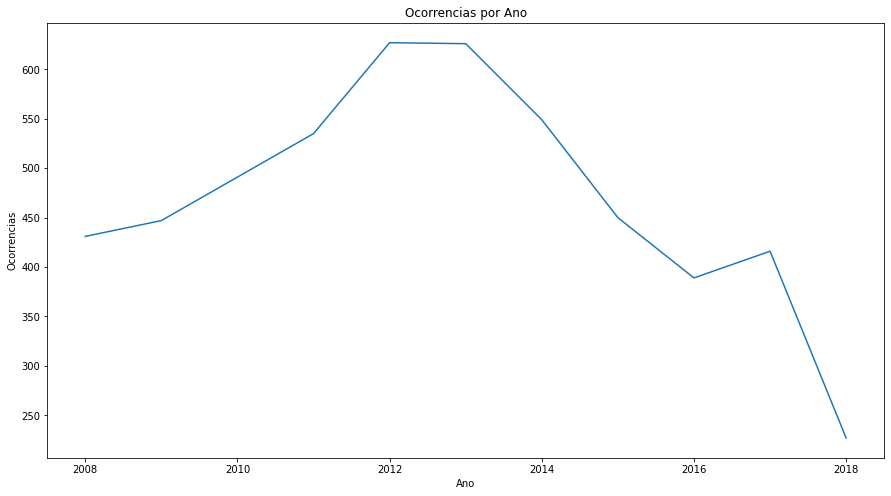

In [223]:
acidentes_ano = df[['codigo_ocorrencia', 'year']].groupby('year').count().reset_index().sort_values('year', ascending=True)

ax = sns.lineplot(data=acidentes_ano,
                x='year',
                y='codigo_ocorrencia'
)
ax.set(
    xlabel='Ano',
    ylabel='Ocorrencias',
    title='Ocorrencias por Ano'
)

##### Resposta

In [357]:
# Criando a coluna 'data_acidente'
df['data_acidente'] = 'pp'

# Percorrendo o DataFrame para decompor a data de cada linha
for index in range(len(df)):

    # Recupera todo o conteúdo e converte em texto. Seleciona somente
    # os 8 primeiro digitos
    year = str(df.loc[index, 'codigo_ocorrencia'])[:8]

    # Insere o primeiro hifen entre os caracteres
    # 20080425 => 2008-0425
    month = year[:4] + '-' + year[4:]

    # Insere o segundo hifen entre os caracteres
    # 20080425 => 2008-04-25
    date = month[:7] + '-' + month[7:]

    # Preenche a coluna 'data_acidente' com a nova data
    df.loc[index, 'data_acidente'] = date

# Altera o tipo de dado para Datetime
df['data_acidente'] = pd.to_datetime(df['data_acidente'])

# Demonstra a alteração de tipo
df.dtypes

codigo_ocorrencia                       int64
aeronave_matricula                     object
aeronave_operador_categoria            object
aeronave_tipo_veiculo                  object
aeronave_fabricante                    object
aeronave_modelo                        object
aeronave_tipo_icao                     object
aeronave_motor_tipo                    object
aeronave_motor_quantidade              object
aeronave_pmd                            int64
aeronave_pmd_categoria                 object
aeronave_assentos                     float64
aeronave_ano_fabricacao               float64
aeronave_pais_fabricante               object
aeronave_pais_registro                 object
aeronave_registro_categoria            object
aeronave_registro_segmento             object
aeronave_voo_origem                    object
aeronave_voo_destino                   object
aeronave_fase_operacao                 object
aeronave_fase_operacao_icao            object
aeronave_tipo_operacao            

In [358]:
# Demonstra as 5 primeiras linhas da coluna 'data_acidente'
df['data_acidente'].head()

0   2011-06-14
1   2008-04-25
2   2012-05-20
3   2010-12-01
4   2017-08-19
Name: data_acidente, dtype: datetime64[ns]

In [361]:
# Cria uma coluna para manter o valor do ano
# da data do acidente
df['year'] = df['data_acidente'].dt.year

# Exibe as 5 primeiras linhas das datas e anos
df[['data_acidente', 'year']].head()

,data_acidente,year
0,2011-06-14,2011
1,2008-04-25,2008
2,2012-05-20,2012
3,2010-12-01,2010
4,2017-08-19,2017


In [363]:
df_grouped = df[['codigo_ocorrencia', 'year']].groupby('year')

df_grouped = df_grouped.count().sort_values('year').reset_index()

df_grouped.head()

,year,codigo_ocorrencia
0,2008,431
1,2009,447
2,2010,491
3,2011,535
4,2012,627


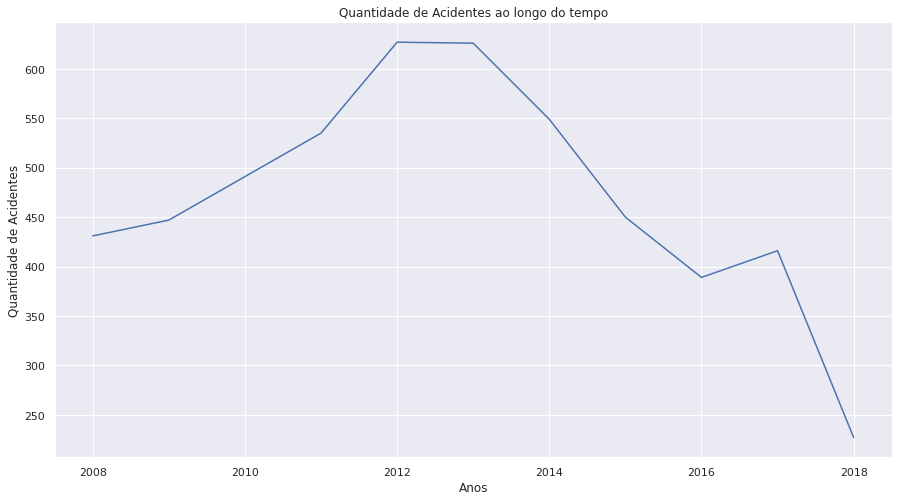

In [364]:
ax = sns.lineplot(
    data=df_grouped,
    x='year',
    y='codigo_ocorrencia'
)

ax.set(
    title='Quantidade de Acidentes ao longo do tempo',
    xlabel='Anos',
    ylabel='Quantidade de Acidentes',
);

#### 3.7. Utilize a coluna criada no exercício anterior, `data_acidente`, para criar um gráfico de linhas que demonstre os acientes ao longo do tempo para cada tipo de aoronave cadastrada na base de dados

##### Resolução

In [236]:
# acidentes x aeronave_tipo_veiculo 

tipo = df[['codigo_ocorrencia', 'year', 'aeronave_tipo_veiculo']].groupby(['aeronave_tipo_veiculo','year']).count().reset_index()
tipo

,aeronave_tipo_veiculo,year,codigo_ocorrencia
0,ANFÍBIO,2009,1
1,ANFÍBIO,2010,2
2,ANFÍBIO,2011,1
3,ANFÍBIO,2013,1
4,ANFÍBIO,2014,2
5,ANFÍBIO,2015,2
6,ANFÍBIO,2016,1
7,ANFÍBIO,2017,1
8,ANFÍBIO,2018,1
9,AVIÃO,2008,380


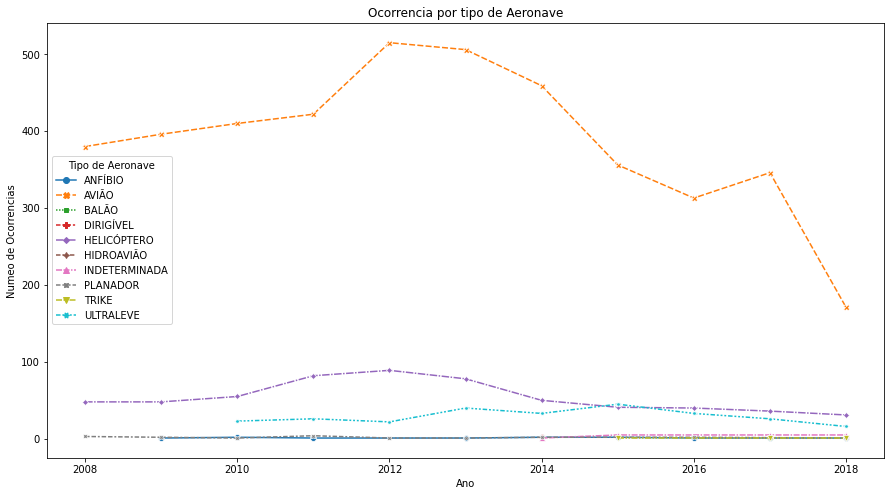

In [242]:
ax = sns.lineplot( data=tipo,
                    x='year',
                    y='codigo_ocorrencia',
                    hue='aeronave_tipo_veiculo',
                    markers=True,
                    style='aeronave_tipo_veiculo'
                    )
ax.set(title= 'Ocorrencia por tipo de Aeronave',
        xlabel= 'Ano',
        ylabel= 'Numeo de Ocorrencias'
)
plt.legend(title='Tipo de Aeronave')

##### Resposta

In [365]:
df_grouped = df[['codigo_ocorrencia', 'year', 'aeronave_tipo_veiculo']].groupby(['year', 'aeronave_tipo_veiculo'])

df_grouped = df_grouped.count().sort_values(['year', 'aeronave_tipo_veiculo']).reset_index()

df_grouped.head()

,year,aeronave_tipo_veiculo,codigo_ocorrencia
0,2008,AVIÃO,380
1,2008,HELICÓPTERO,48
2,2008,PLANADOR,3
3,2009,ANFÍBIO,1
4,2009,AVIÃO,396


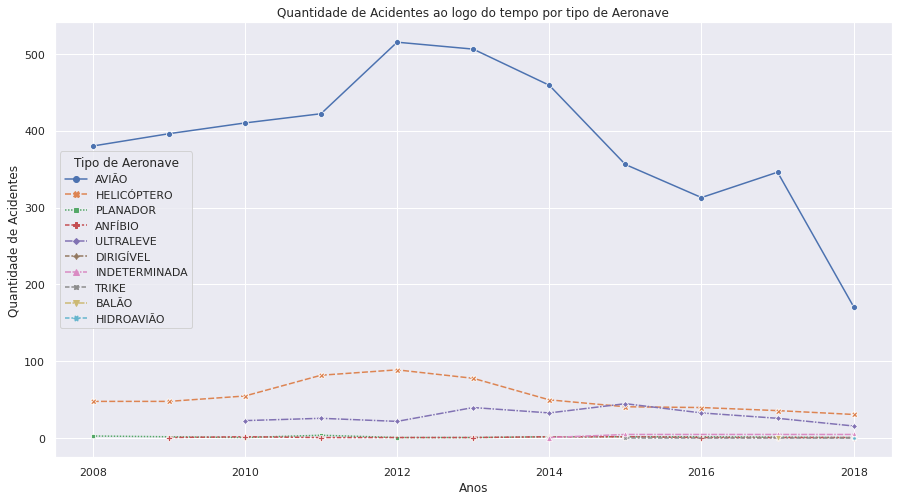

In [372]:
ax = sns.lineplot(
    data=df_grouped,
    x='year',
    y='codigo_ocorrencia',
    hue='aeronave_tipo_veiculo',
    markers=True,
    style='aeronave_tipo_veiculo'
)

ax.set(
    title='Quantidade de Acidentes ao logo do tempo por tipo de Aeronave',
    xlabel='Anos',
    ylabel='Quantidade de Acidentes',
);

# Muda o texto da Legenda e sua localização
plt.legend(title='Tipo de Aeronave', loc='center left');